# This notebook shows pre-processing part of OCR recognition

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
import argparse
from PIL import Image
from PIL import ImageFilter
from pylab import *
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.transform import resize
import cPickle
from skimage.morphology import closing, square
from skimage.measure import regionprops
from skimage import restoration
from skimage import measure
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

DENOISING IMAGE

http://docs.opencv.org/3.0-beta/modules/photo/doc/denoising.html

In [2]:
#Funkcija kao ulaz uzima grayscale sliku a kao izlaz daje grayscale slike
def denoise(image):
    #Parametri funkcije su ulazna slike, h=3 - regulira snagu filtra, velicina prozora,
    # te velicina search prozora - Size in pixels of the window that is used to compute weighted average for given pixel. 
    #Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. 
    #Recommended value 21 pixels
    output=cv2.fastNlMeansDenoising(image,3,7,21)
    return output

BINARISATION

In [15]:
def binarize(img):
    # convert the image to grayscale and flip the foreground
    # and background to ensure foreground is now "white" and
    # the background is "black"
    if len(img.shape)>2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(img)
    #http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
    ##KORISTI SE LOKALNO IZJEDNACANJE HISTOGRAMA
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    # threshold the image, setting all foreground pixels to
    # 255 and all background pixels to 0
    thresh = cv2.threshold(cl1, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #thresh = cv2.bitwise_not(thresh)
    return cl1,thresh

In [4]:
def getTextCandidates(image):
    #binarize image
    gray, thresh = binarize(denoise(img))
    #get contours od the binary image
    _,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_L1)
    #sort contours by size - largest to smallest
    contours = sorted(contours, key=cv2.contourArea,reverse=True)
    #Calculate bounding boxes for contours
    bounding_boxes = []
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        bounding_boxes.append([x, y, w, h])
    #Return bounding boxes as a list of candidates
    return bounding_boxes

In [5]:
def getTextCandidatesMSER(image):
    mser = cv2.MSER_create()
    regions = mser.detectRegions(image, None)
    #Calculate bounding boxes for contours
    bounding_boxes = []
    for r in regions:
        (x, y, w, h) = cv2.boundingRect(r)
        bounding_boxes.append([x, y, w, h])
    #Return bounding boxes as a list of candidates
    return bounding_boxes

In [23]:
def extractTextCandidates(bounding_boxes,image):
    #_,binImage = binarize(image)
    #plt.figure()
    #plt.imshow(binImage)
    #plt.show()
    candidates = []
    #Kandidati za klasifikaciju
    for k,b in enumerate(bounding_boxes):
        (x, y, w, h) = b
        temp = cv2.resize(image[y:y+h,x:x+w], (32, 32))
        #temp = binImage[y:y+h,x:x+w]
        if k<20:
            plt.figure()
            plt.imshow(temp)
            plt.show()

        candidates.append(temp)
        #candidates.append(np.resize(, (32,32)))
        #candidates.append(img[x:x+w,y:y+h])
    return candidates

In [7]:
def paintPicture(bounding_boxes,image):
    imgcont4 = image.copy()
    for c in bounding_boxes:
        (x, y, w, h) = c
        cv2.rectangle(imgcont4,(x,y),(x+w,y+h),(255,0,0),2)
    plt.imshow(imgcont4)
    plt.show()

UCITAVANJE SLIKE - ODAVDE POCINJE PROCES

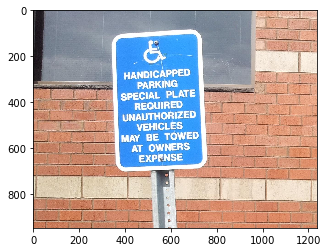

In [8]:
#img = cv2.imread('./imposed.png')
#img = cv2.imread('./sceneembeddedtext.png')
#img = cv2.imread('./image.png')
img = cv2.imread('./sign.png')
#img = cv2.resize(img, (0,0), fx=3, fy=3) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

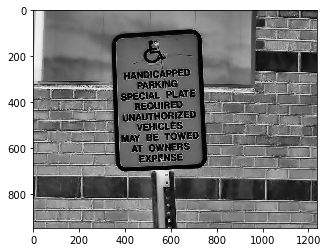

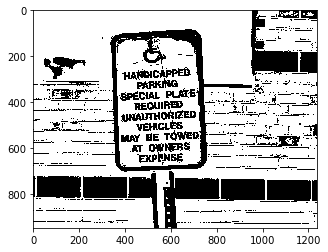

In [16]:
gray, thresh = binarize(denoise(img))
plt.imshow(gray,'gray')
plt.show()
plt.imshow(thresh,'gray')
plt.show()

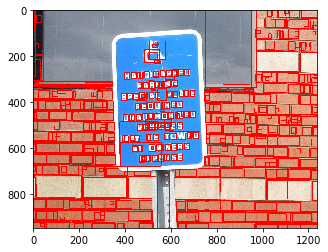

In [10]:
imgcont4 = img.copy()
reg = getTextCandidatesMSER(img)
paintPicture(reg,img)

Addidional preprocessing

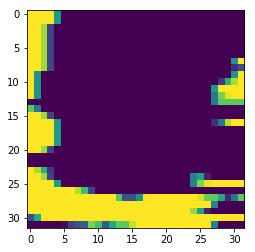

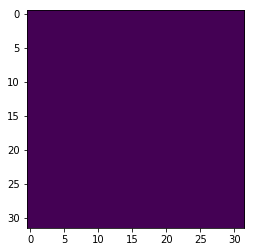

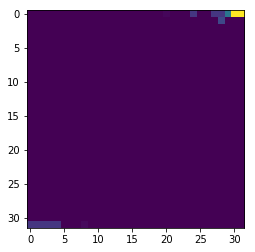

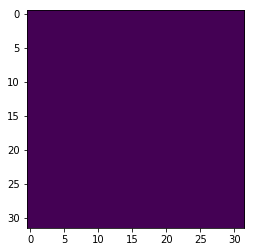

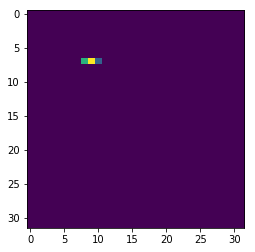

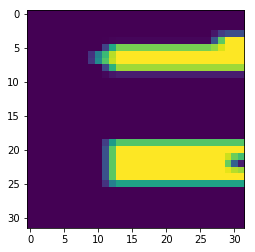

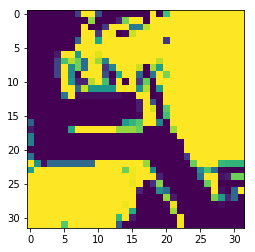

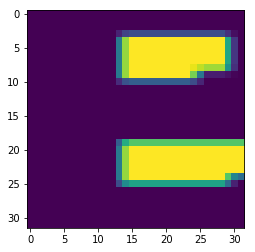

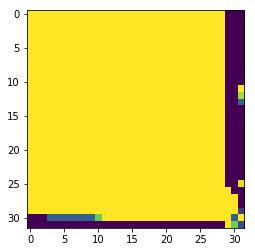

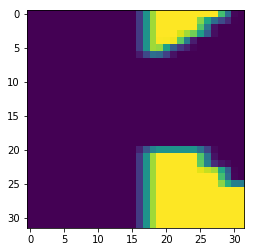

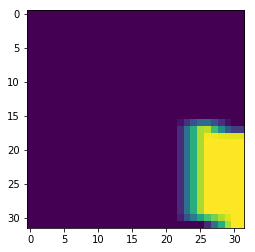

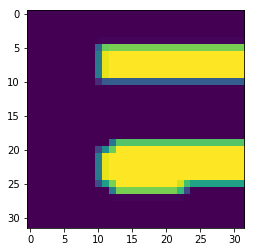

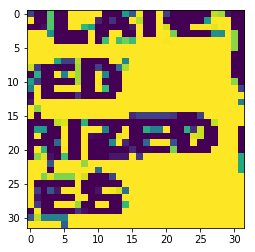

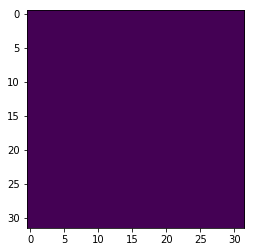

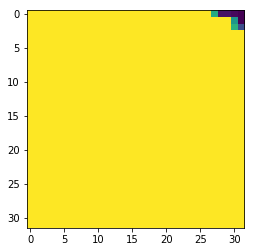

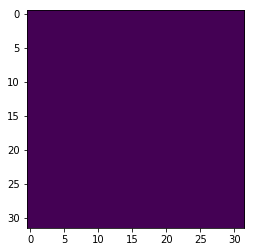

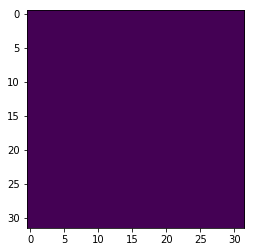

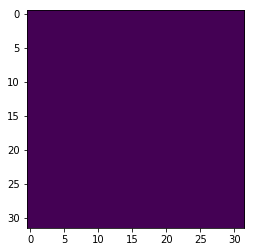

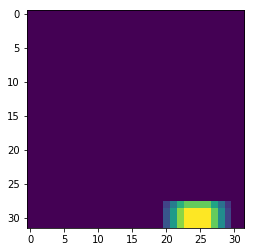

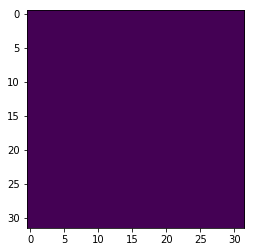

931


In [24]:
candidates = extractTextCandidates(reg,thresh)
print len(candidates)

In [22]:
print candidates[8].shape

(337L, 223L)


# FIRST CLASSIFIER PROCESSING - TEXT OR NO TEXT

In [20]:
RFC = joblib.load('RFC.pkl')

In [46]:
text = []
posText = []
for bbox,candidate in zip(reg,candidates):
    #plt.figure()
    #plt.imshow(candidate,'gray')
    #plt.show()
    inputvector = candidate.reshape((1,(len(candidate)*len(candidate[0]))))
    #print inputvector
    #print i
    #if i>3:
    #    break
    if not((sum(sum(candidate)))<0.05*1024*255 or (sum(sum(candidate)))>0.95*1024*255):
        if(RFC.predict(inputvector)==1):
            text.append(candidate)
            posText.append(bbox)

In [47]:
print len(text)

328


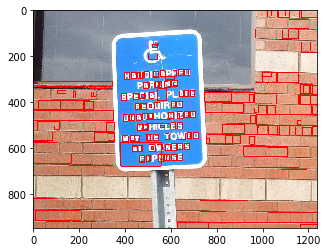

In [48]:
paintPicture(posText,img)

0


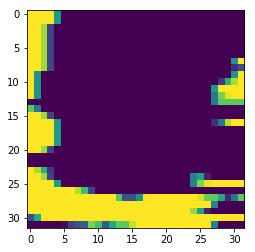

1


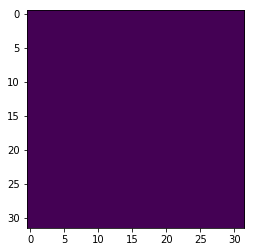

2


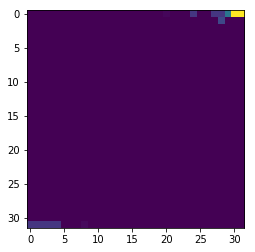

3


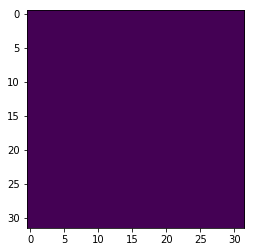

4


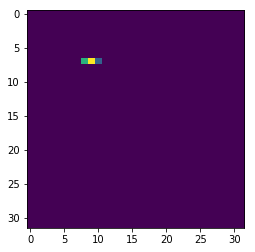

5


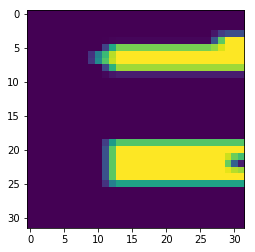

6


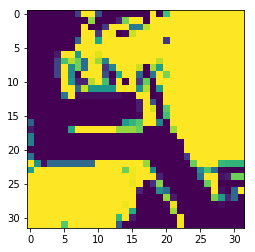

7


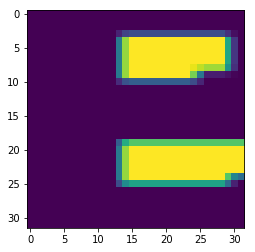

8


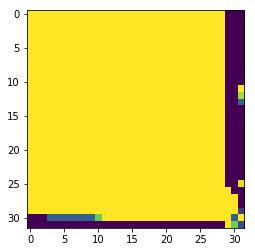

9


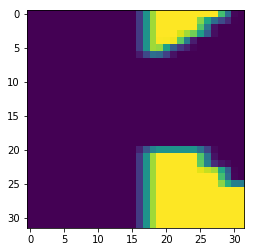

10


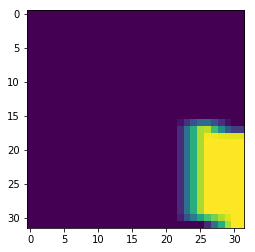

11


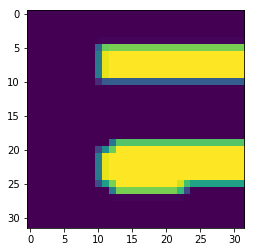

12


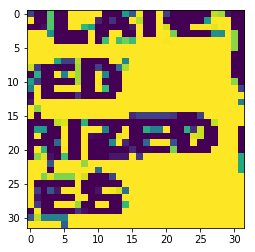

13


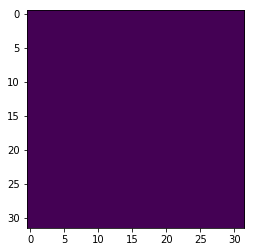

14


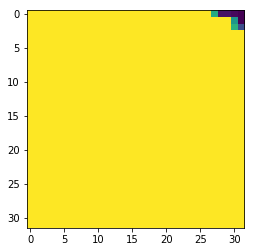

15


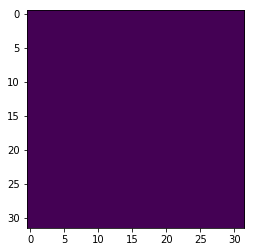

16


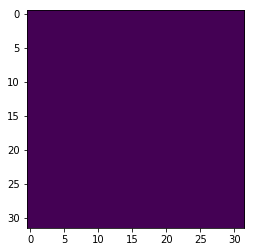

17


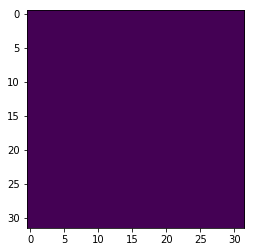

18


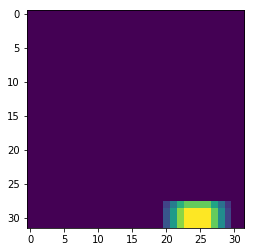

19


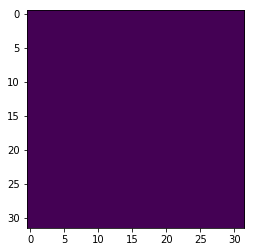

20


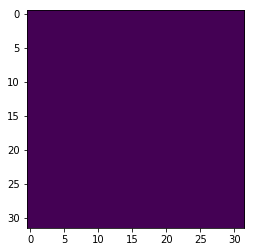

21


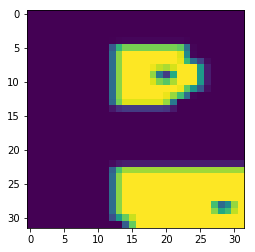

22


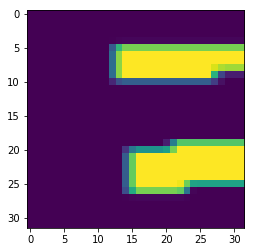

23


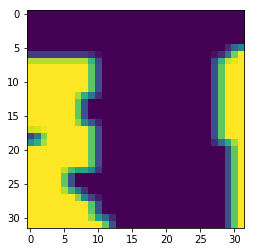

24


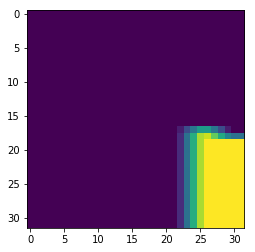

25


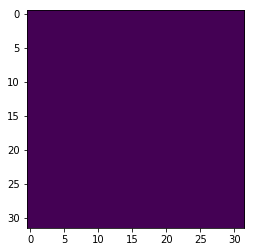

26


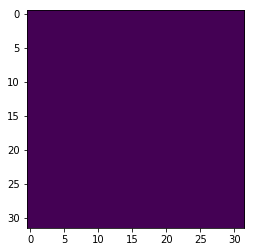

27


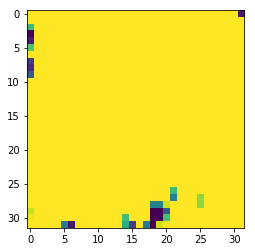

28


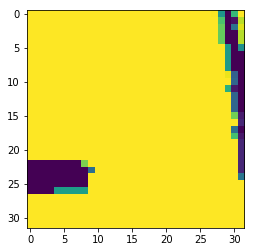

29


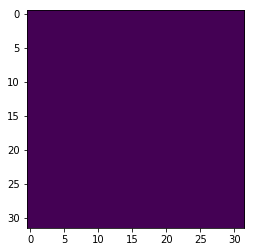

30


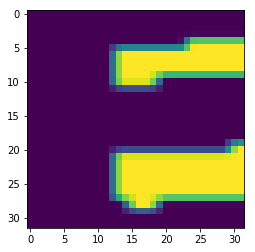

31


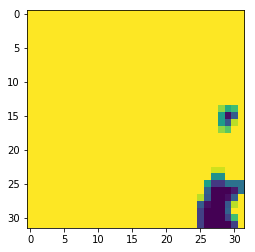

32


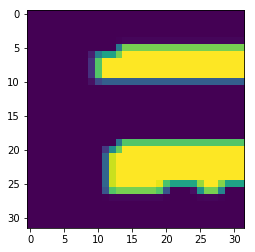

33


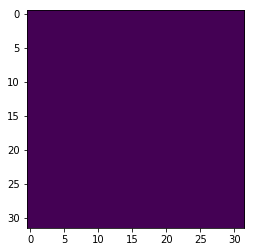

34


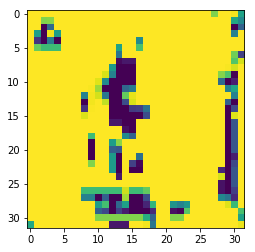

35


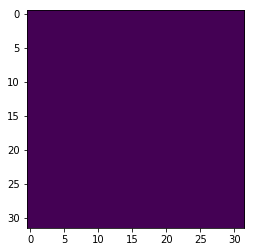

36


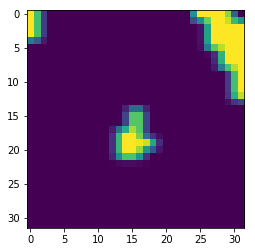

37


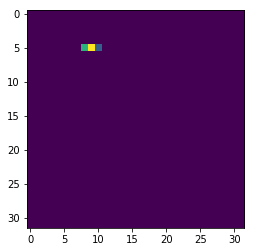

38


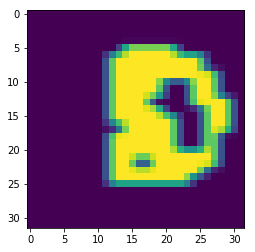

39


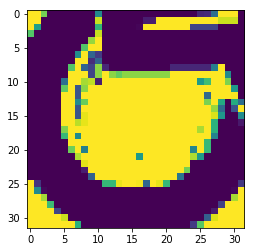

40


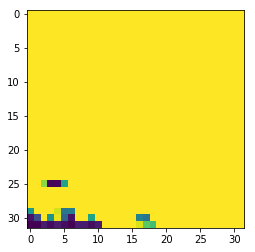

41


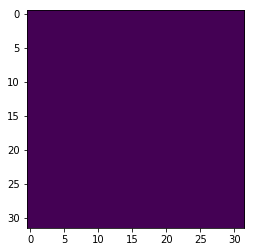

42


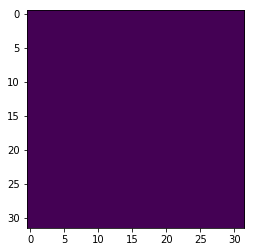

43


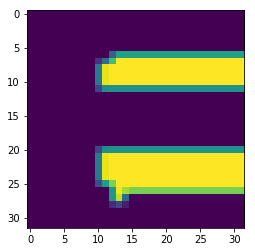

44


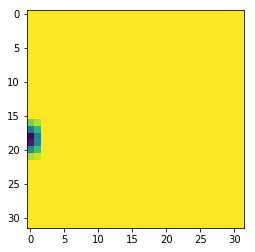

45


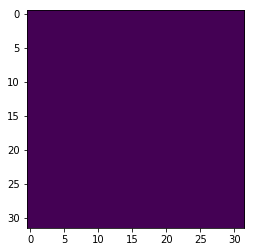

46


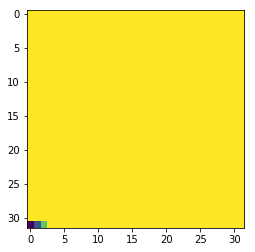

47


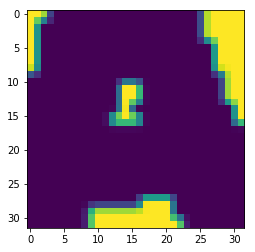

48


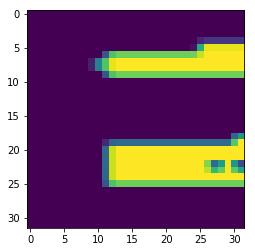

49


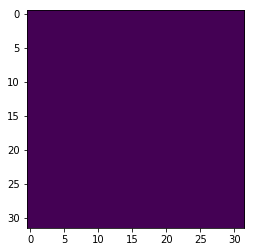

50


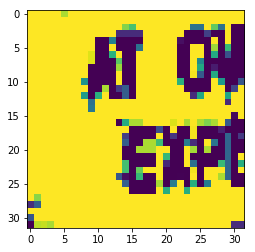

51


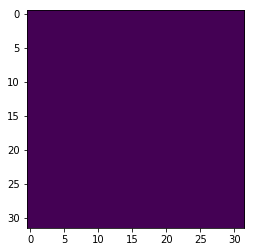

52


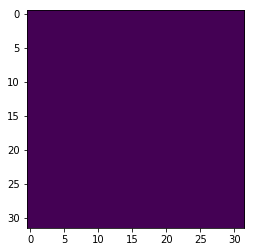

53


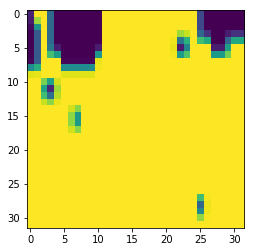

54


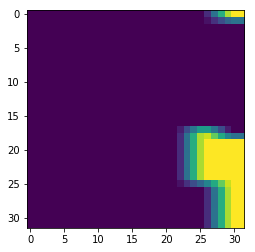

55


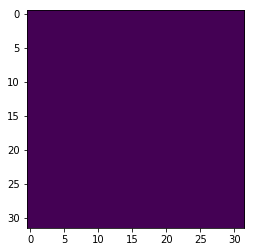

56


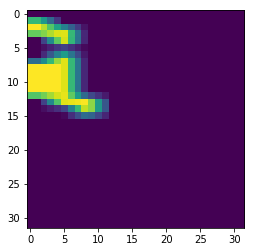

57


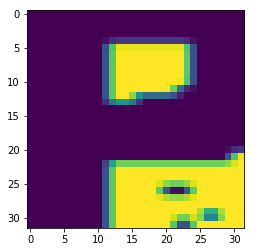

58


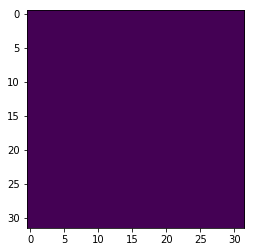

59


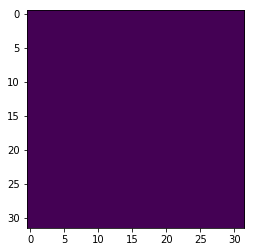

60


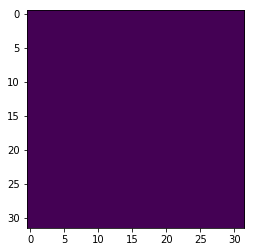

61


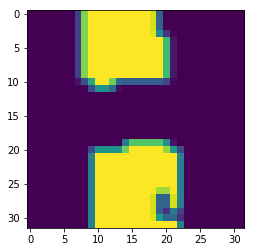

62


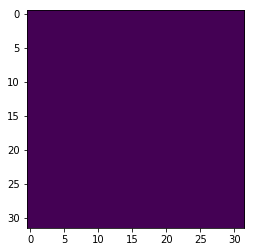

63


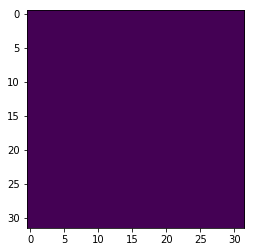

64


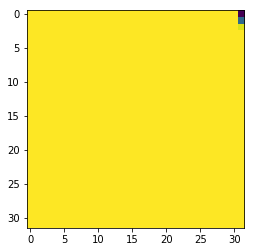

65


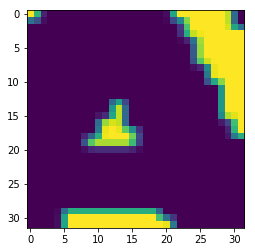

66


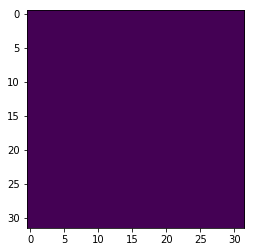

67


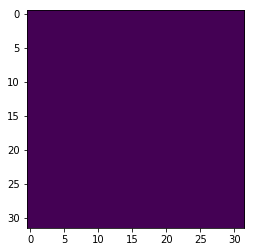

68


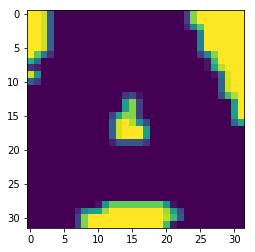

69


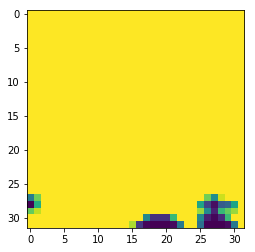

70


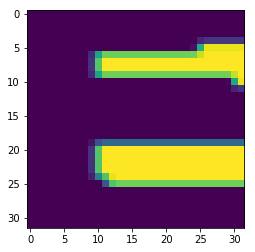

71


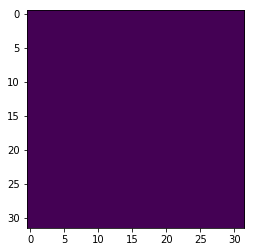

72


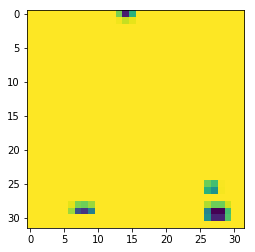

73


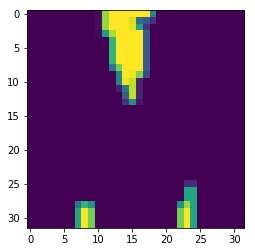

74


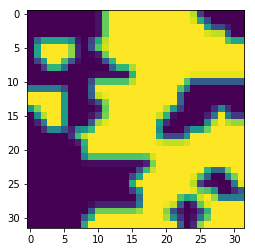

75


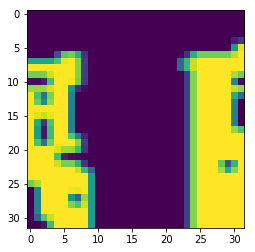

76


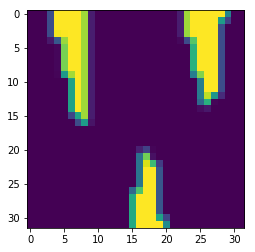

77


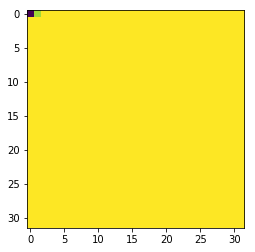

78


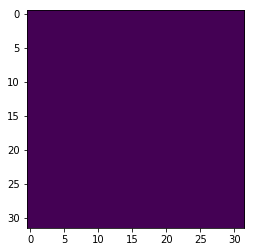

79


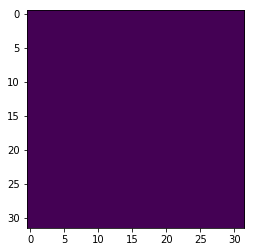

80


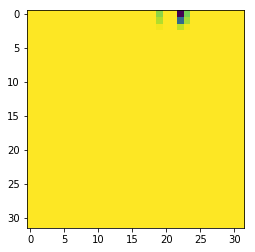

81


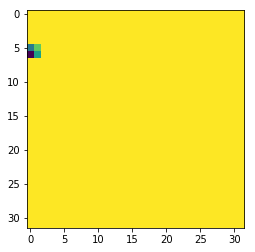

82


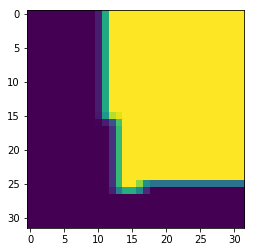

83


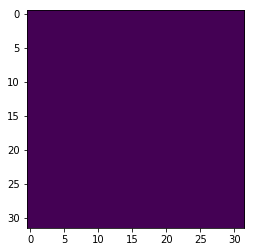

84


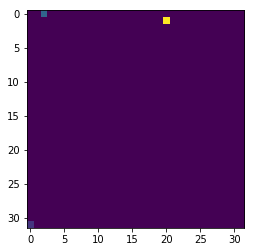

85


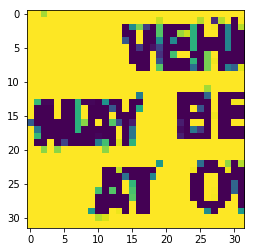

86


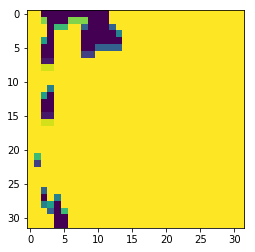

87


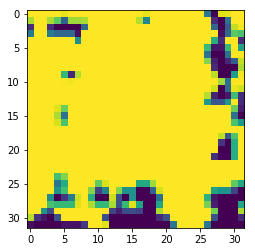

88


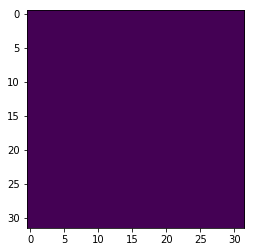

89


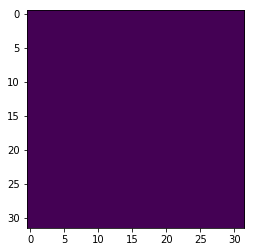

90


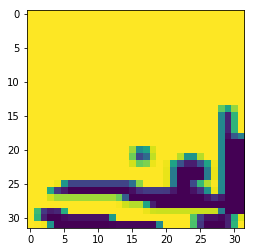

91


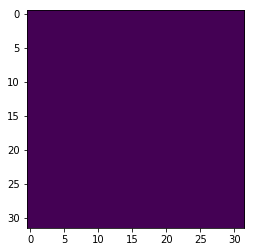

92


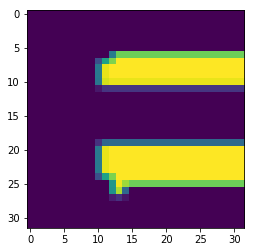

93


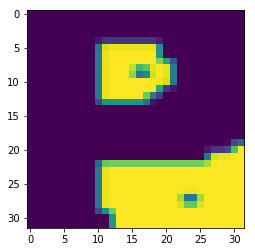

94


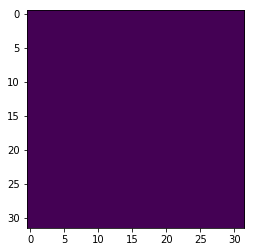

95


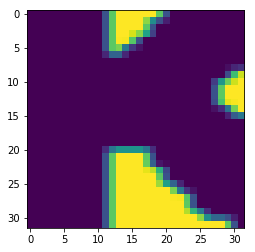

96


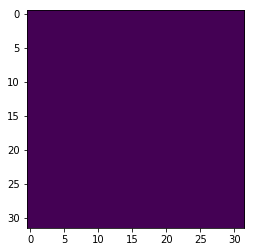

97


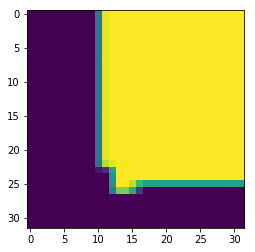

98


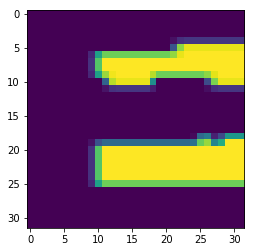

99


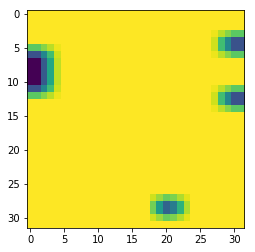

100


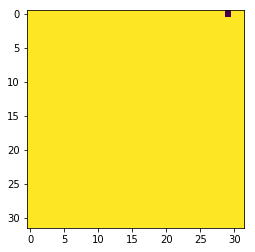

101


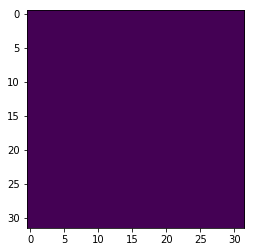

102


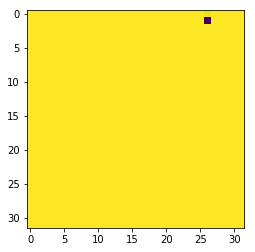

103


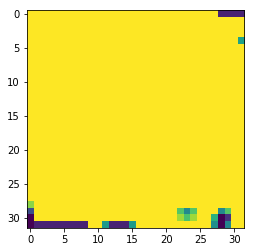

104


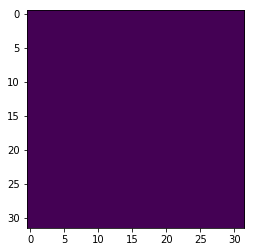

105


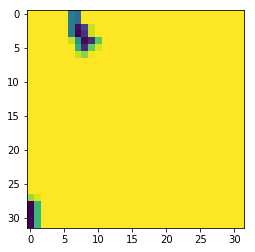

106


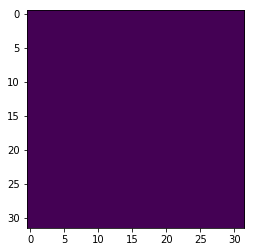

107


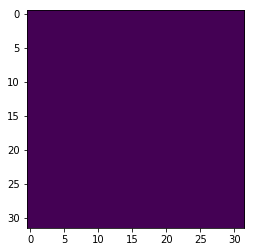

108


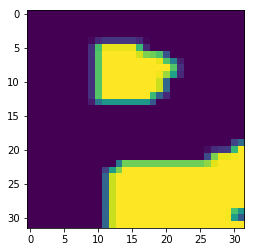

109


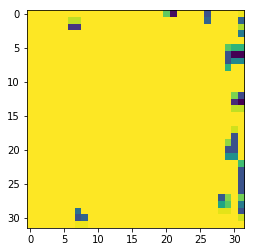

110


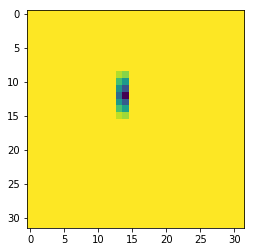

111


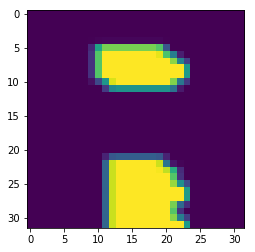

112


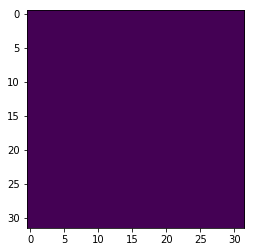

113


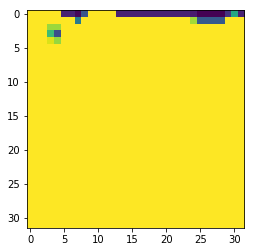

114


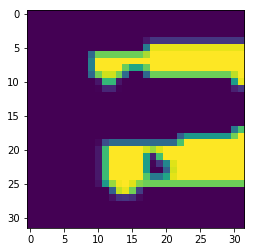

115


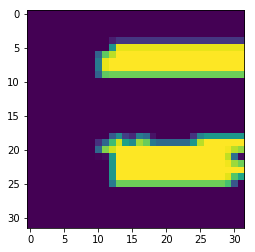

116


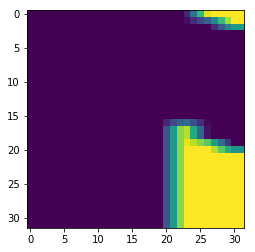

117


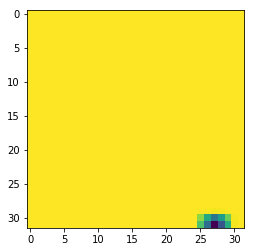

118


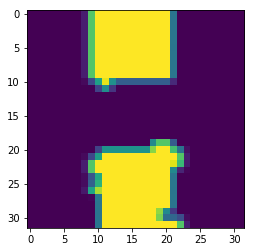

119


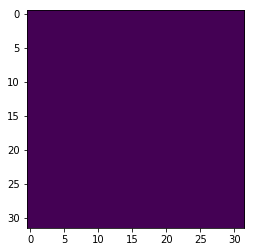

120


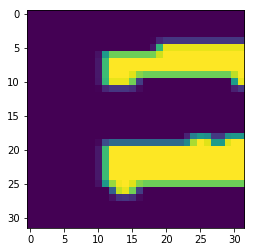

121


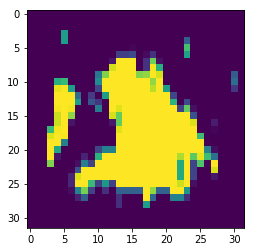

122


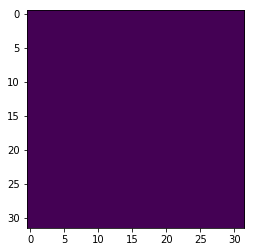

123


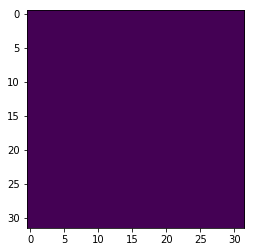

124


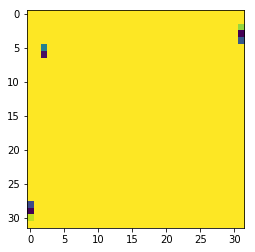

125


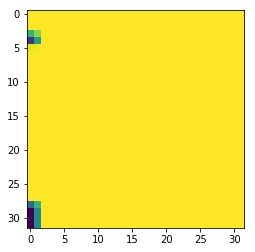

126


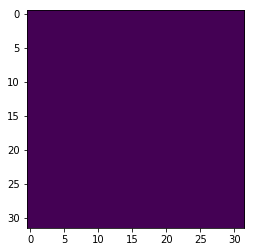

127


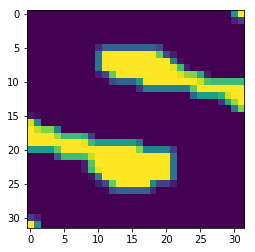

128


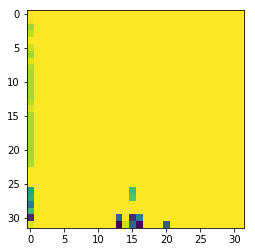

129


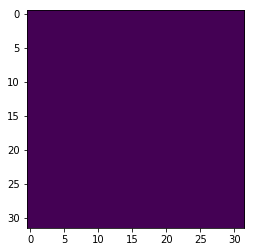

130


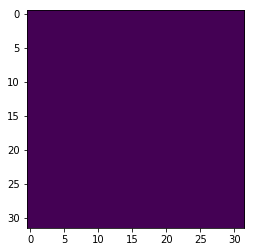

131


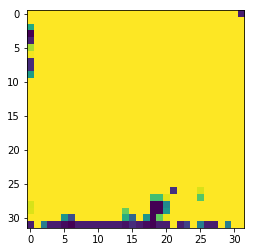

132


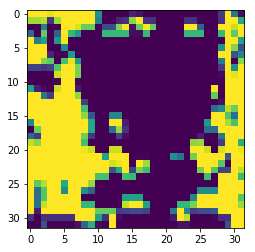

133


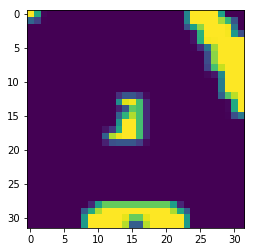

134


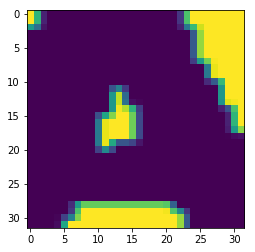

135


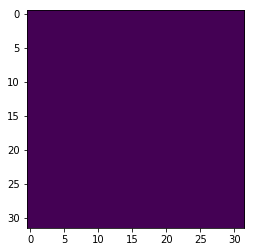

136


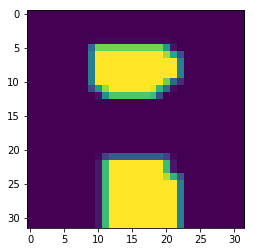

137


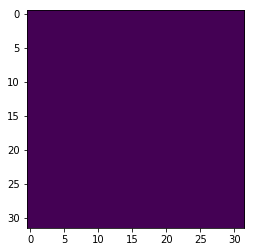

138


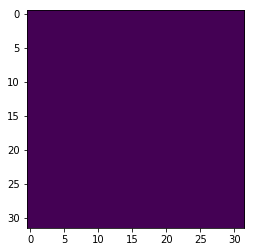

139


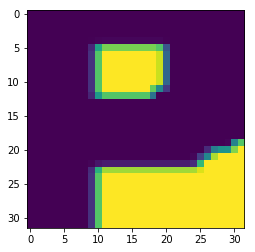

140


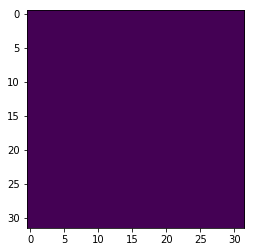

141


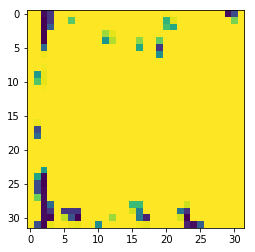

142


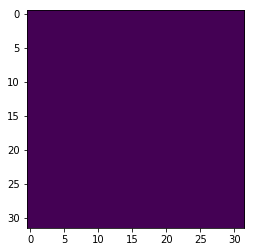

143


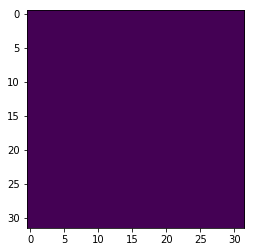

144


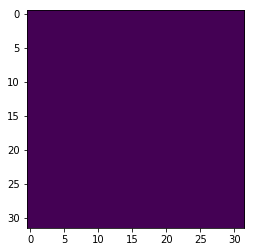

145


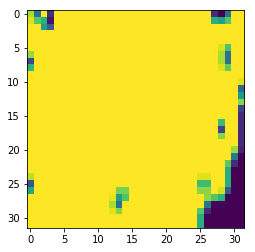

146


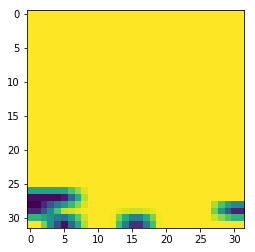

147


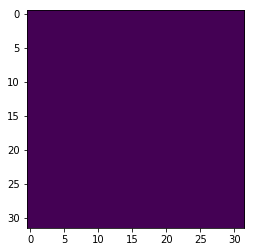

148


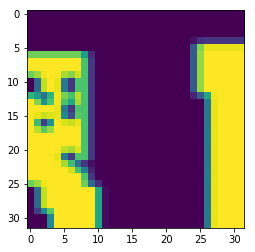

149


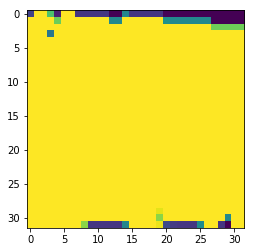

150


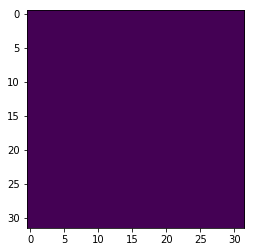

151


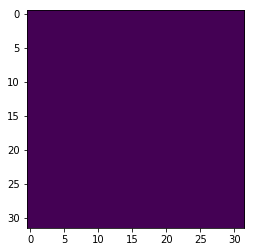

152


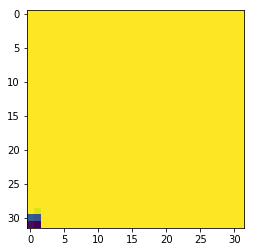

153


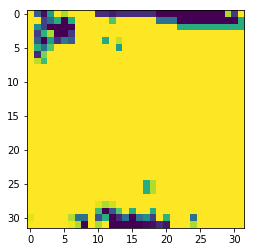

154


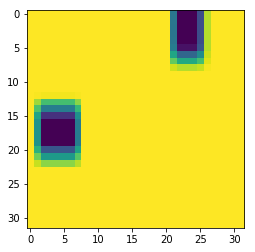

155


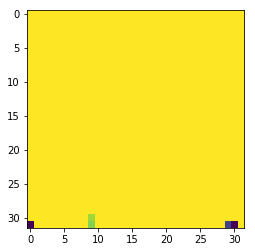

156


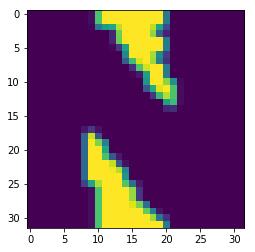

157


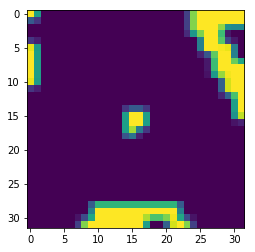

158


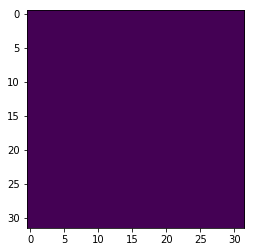

159


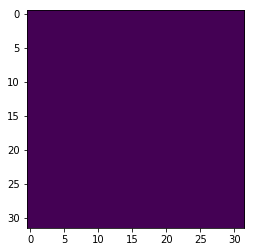

160


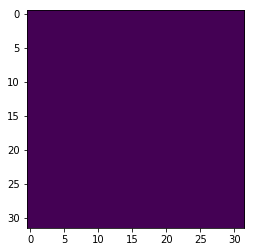

161


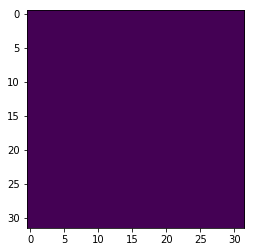

162


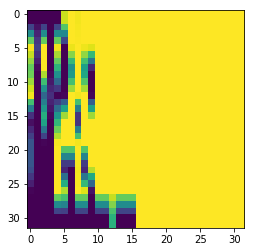

163


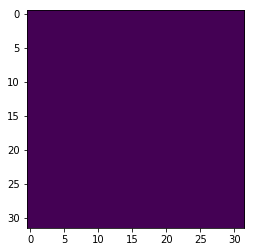

164


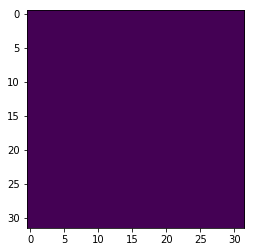

165


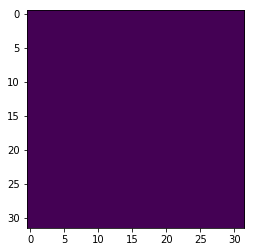

166


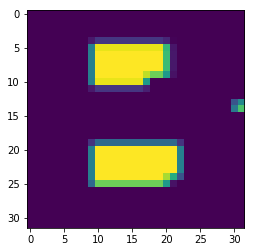

167


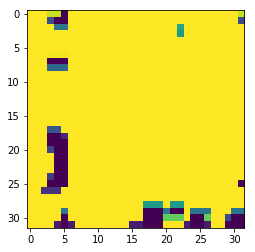

168


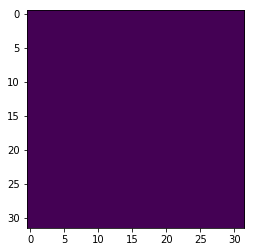

169


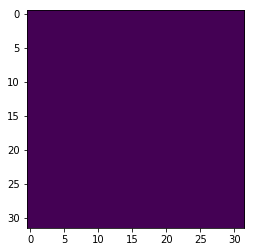

170


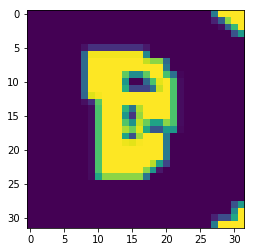

171


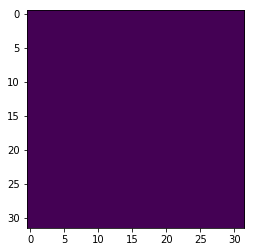

172


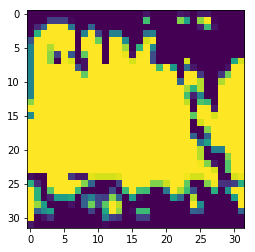

173


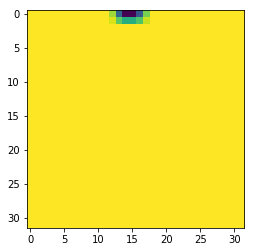

174


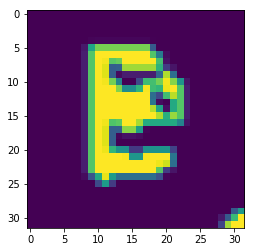

175


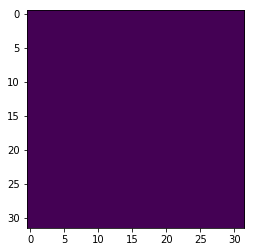

176


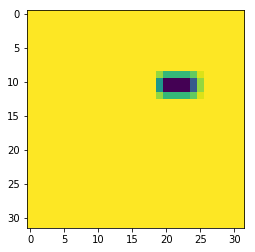

177


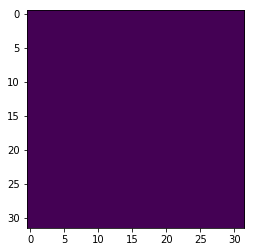

178


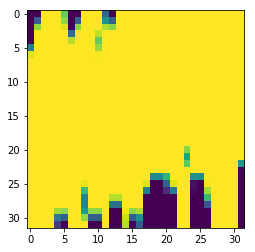

179


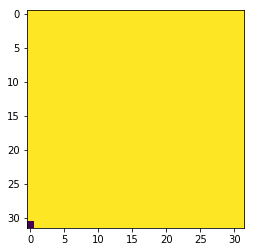

180


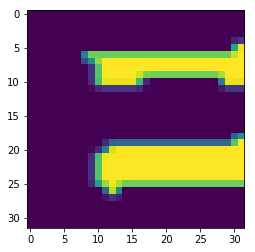

181


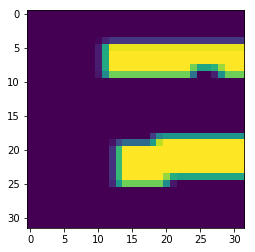

182


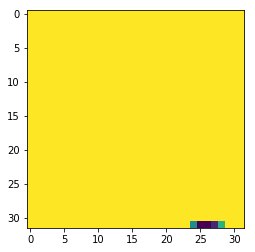

183


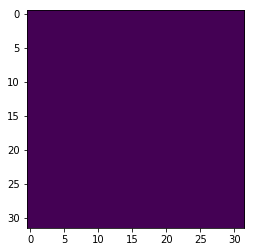

184


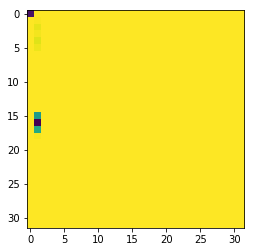

185


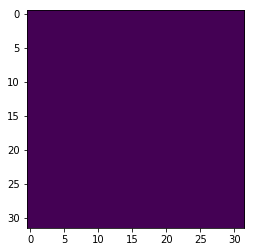

186


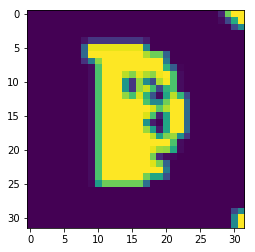

187


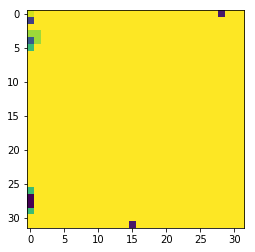

188


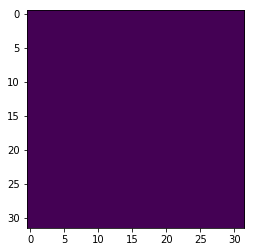

189


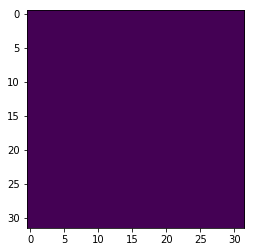

190


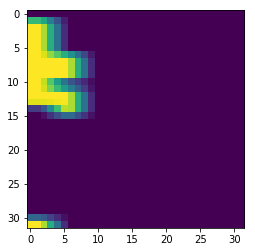

191


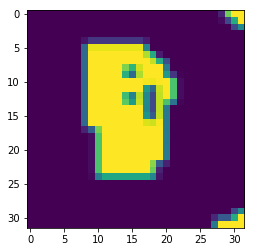

192


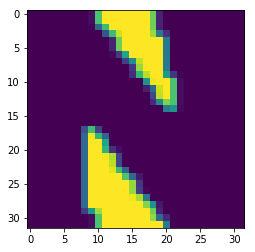

193


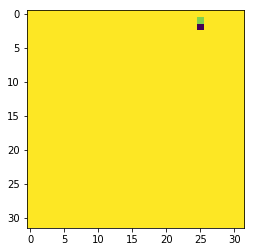

194


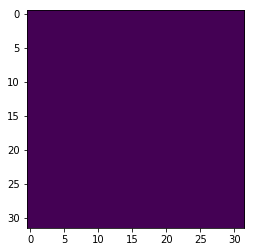

195


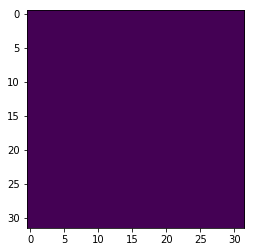

196


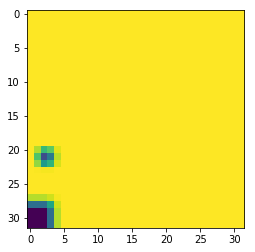

197


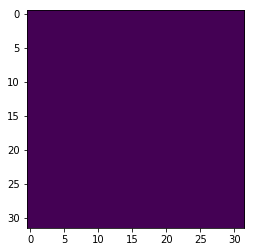

198


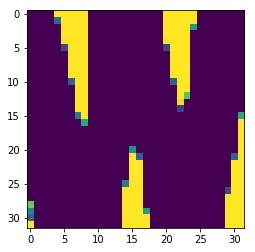

199


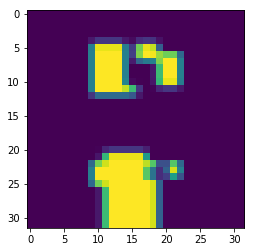

200


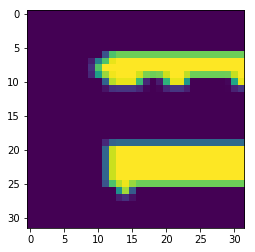

201


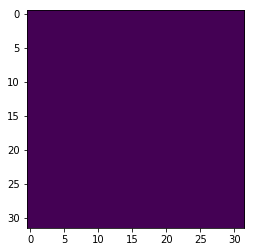

202


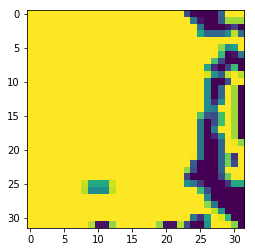

203


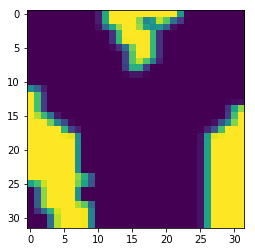

204


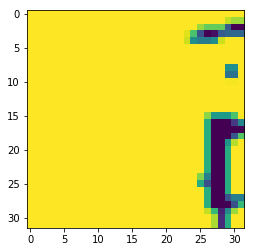

205


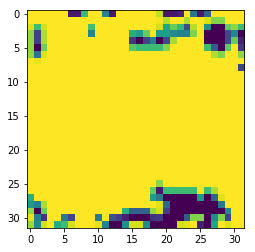

206


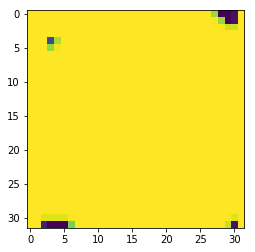

207


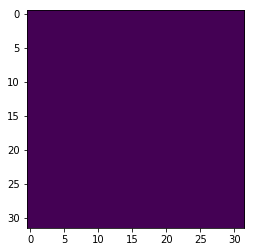

208


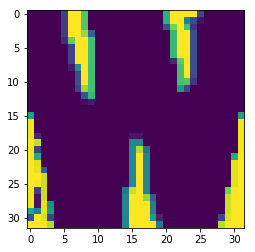

209


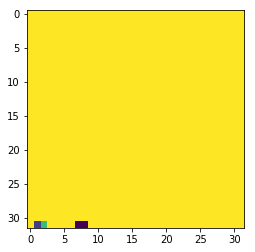

210


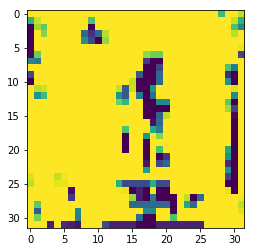

211


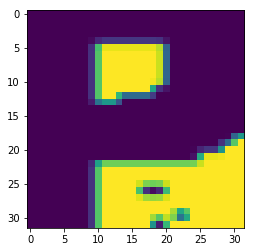

212


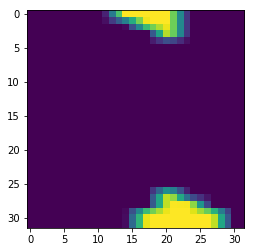

213


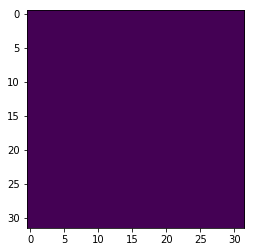

214


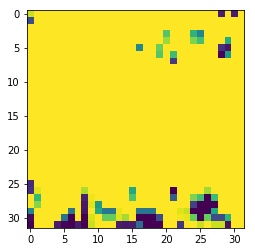

215


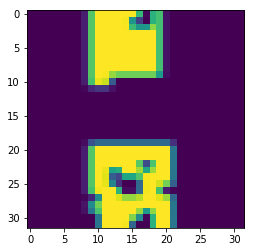

216


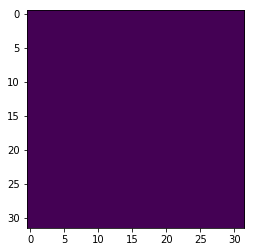

217


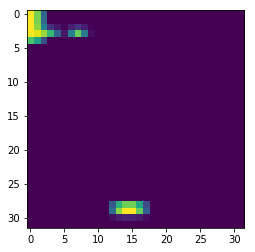

218


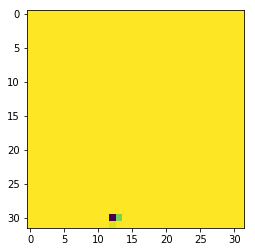

219


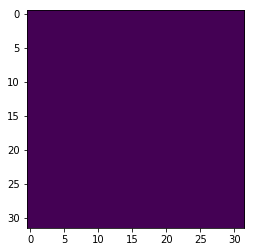

220


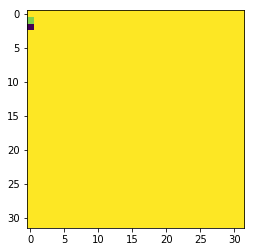

221


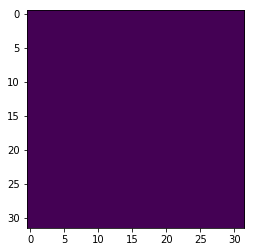

222


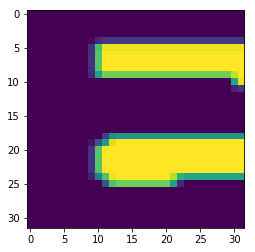

223


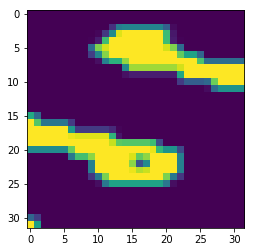

224


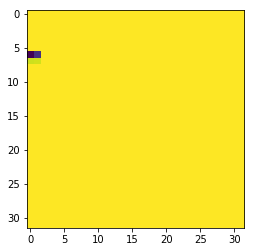

225


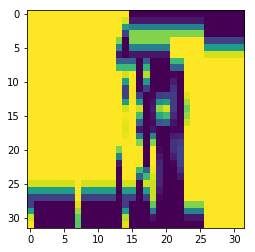

226


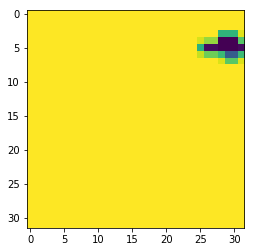

227


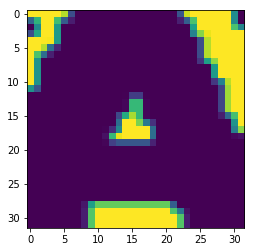

228


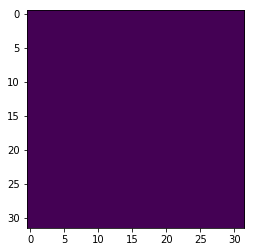

229


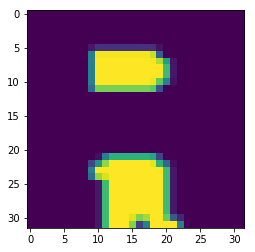

230


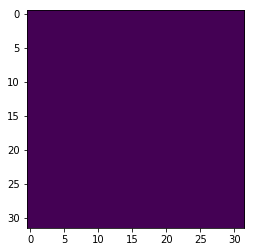

231


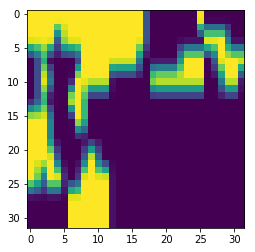

232


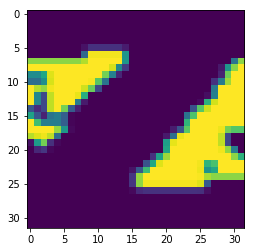

233


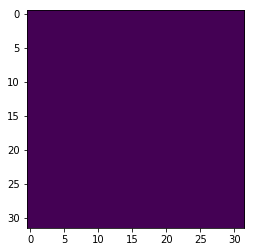

234


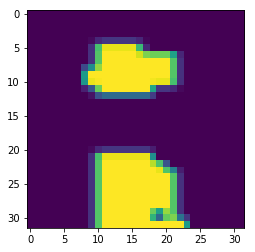

235


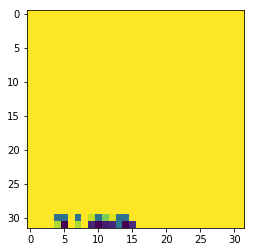

236


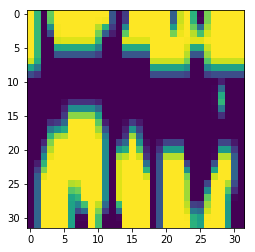

237


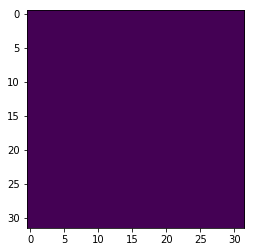

238


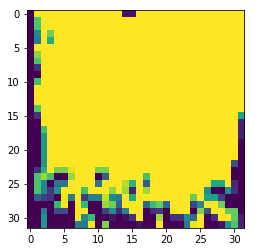

239


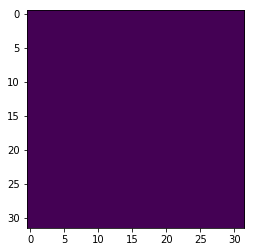

240


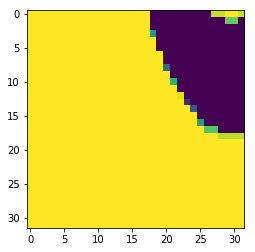

241


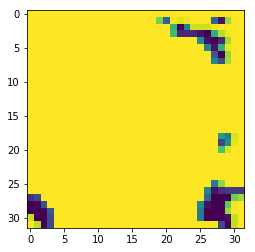

242


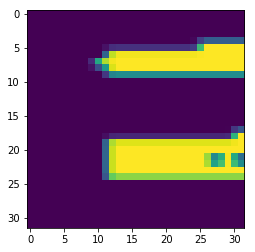

243


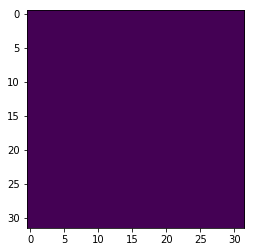

244


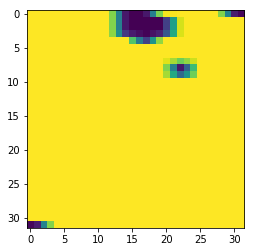

245


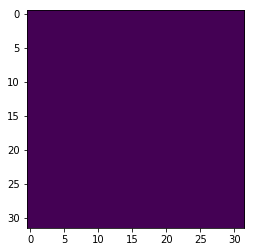

246


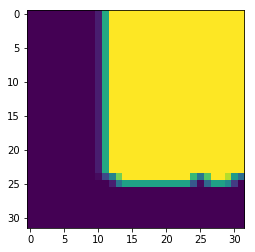

247


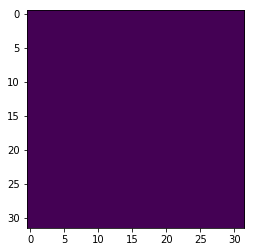

248


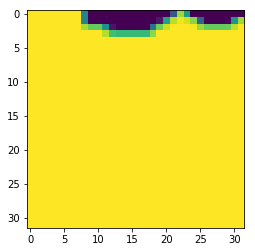

249


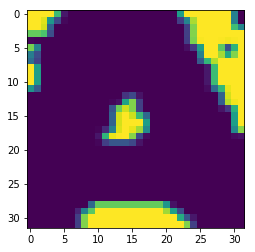

250


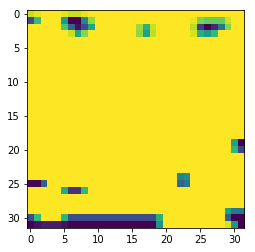

251


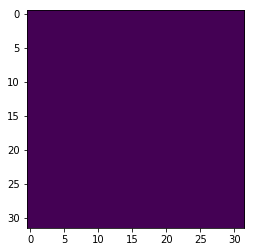

252


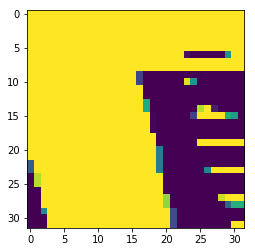

253


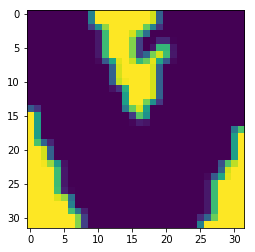

254


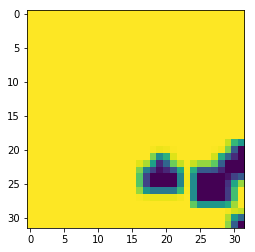

255


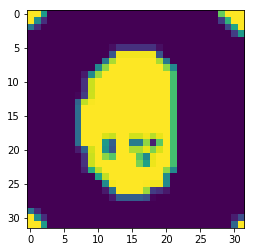

256


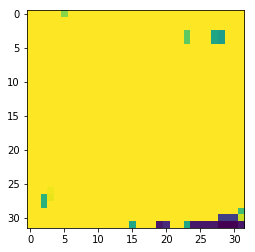

257


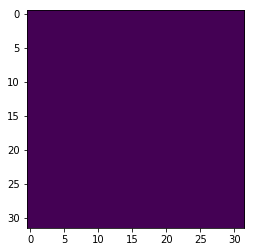

258


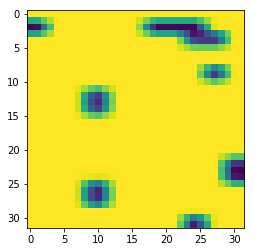

259


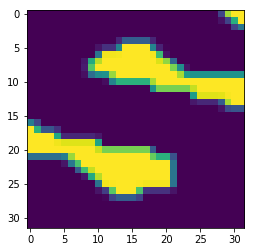

260


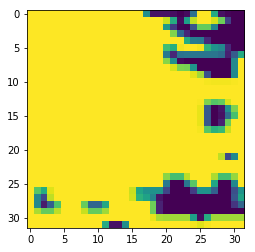

261


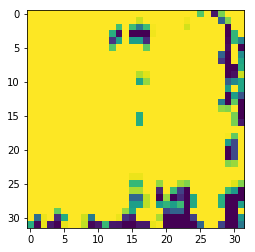

262


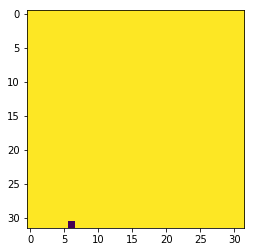

263


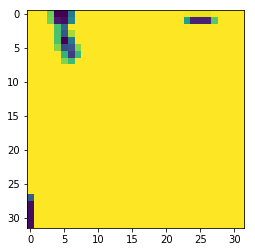

264


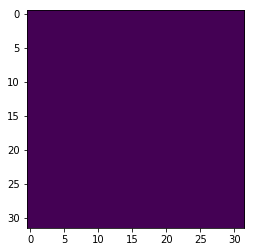

265


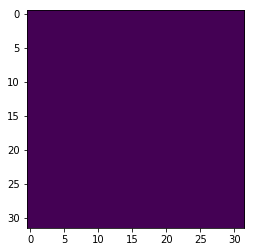

266


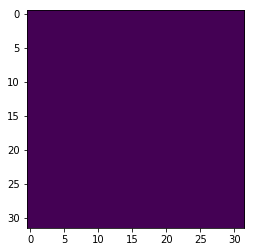

267


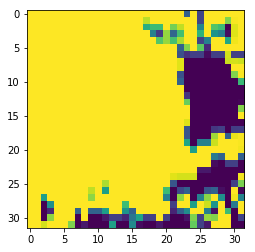

268


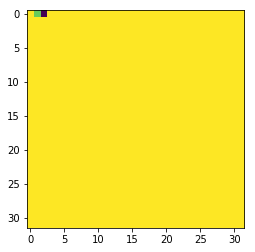

269


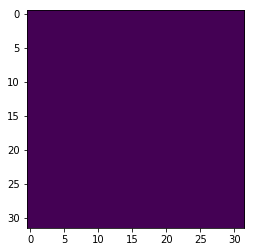

270


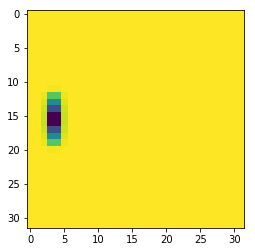

271


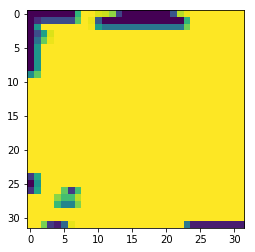

272


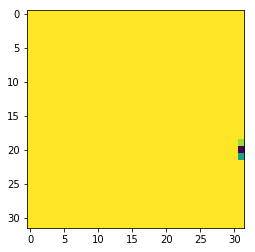

273


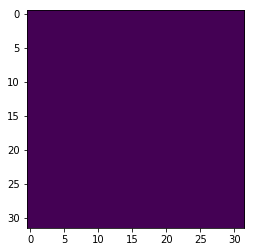

274


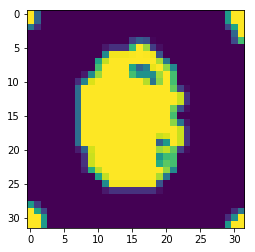

275


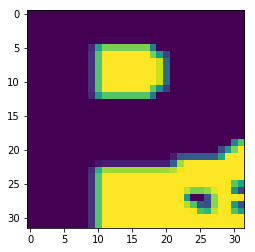

276


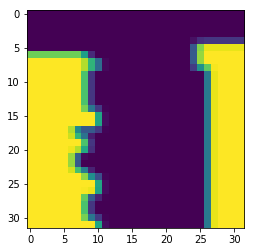

277


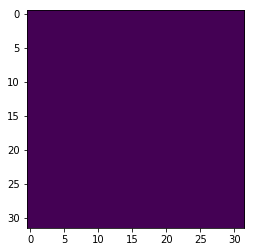

278


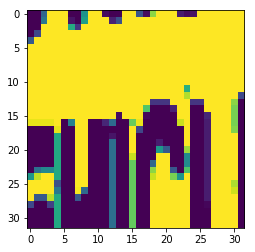

279


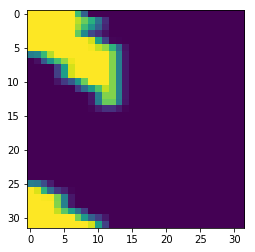

280


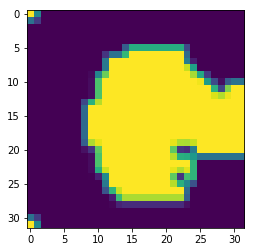

281


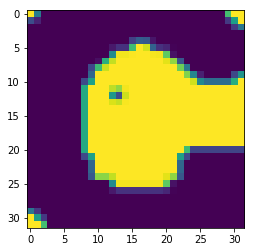

282


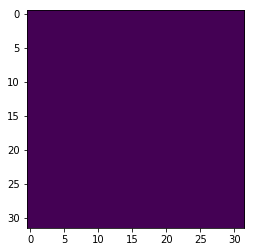

283


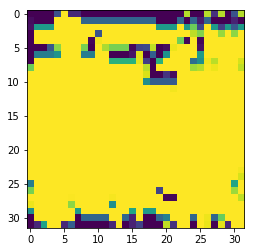

284


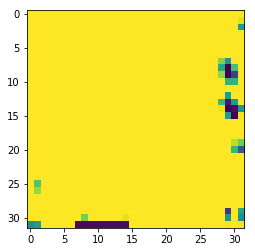

285


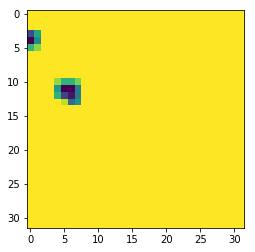

286


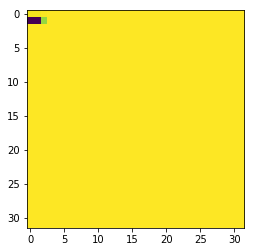

287


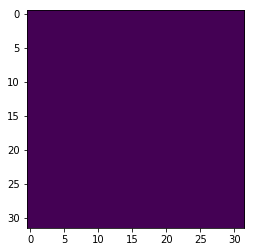

288


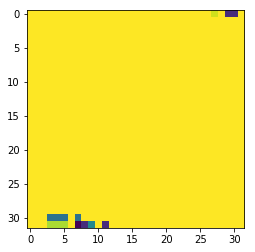

289


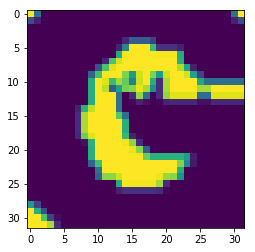

290


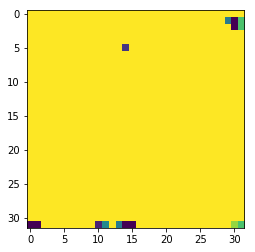

291


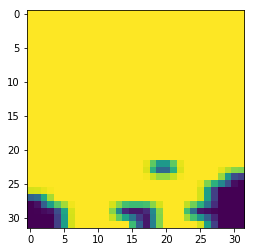

292


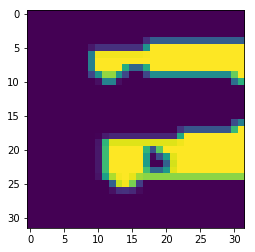

293


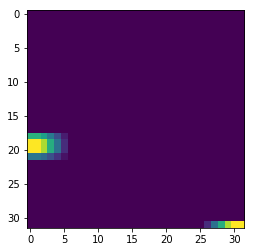

294


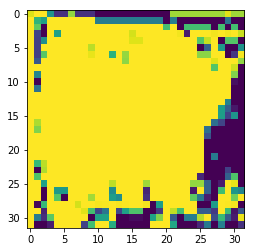

295


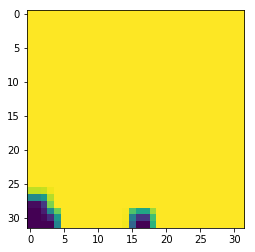

296


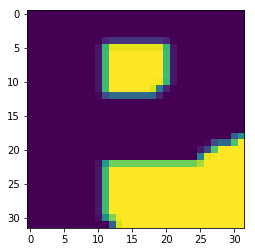

297


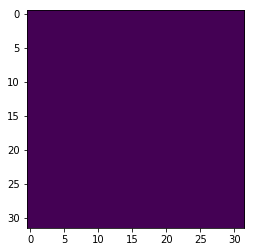

298


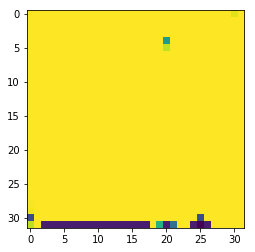

299


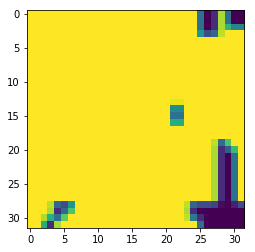

300


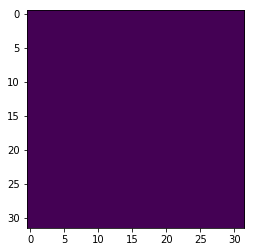

301


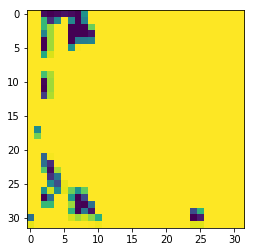

302


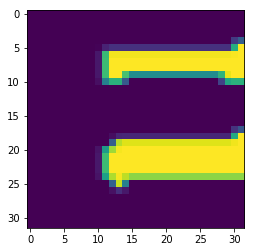

303


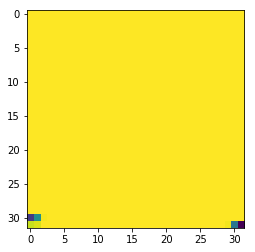

304


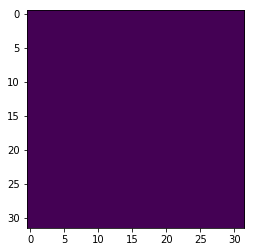

305


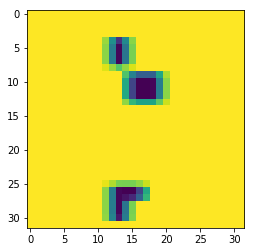

306


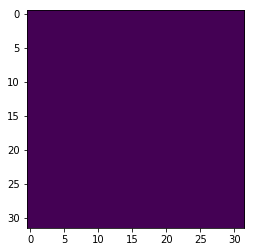

307


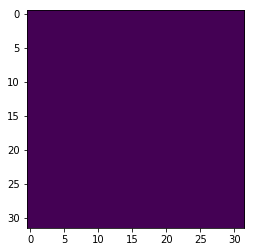

308


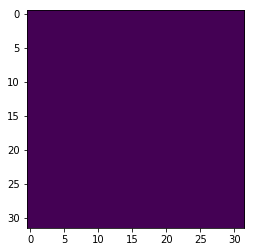

309


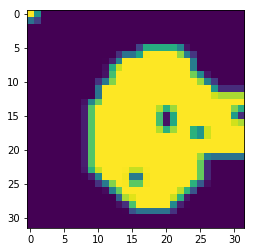

310


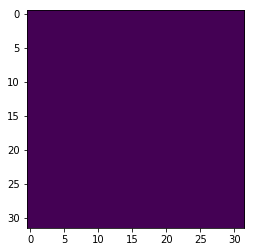

311


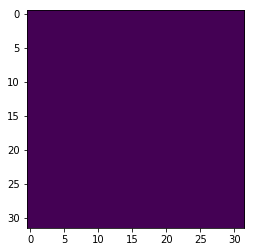

312


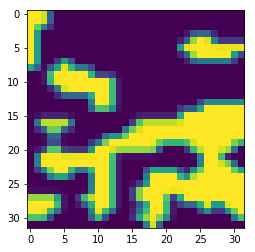

313


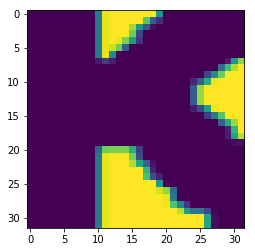

314


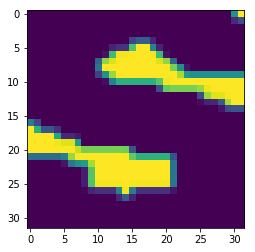

315


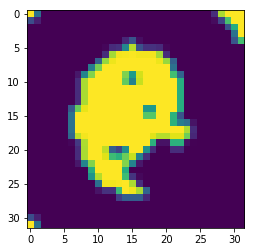

316


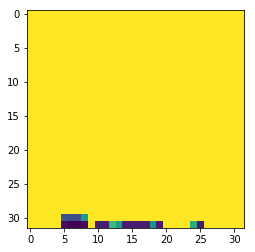

317


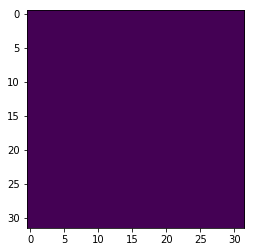

318


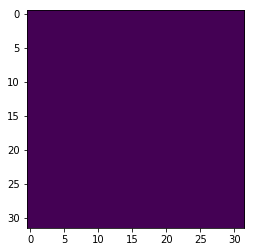

319


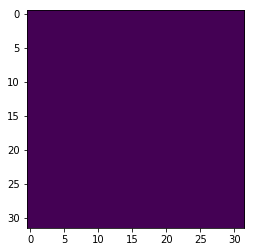

320


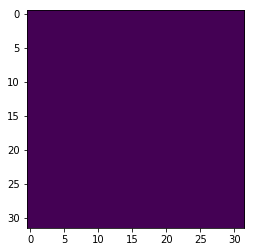

321


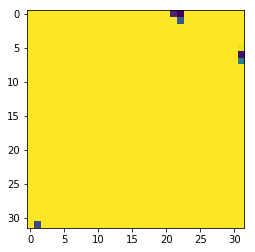

322


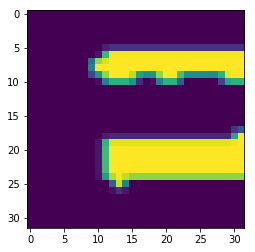

323


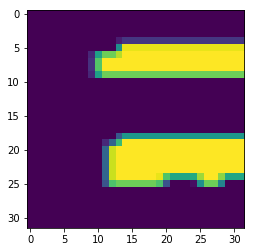

324


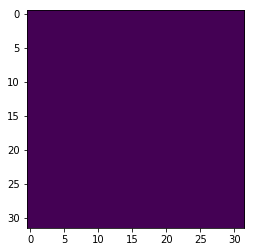

325


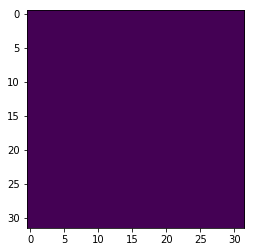

326


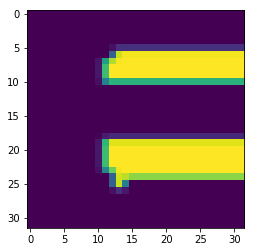

327


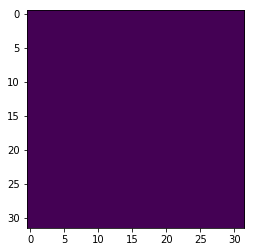

328


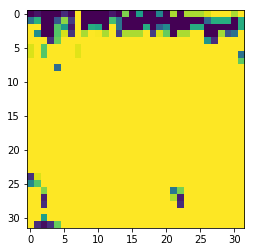

329


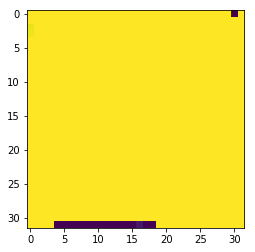

330


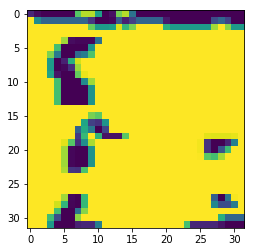

331


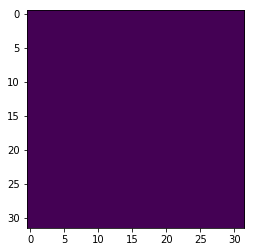

332


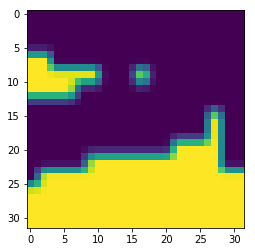

333


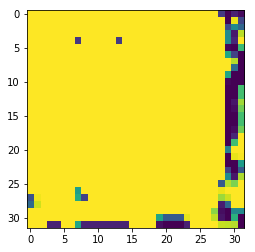

334


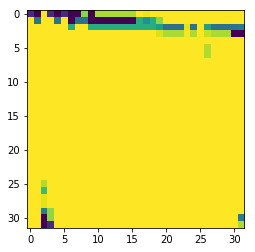

335


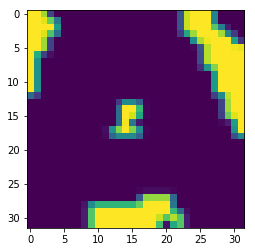

336


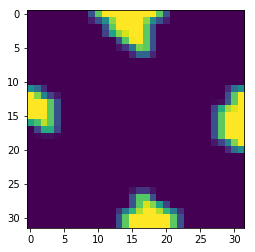

337


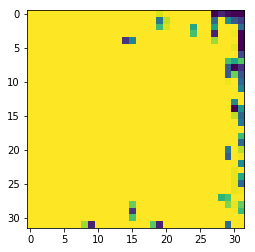

338


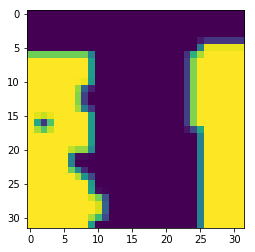

339


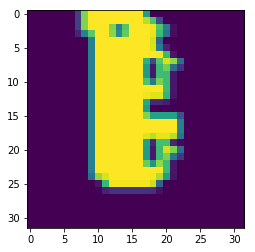

340


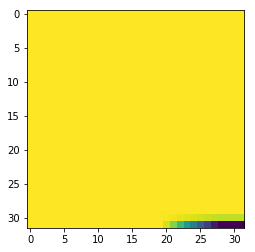

341


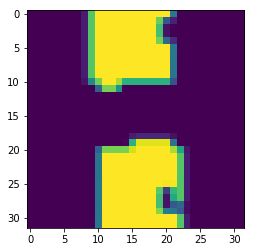

342


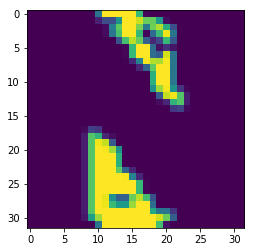

343


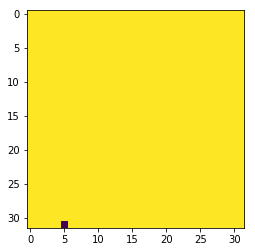

344


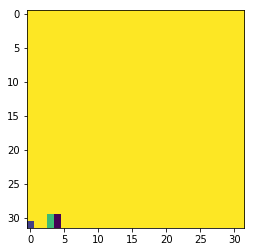

345


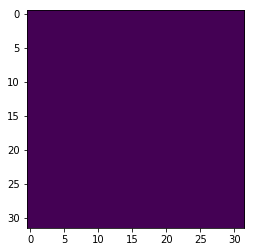

346


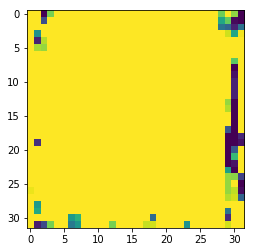

347


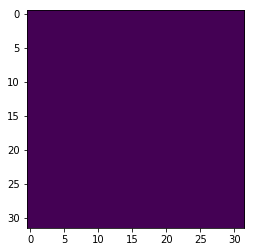

348


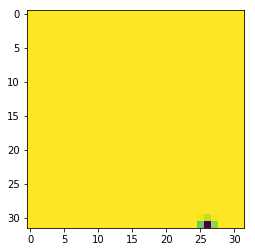

349


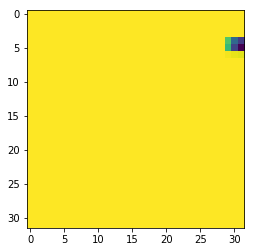

350


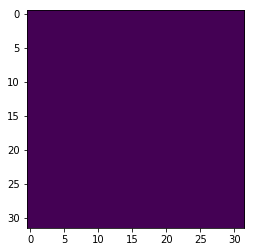

351


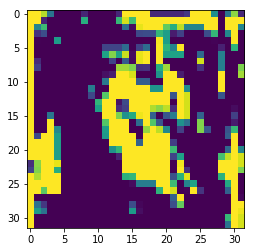

352


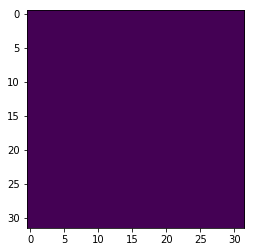

353


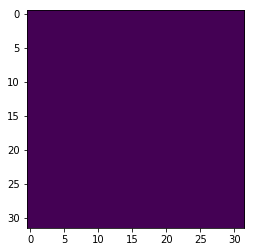

354


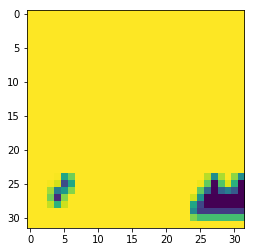

355


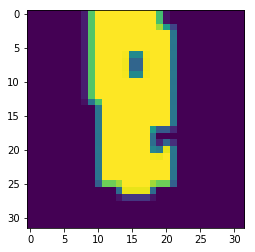

356


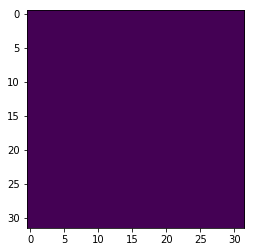

357


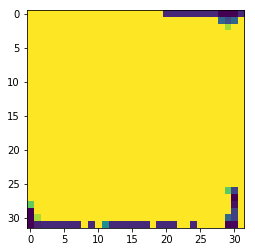

358


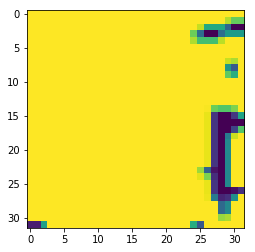

359


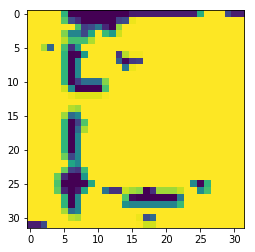

360


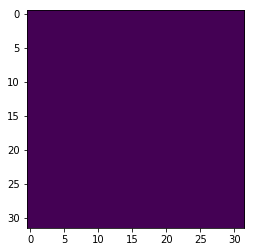

361


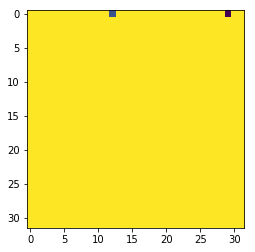

362


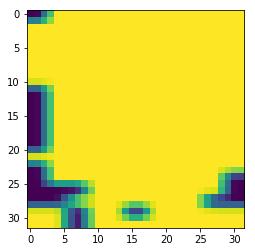

363


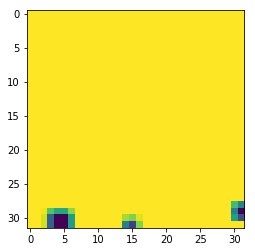

364


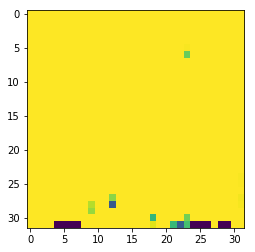

365


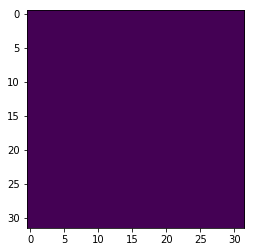

366


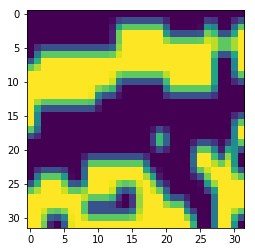

367


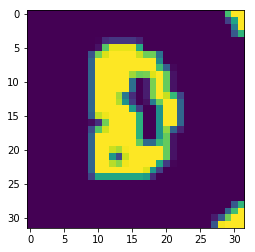

368


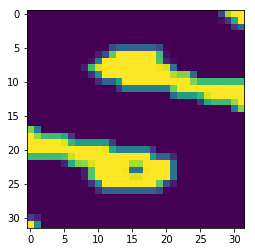

369


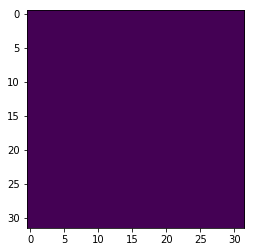

370


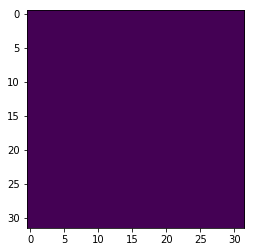

371


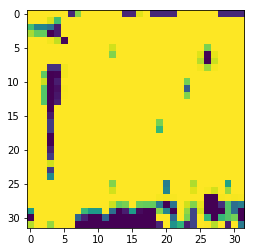

372


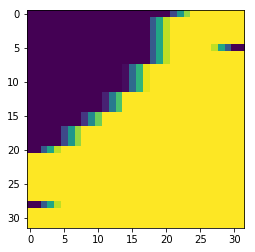

373


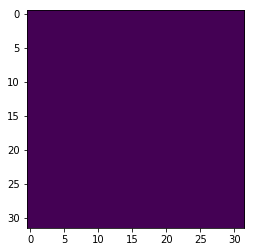

374


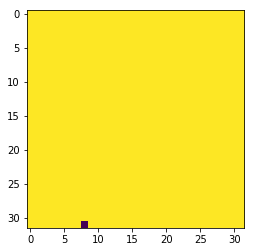

375


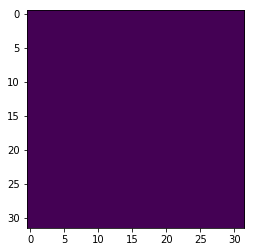

376


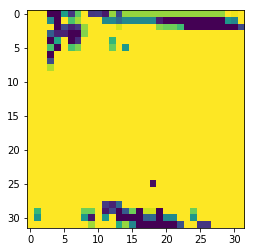

377


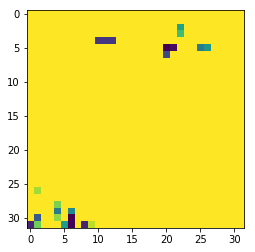

378


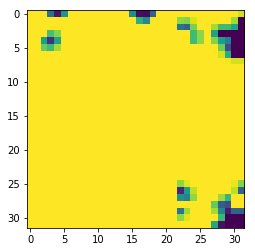

379


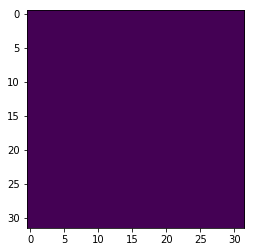

380


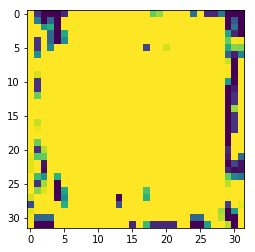

381


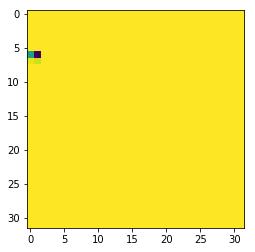

382


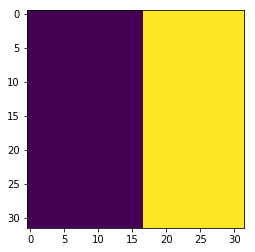

383


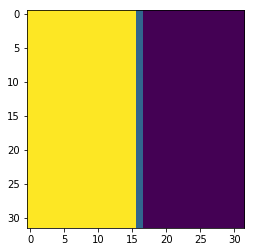

384


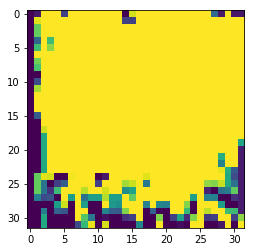

385


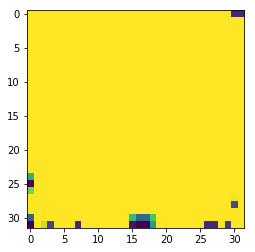

386


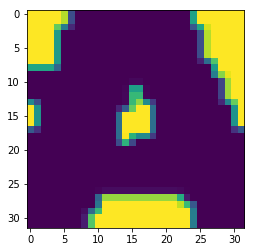

387


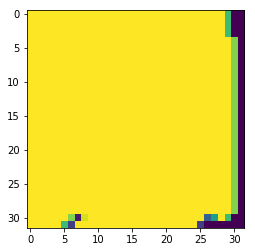

388


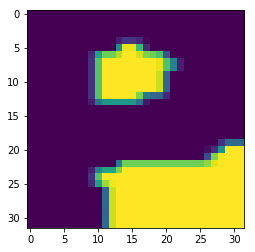

389


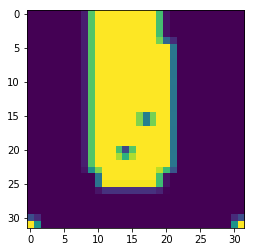

390


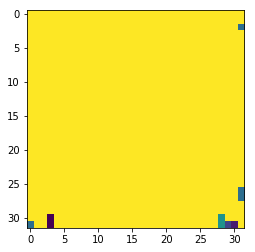

391


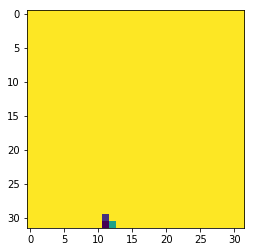

392


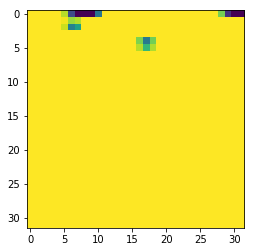

393


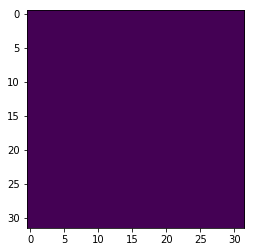

394


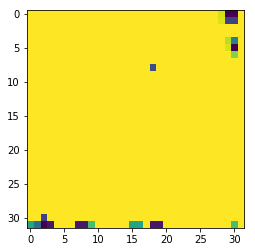

395


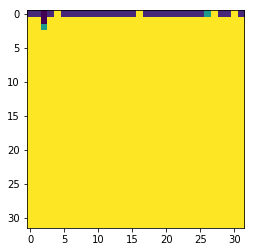

396


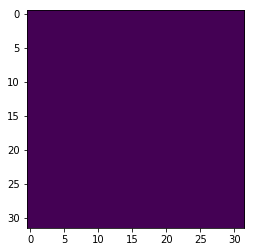

397


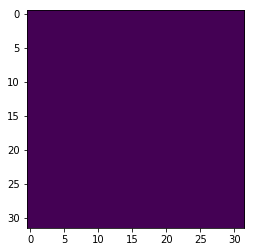

398


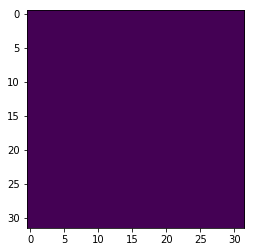

399


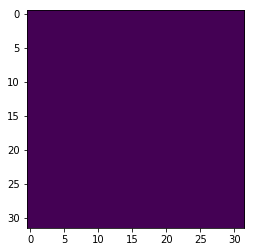

400


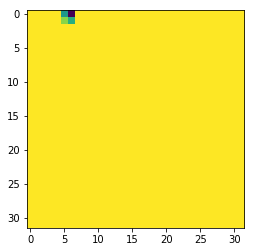

401


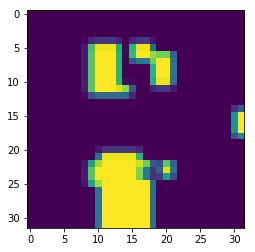

402


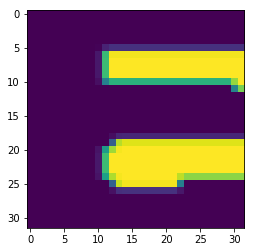

403


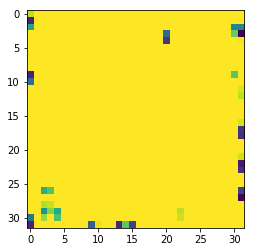

404


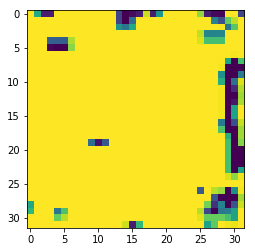

405


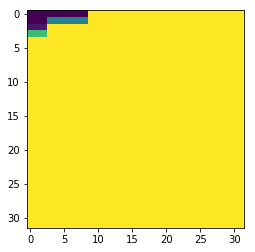

406


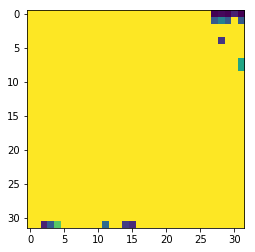

407


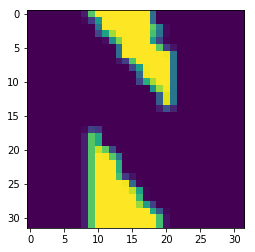

408


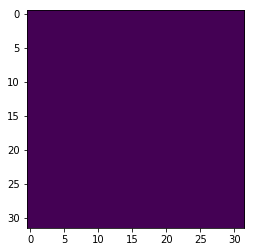

409


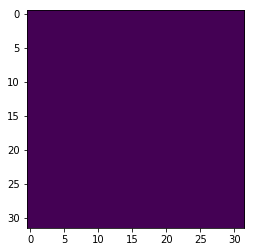

410


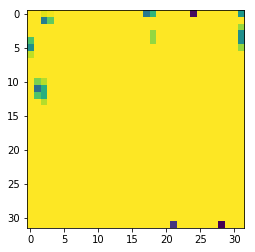

411


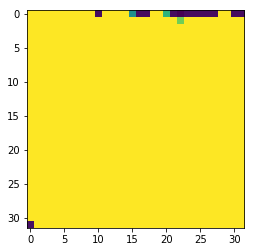

412


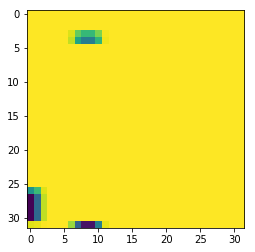

413


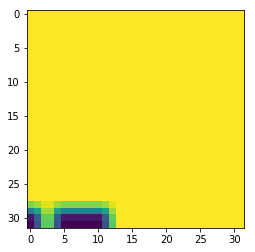

414


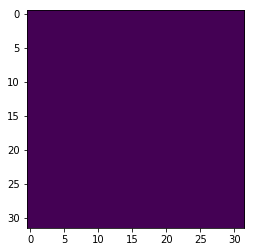

415


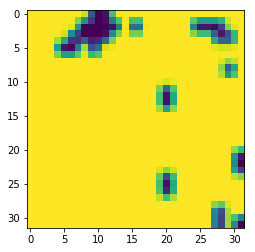

416


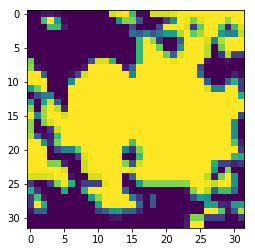

417


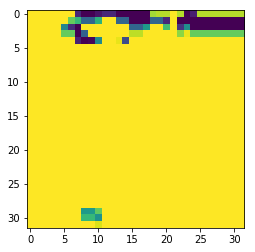

418


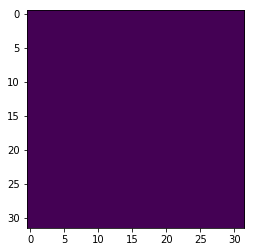

419


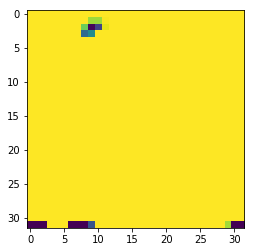

420


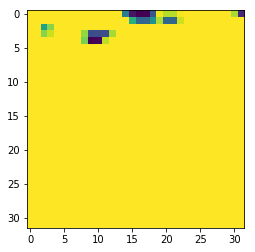

421


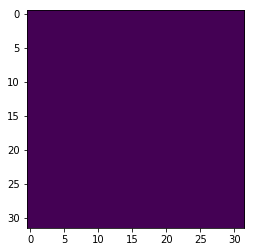

422


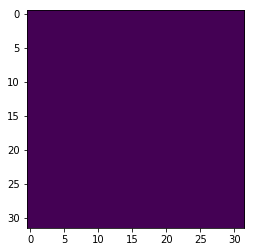

423


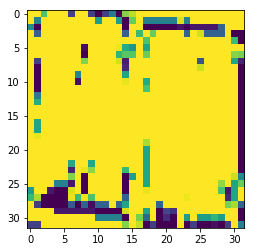

424


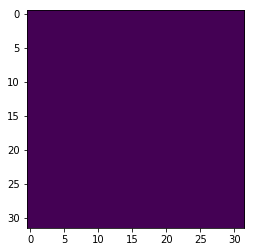

425


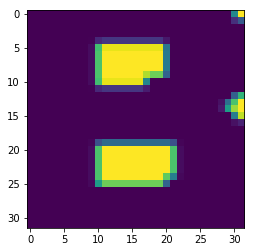

426


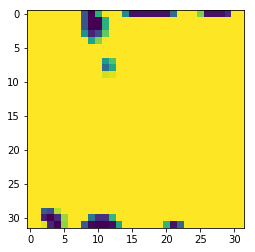

427


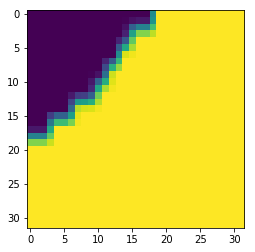

428


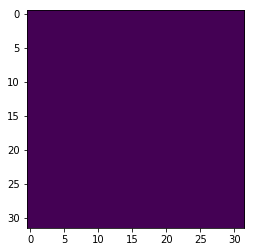

429


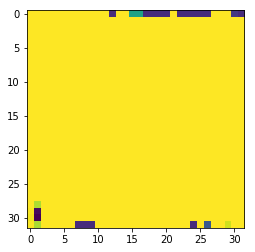

430


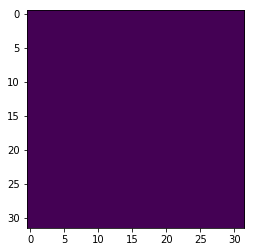

431


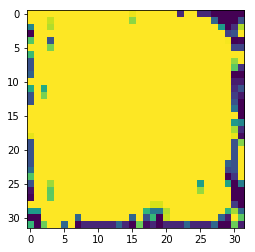

432


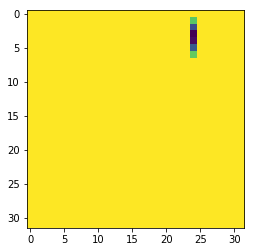

433


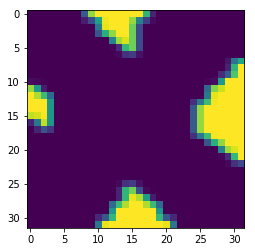

434


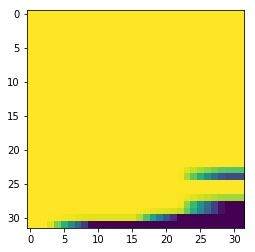

435


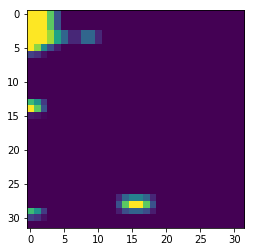

436


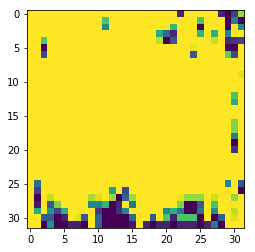

437


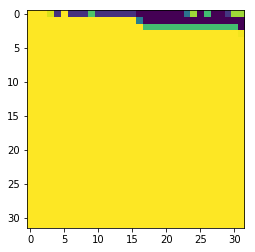

438


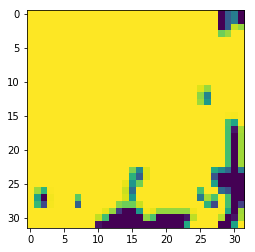

439


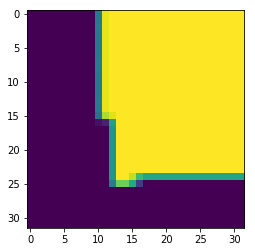

440


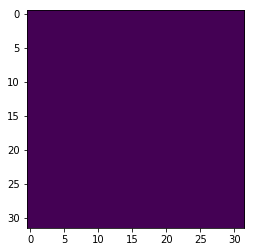

441


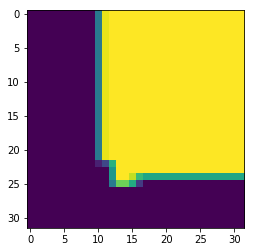

442


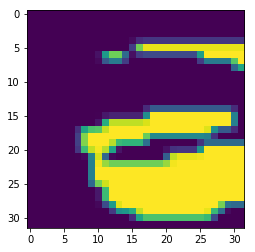

443


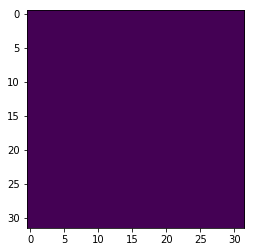

444


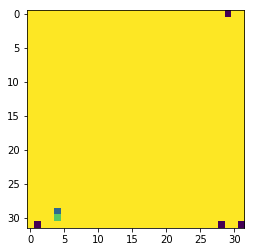

445


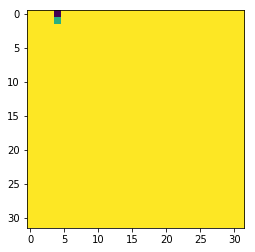

446


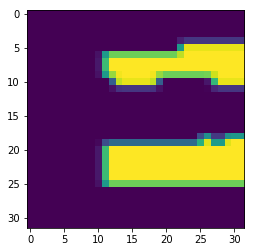

447


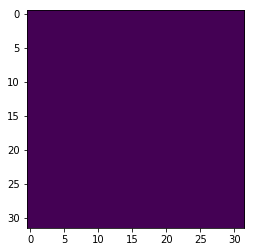

448


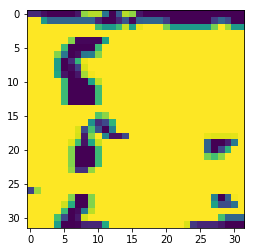

449


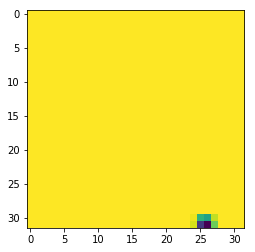

450


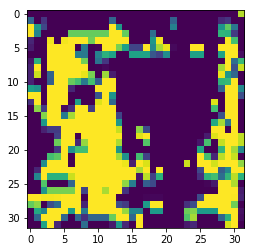

451


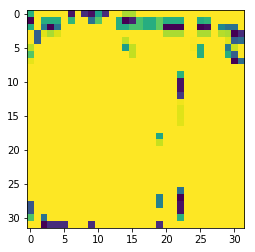

452


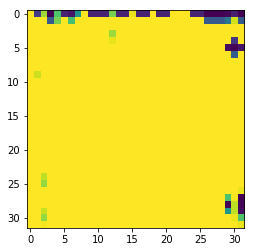

453


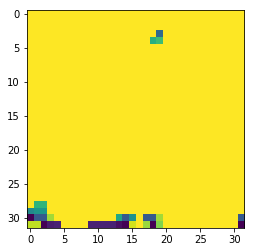

454


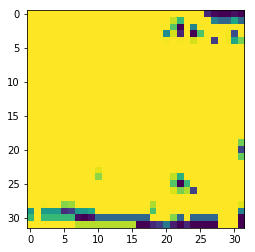

455


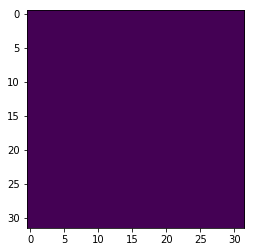

456


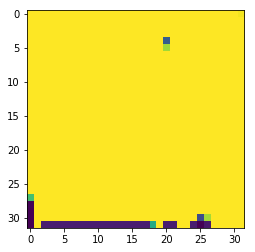

457


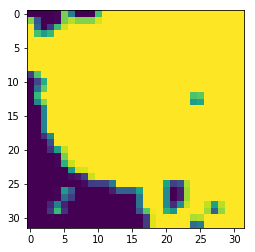

458


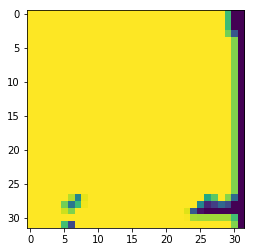

459


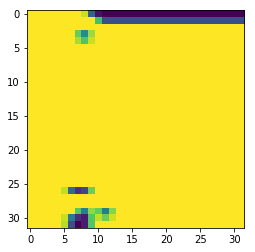

460


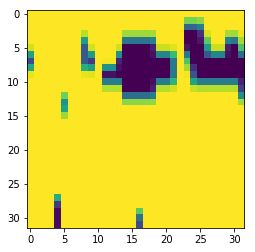

461


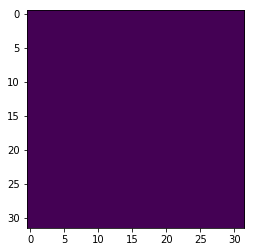

462


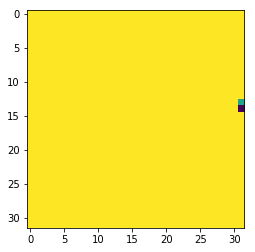

463


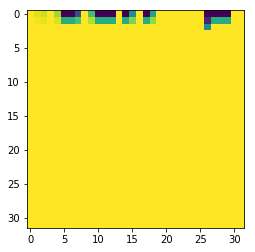

464


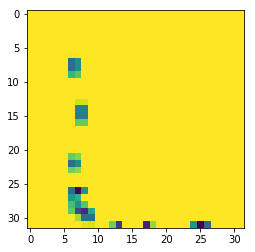

465


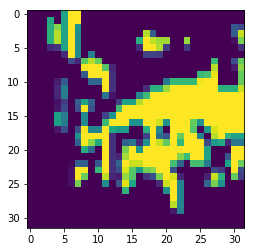

466


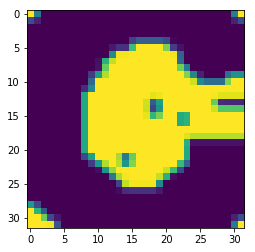

467


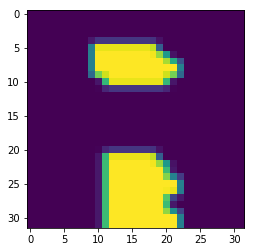

468


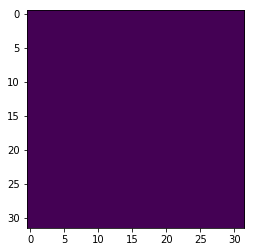

469


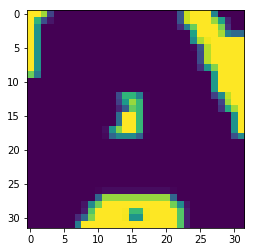

470


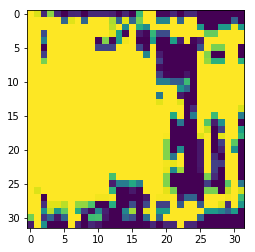

471


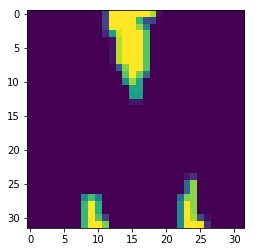

472


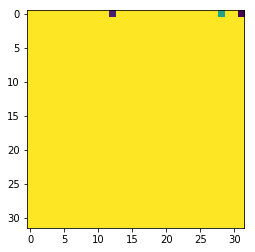

473


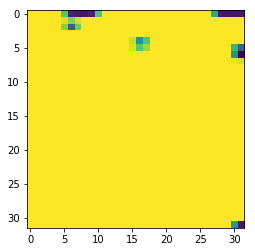

474


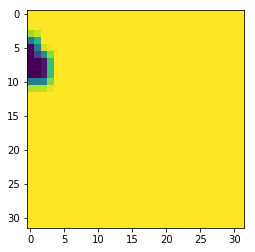

475


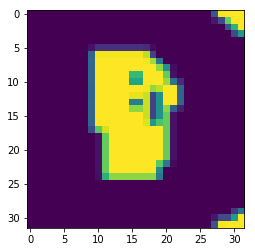

476


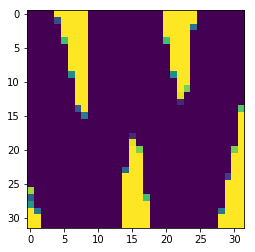

477


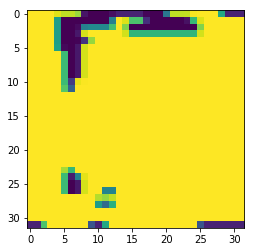

478


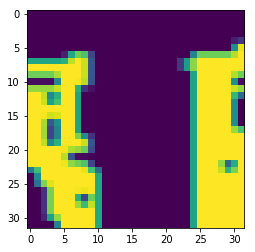

479


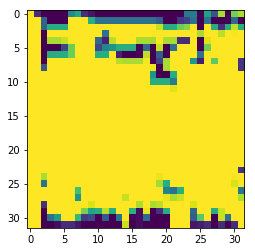

480


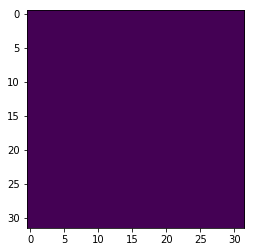

481


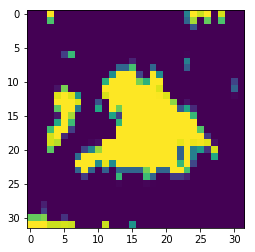

482


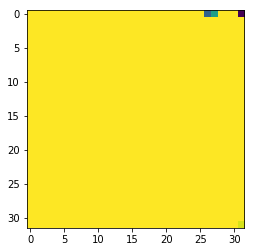

483


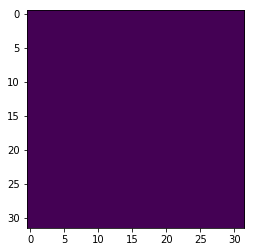

484


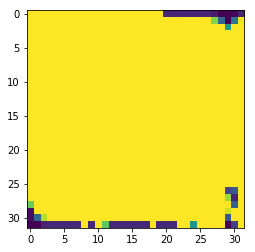

485


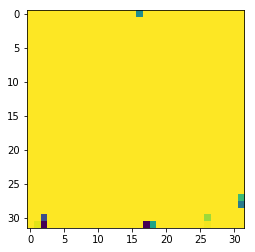

486


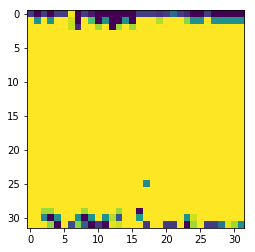

487


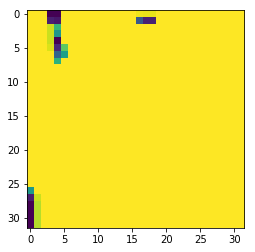

488


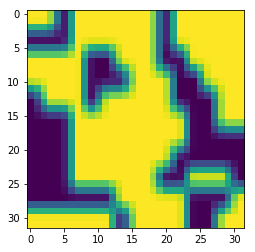

489


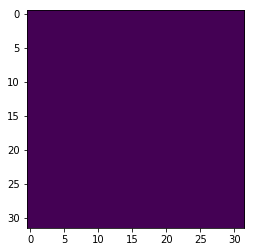

490


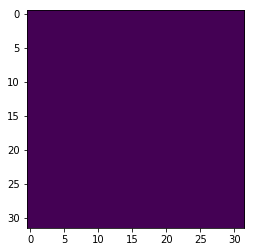

491


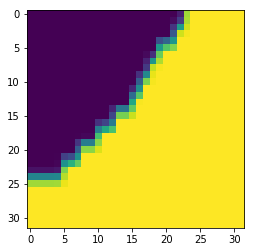

492


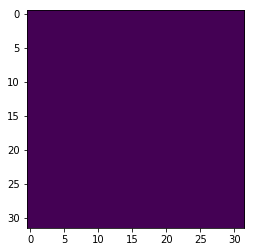

493


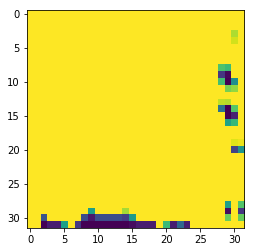

494


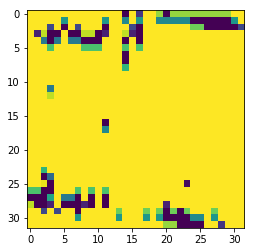

495


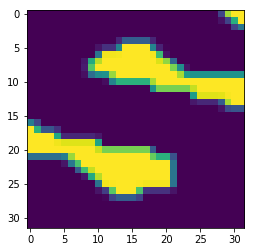

496


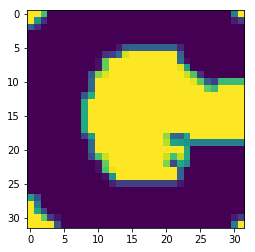

497


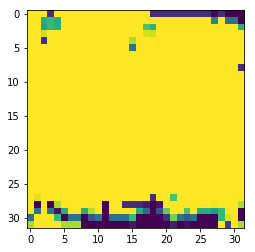

498


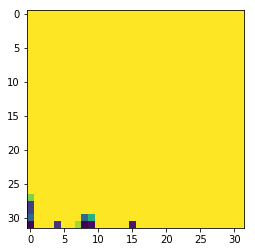

499


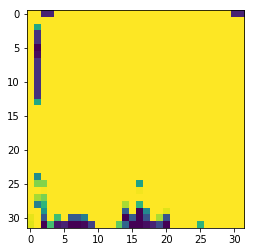

500


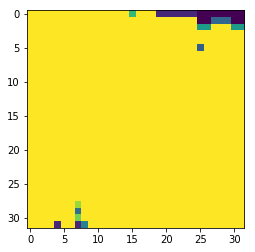

501


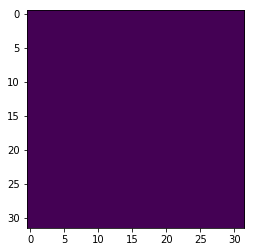

502


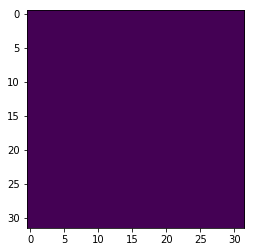

503


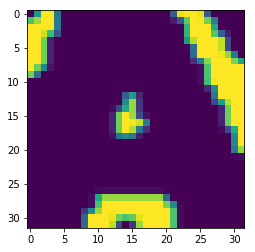

504


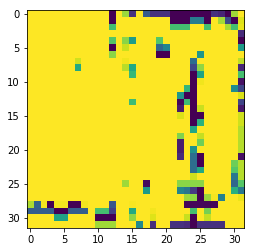

505


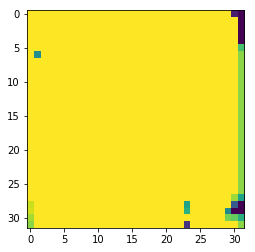

506


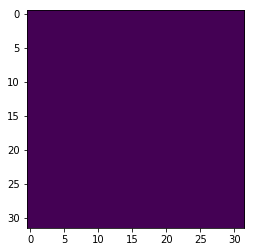

507


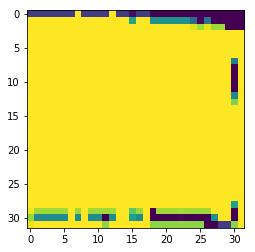

508


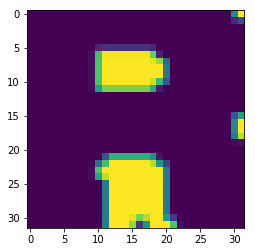

509


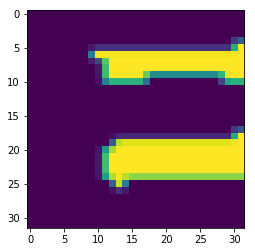

510


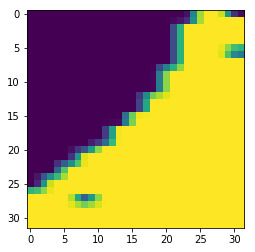

511


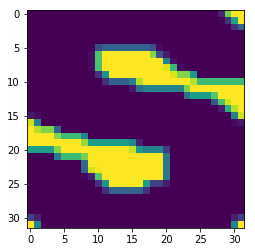

512


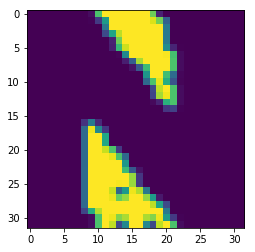

513


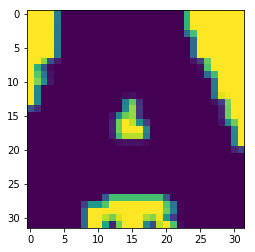

514


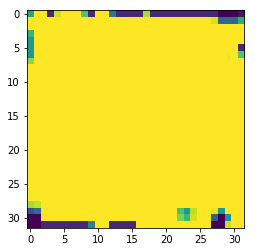

515


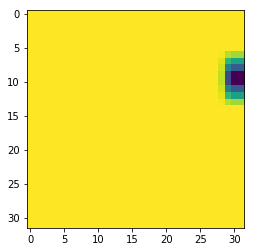

516


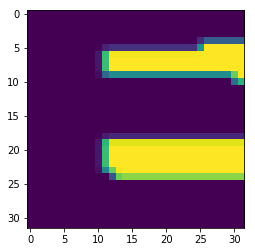

517


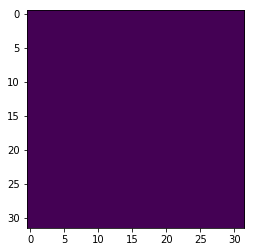

518


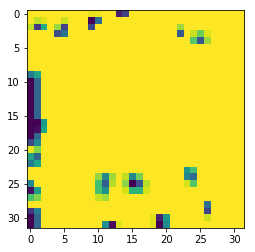

519


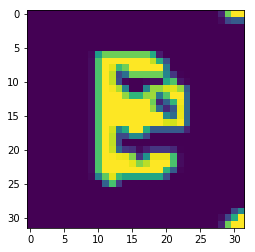

520


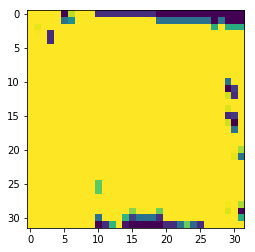

521


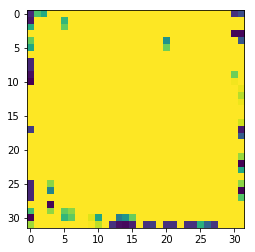

522


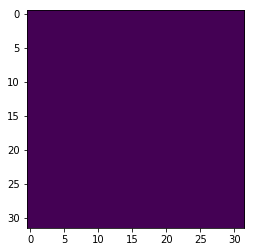

523


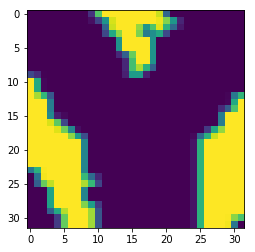

524


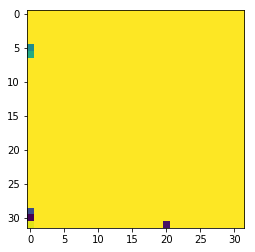

525


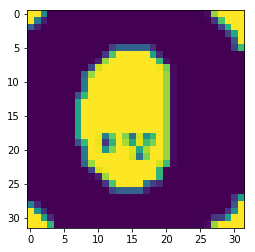

526


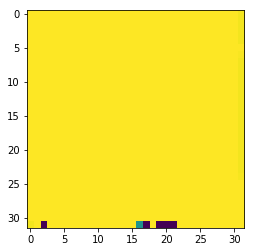

527


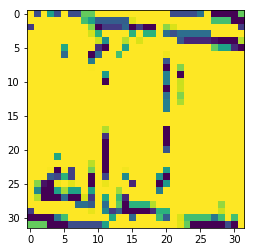

528


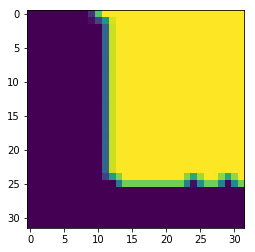

529


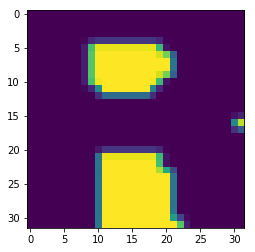

530


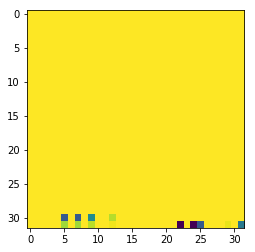

531


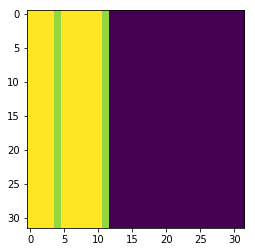

532


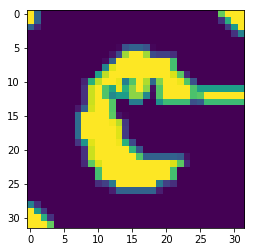

533


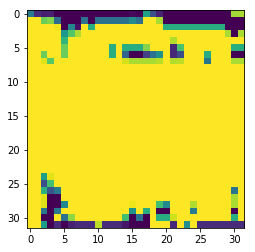

534


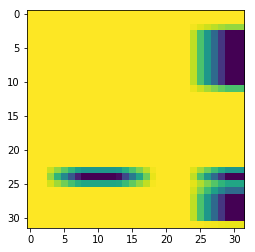

535


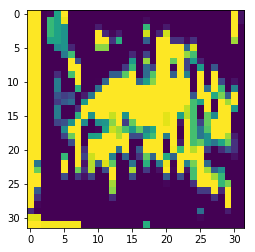

536


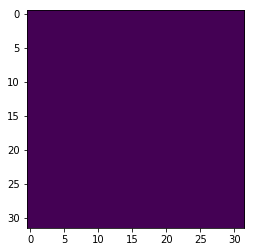

537


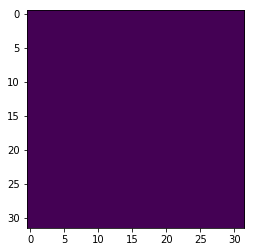

538


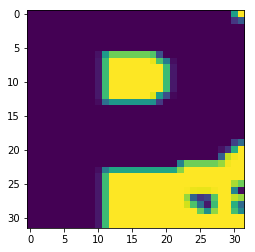

539


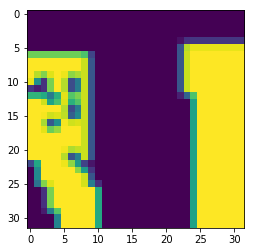

540


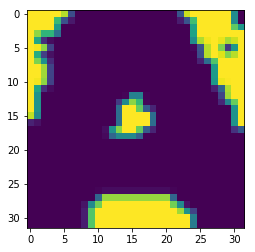

541


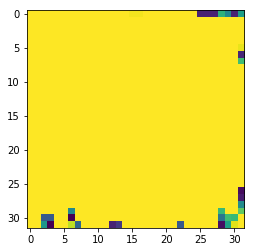

542


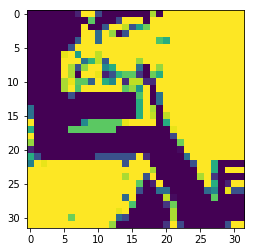

543


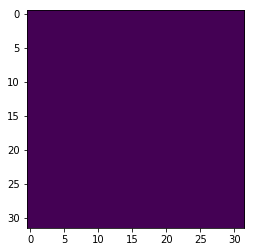

544


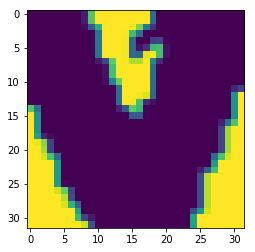

545


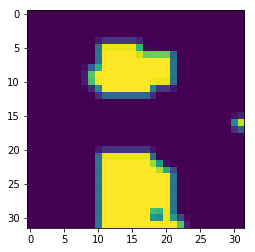

546


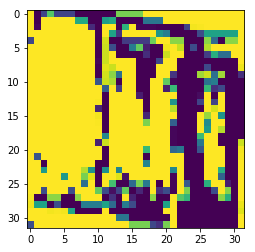

547


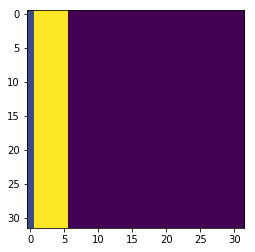

548


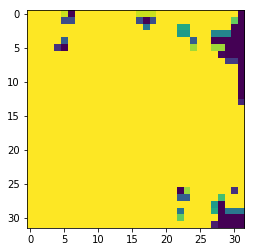

549


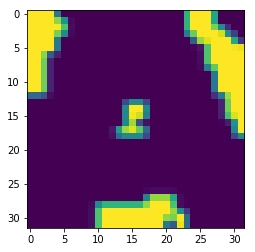

550


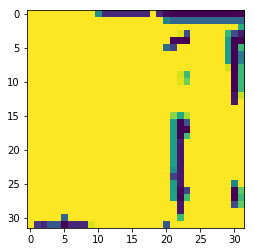

551


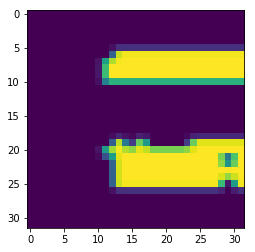

552


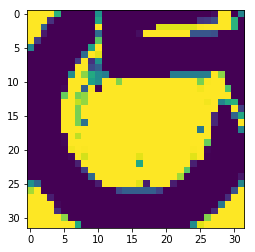

553


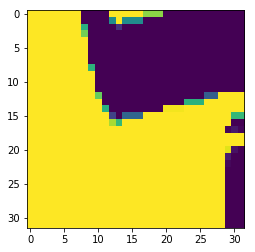

554


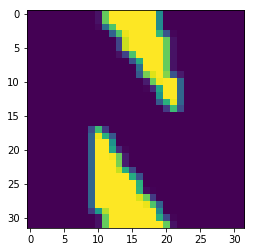

555


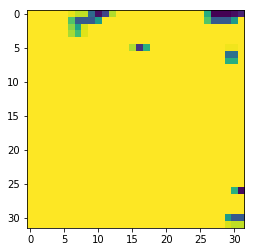

556


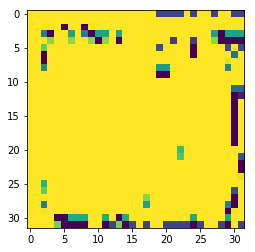

557


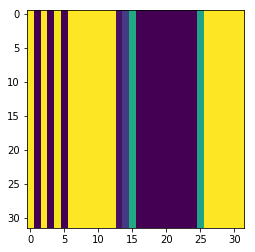

558


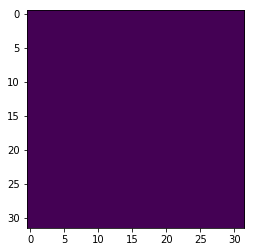

559


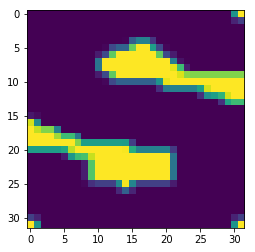

560


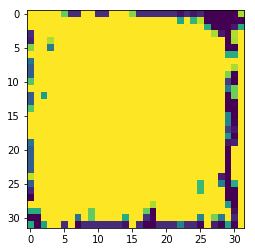

561


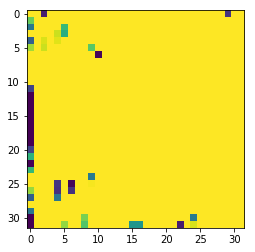

562


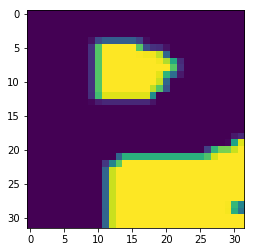

563


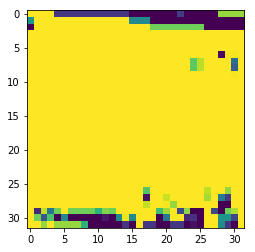

564


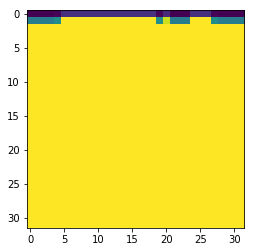

565


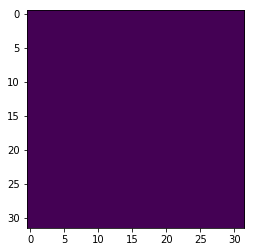

566


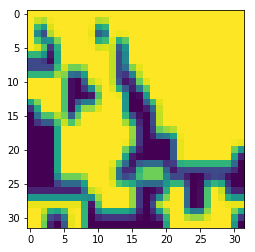

567


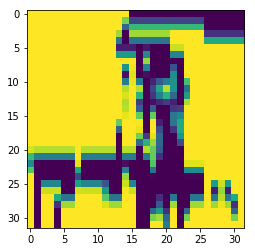

568


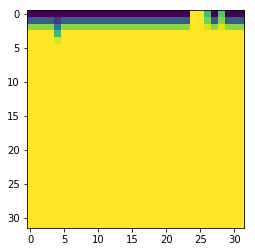

569


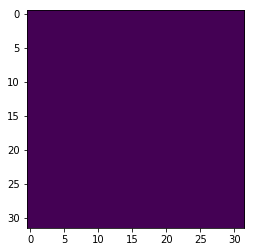

570


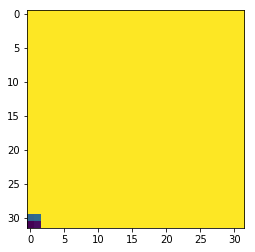

571


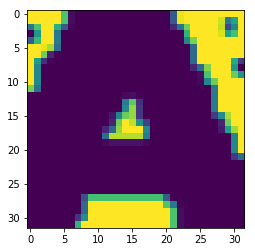

572


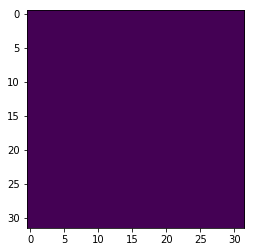

573


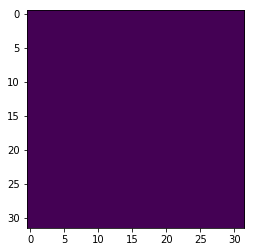

574


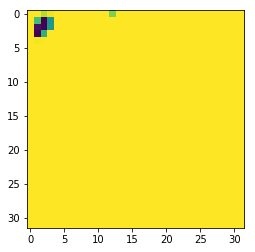

575


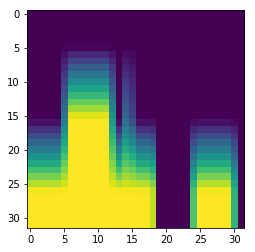

576


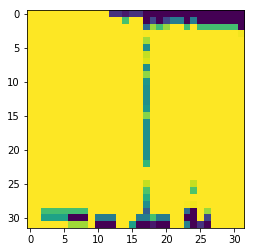

577


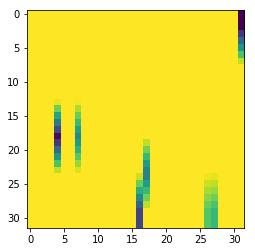

578


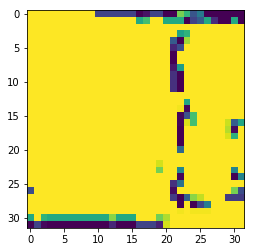

579


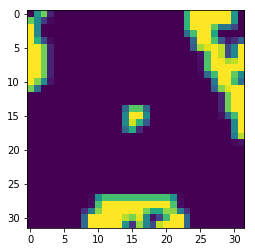

580


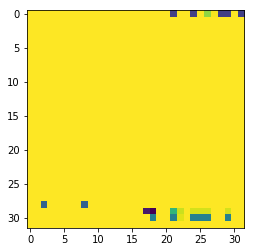

581


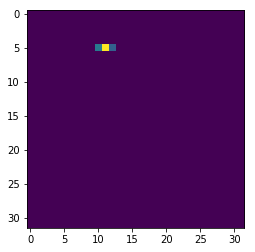

582


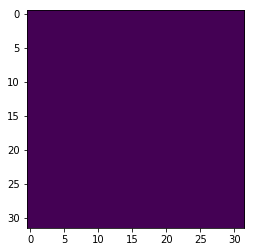

583


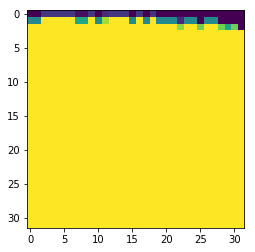

584


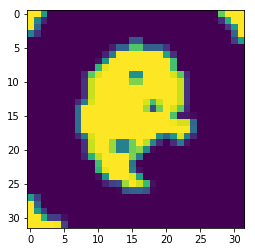

585


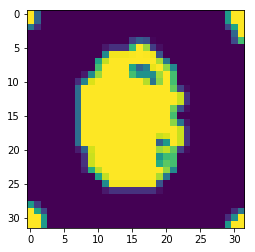

586


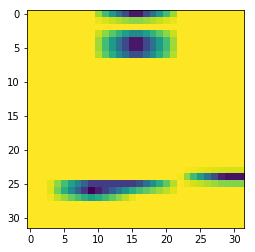

587


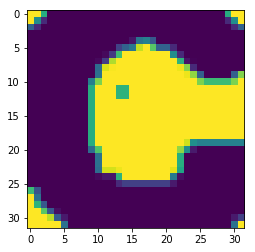

588


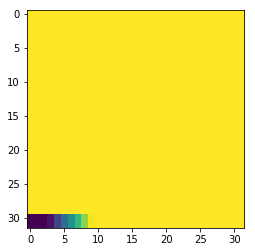

589


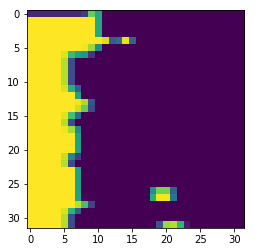

590


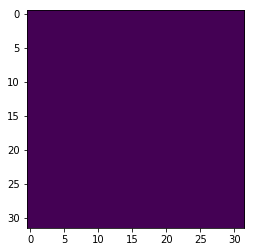

591


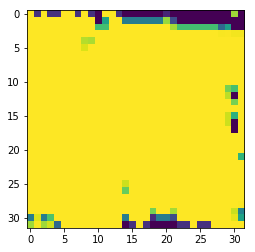

592


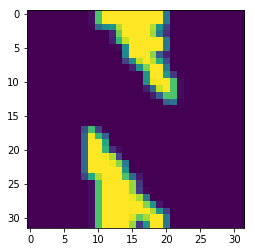

593


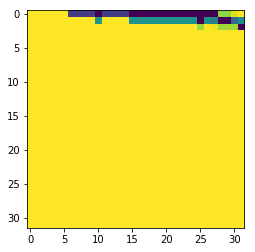

594


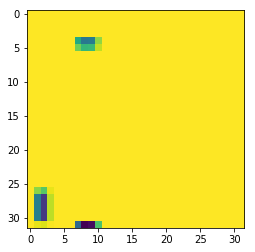

595


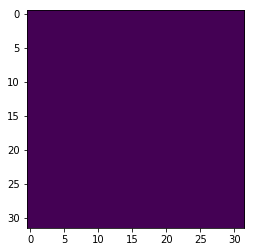

596


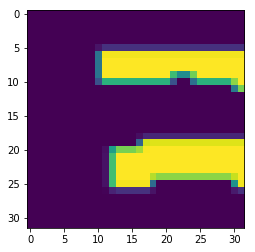

597


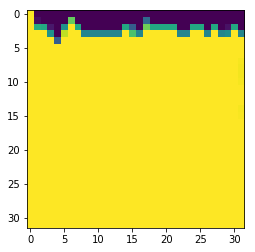

598


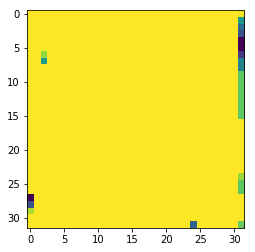

599


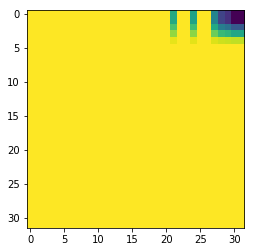

600


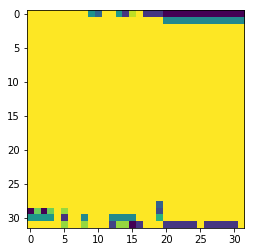

601


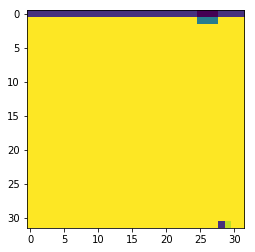

602


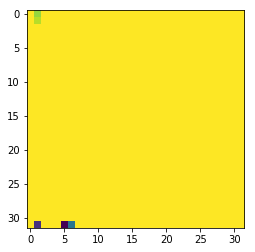

603


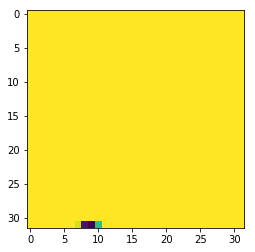

604


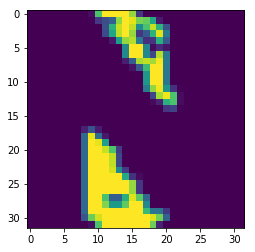

605


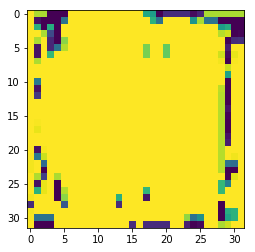

606


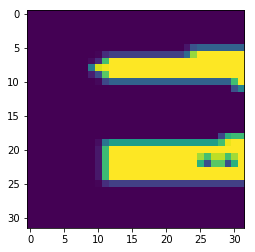

607


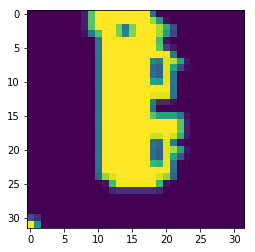

608


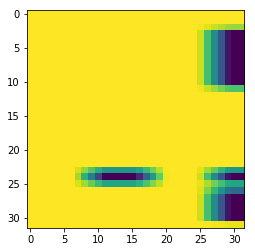

609


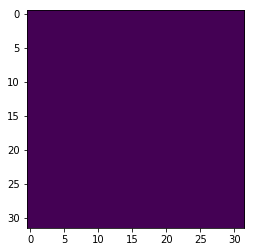

610


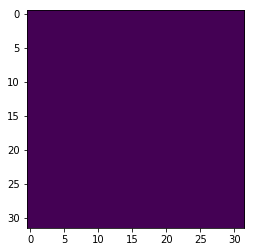

611


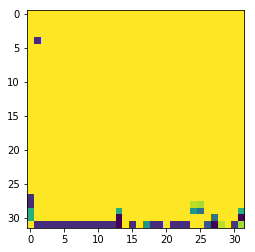

612


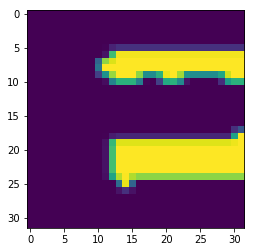

613


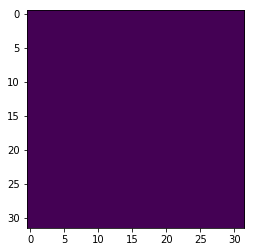

614


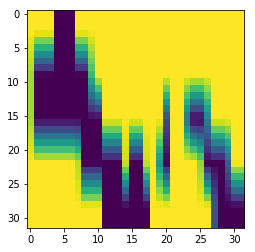

615


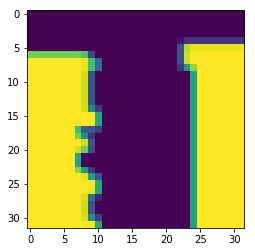

616


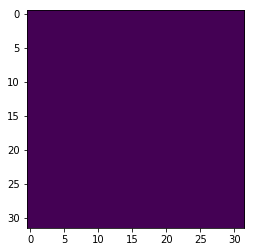

617


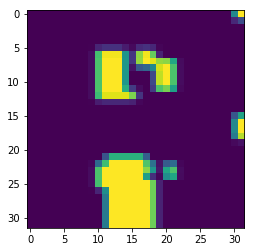

618


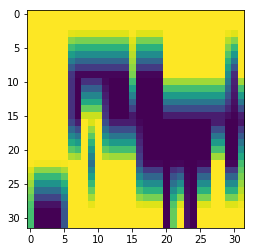

619


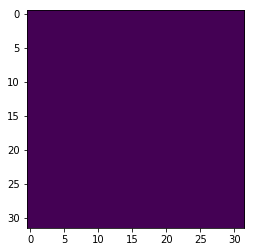

620


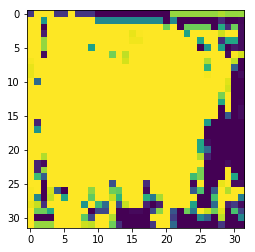

621


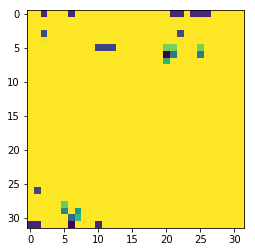

622


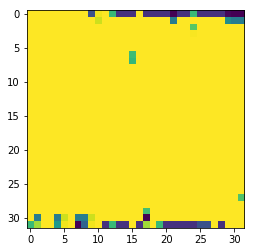

623


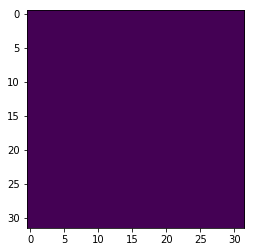

624


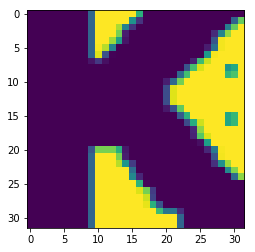

625


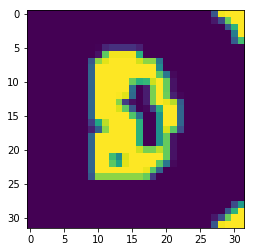

626


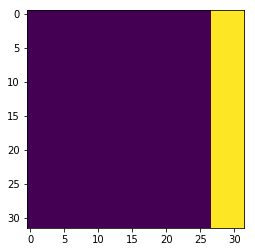

627


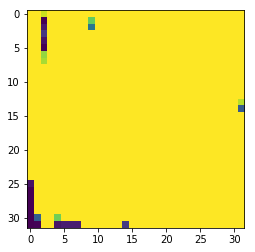

628


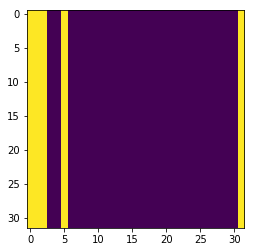

629


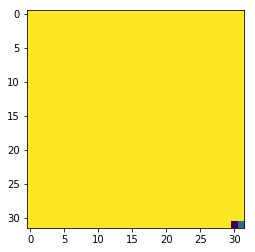

630


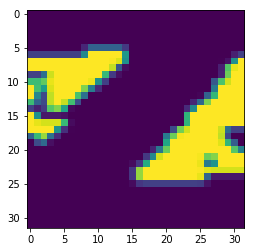

631


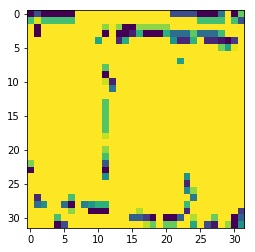

632


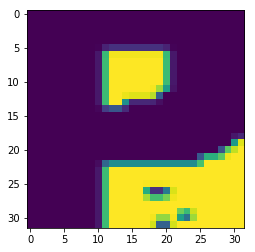

633


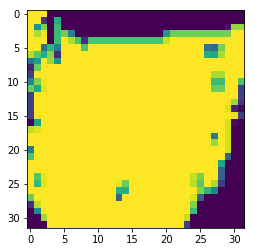

634


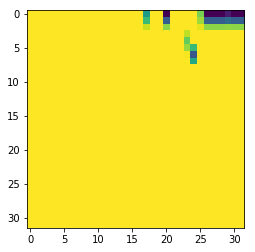

635


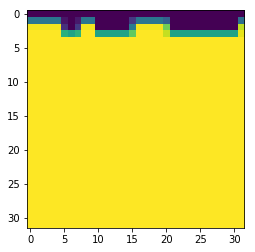

636


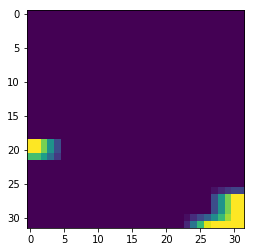

637


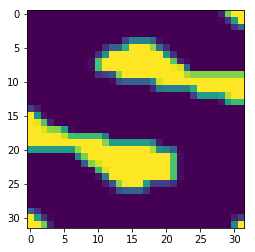

638


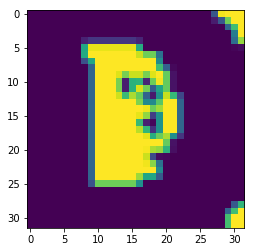

639


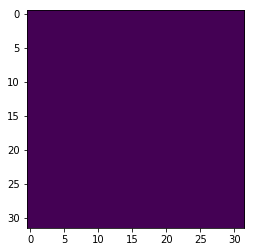

640


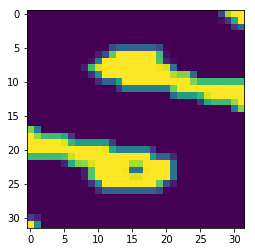

641


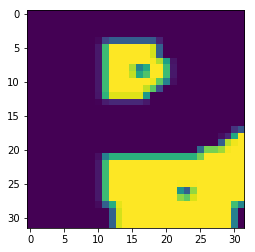

642


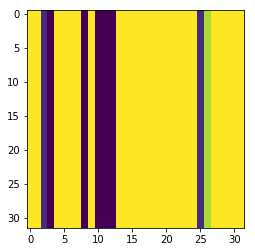

643


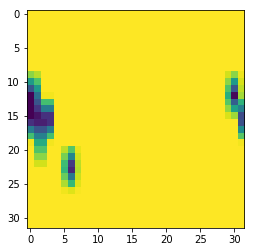

644


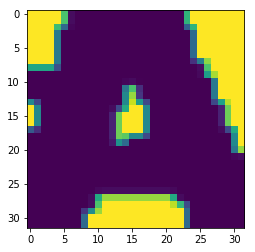

645


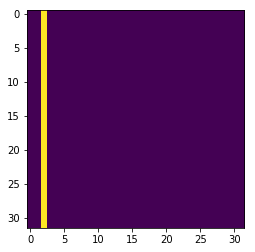

646


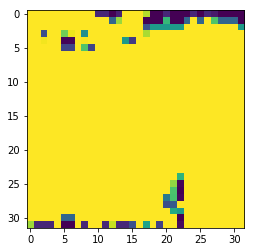

647


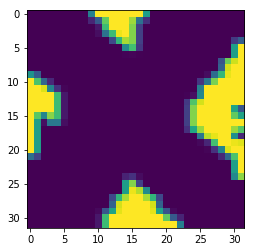

648


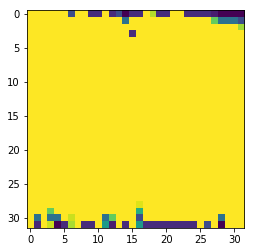

649


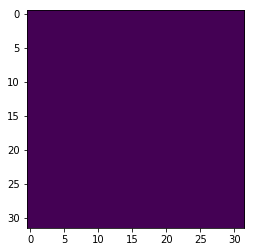

650


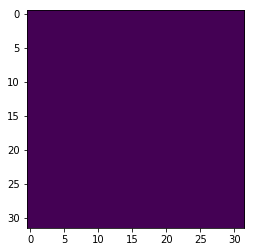

651


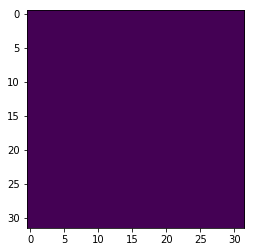

652


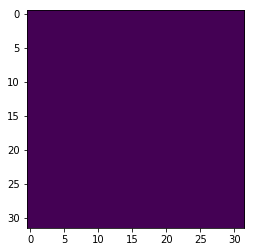

653


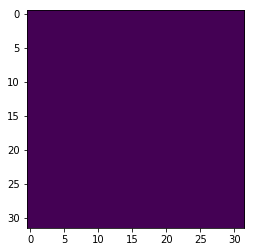

654


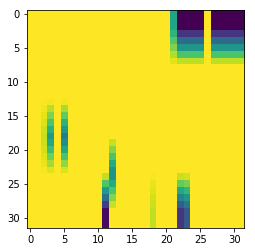

655


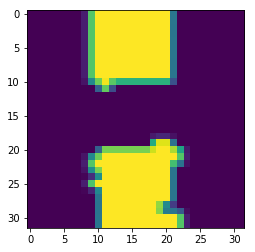

656


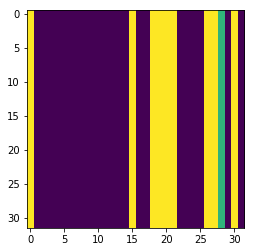

657


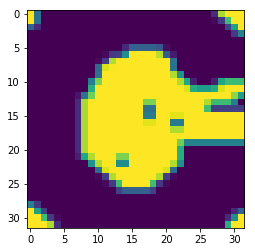

658


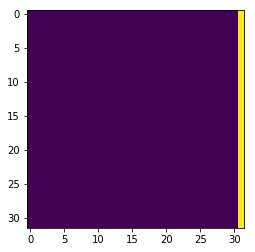

659


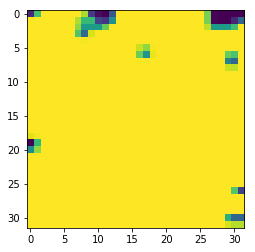

660


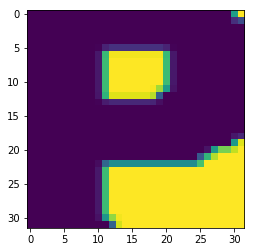

661


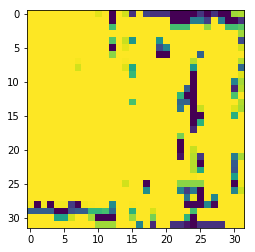

662


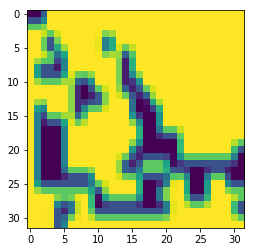

663


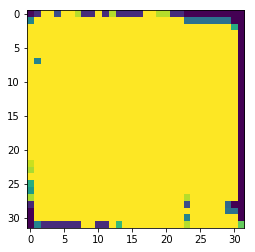

664


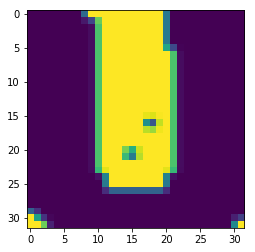

665


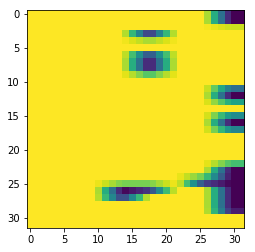

666


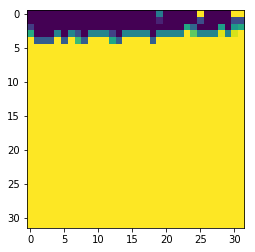

667


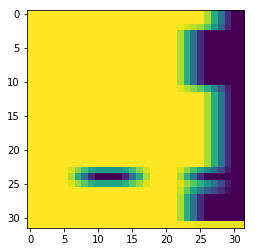

668


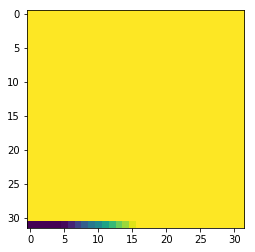

669


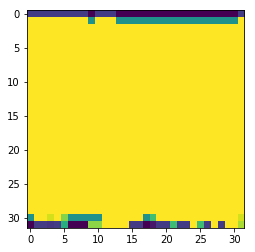

670


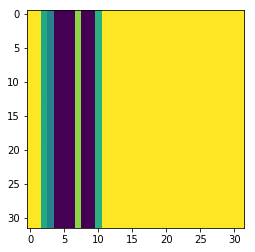

671


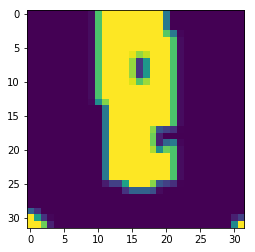

672


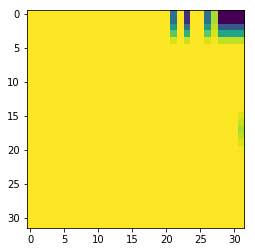

673


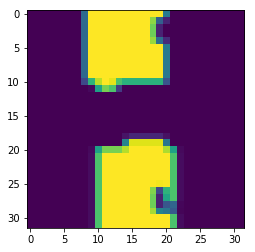

674


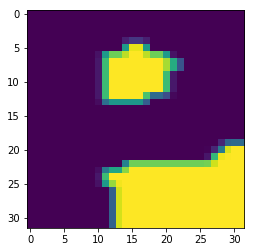

675


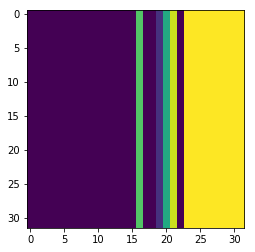

676


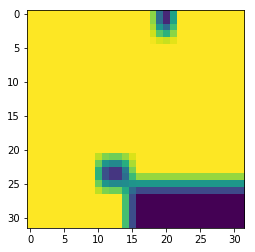

677


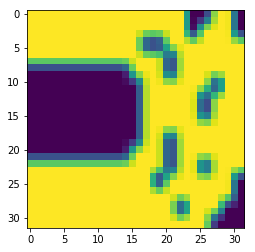

678


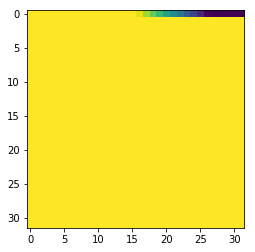

679


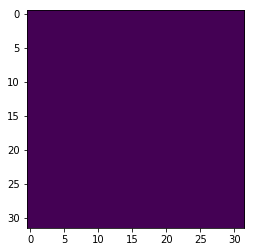

680


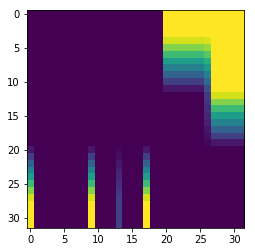

681


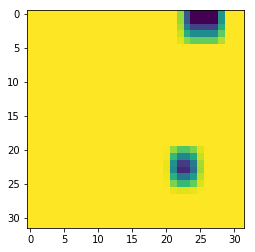

682


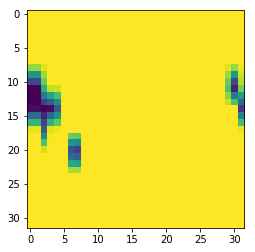

683


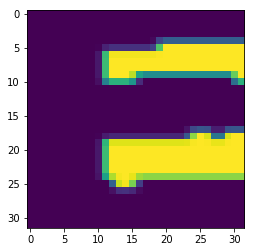

684


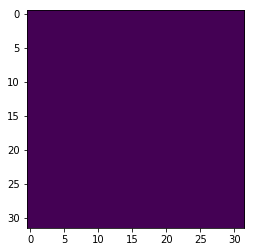

685


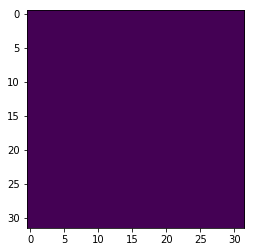

686


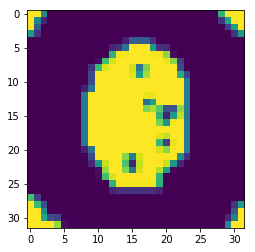

687


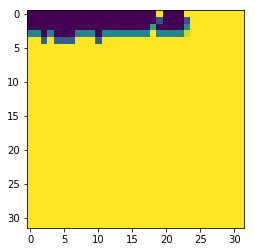

688


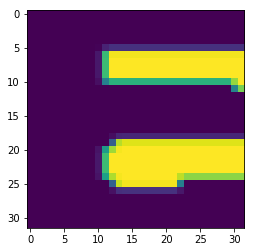

689


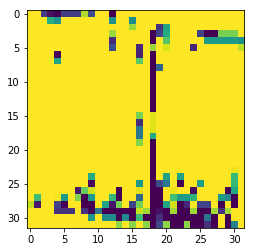

690


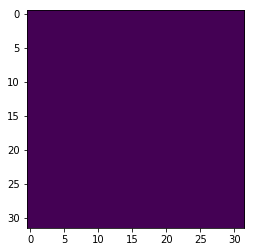

691


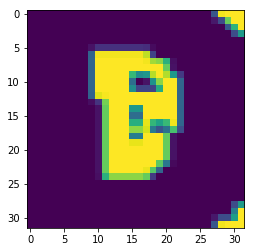

692


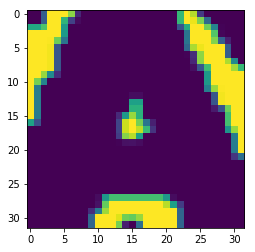

693


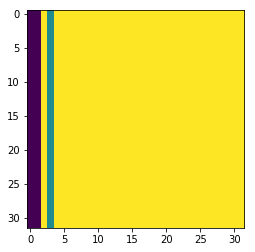

694


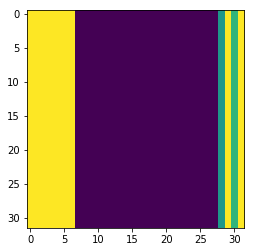

695


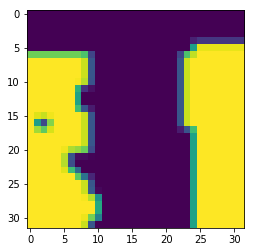

696


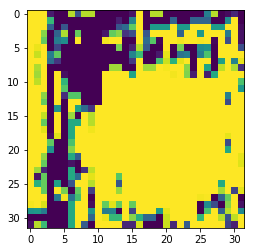

697


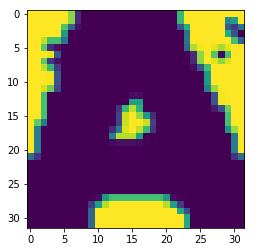

698


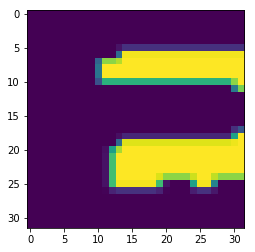

699


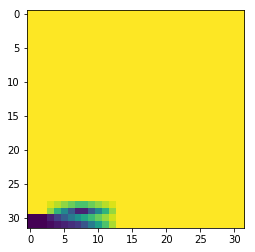

700


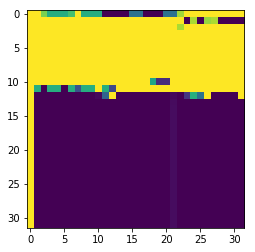

701


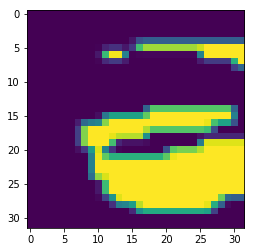

702


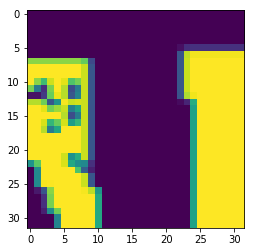

703


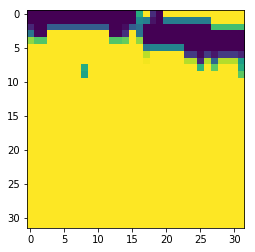

704


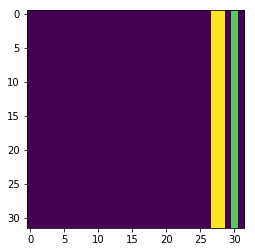

705


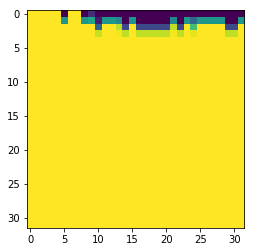

706


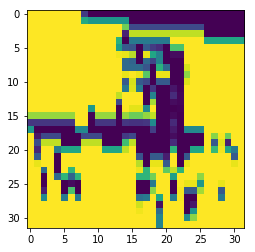

707


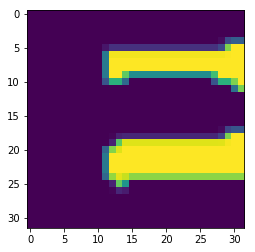

708


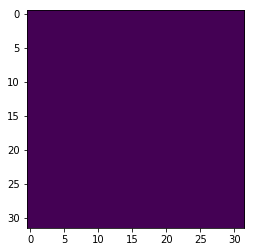

709


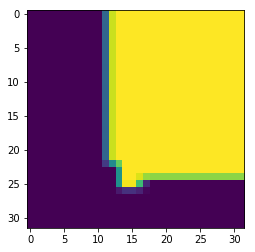

710


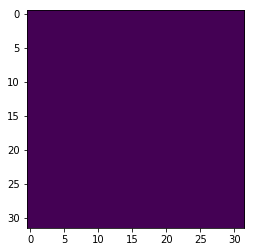

711


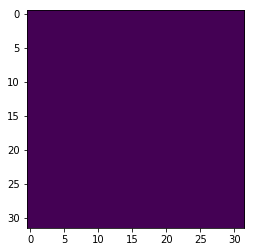

712


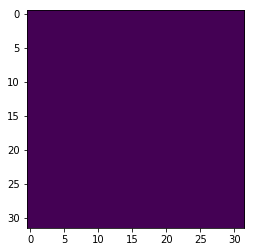

713


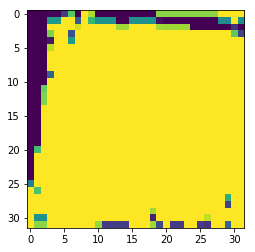

714


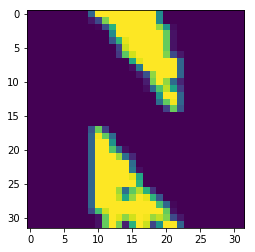

715


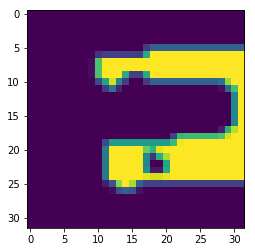

716


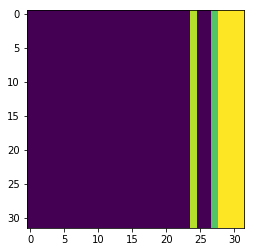

717


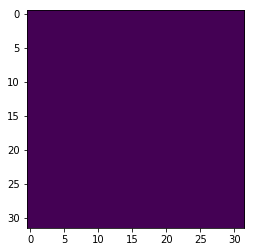

718


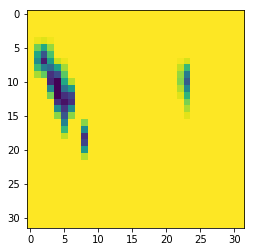

719


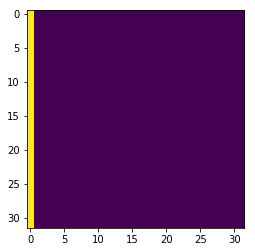

720


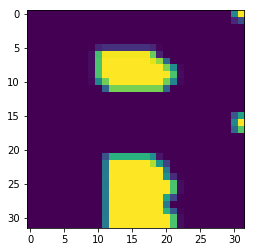

721


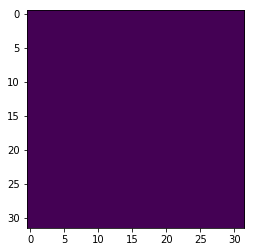

722


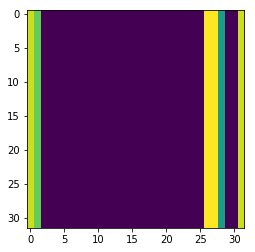

723


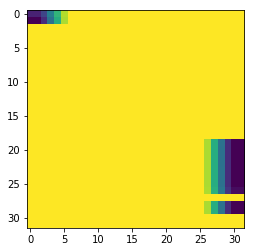

724


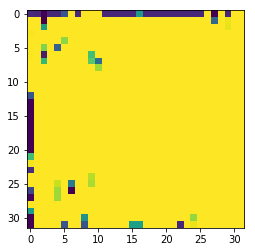

725


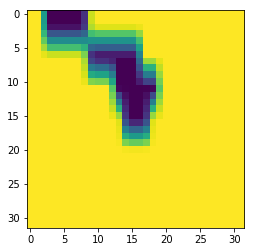

726


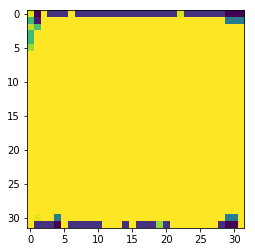

727


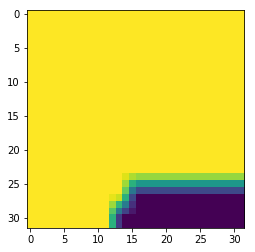

728


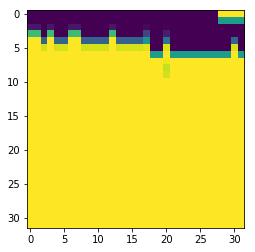

729


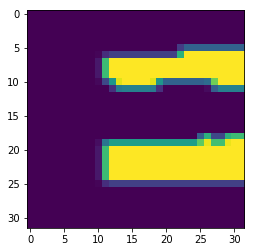

730


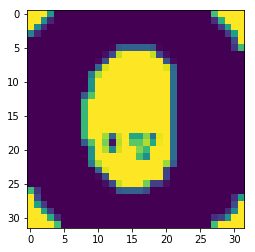

731


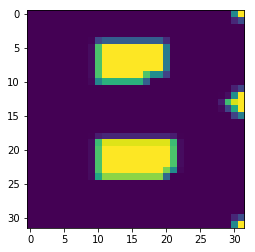

732


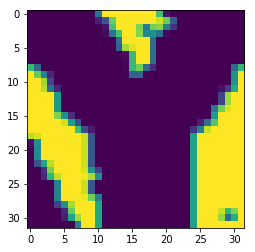

733


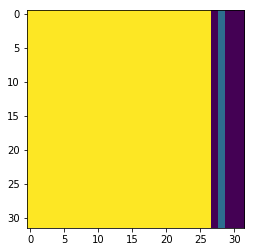

734


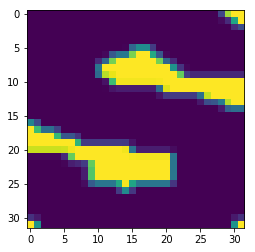

735


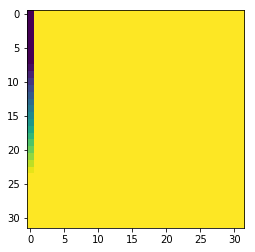

736


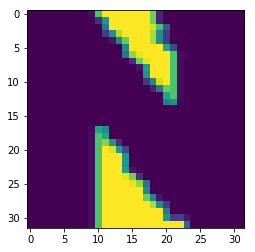

737


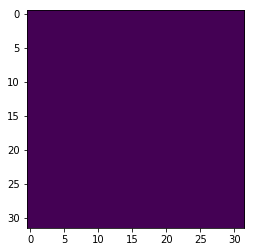

738


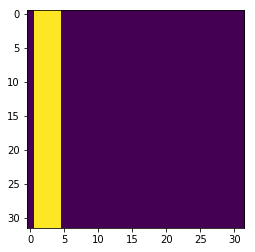

739


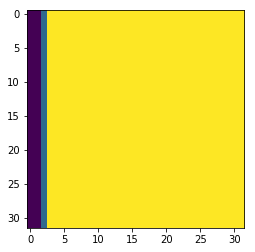

740


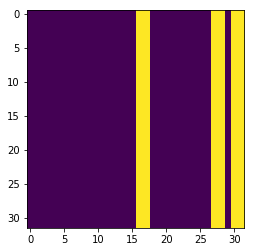

741


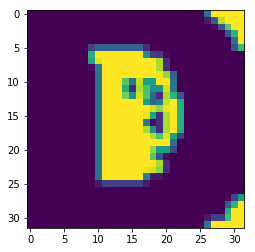

742


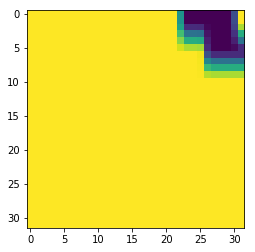

743


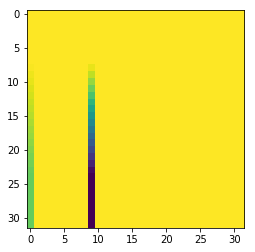

744


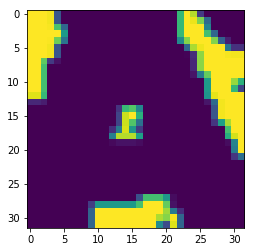

745


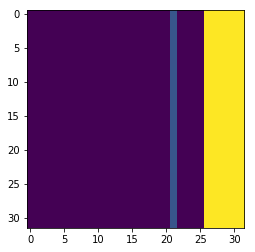

746


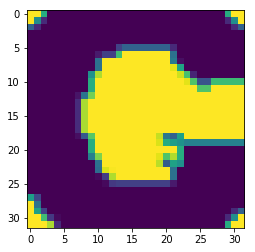

747


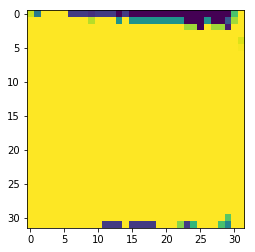

748


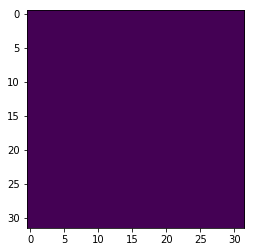

749


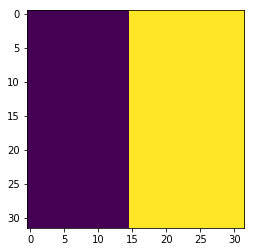

750


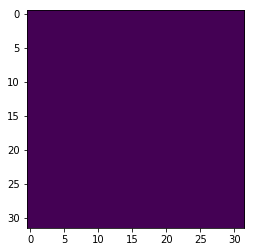

751


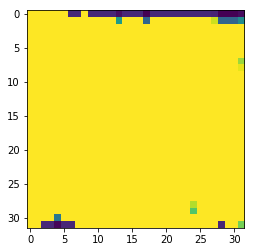

752


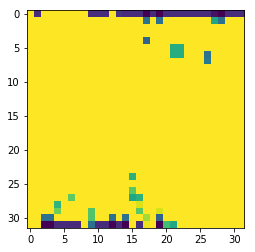

753


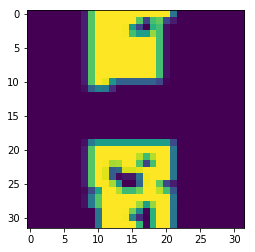

754


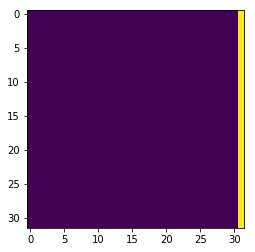

755


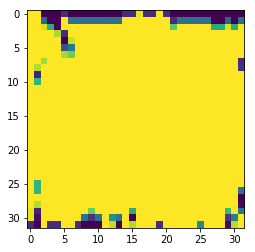

756


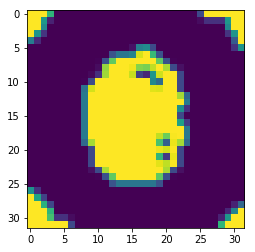

757


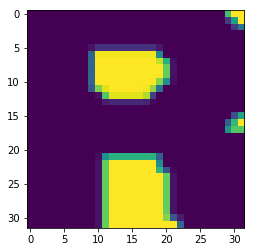

758


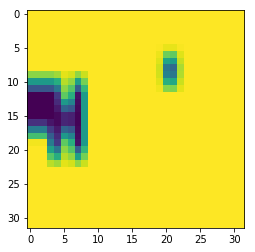

759


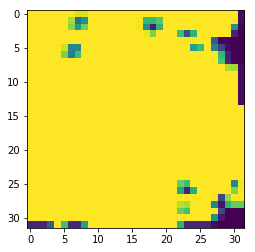

760


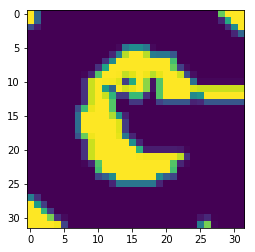

761


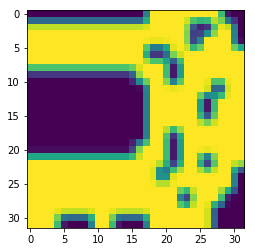

762


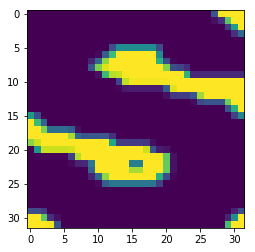

763


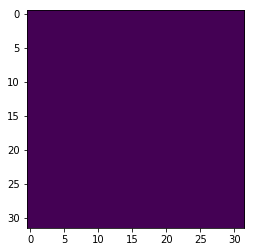

764


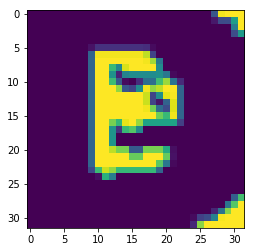

765


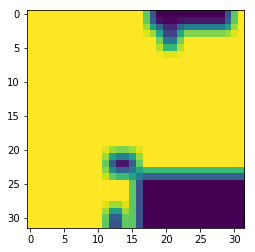

766


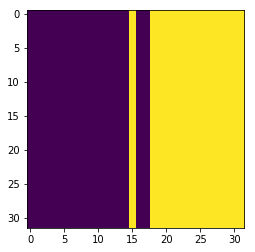

767


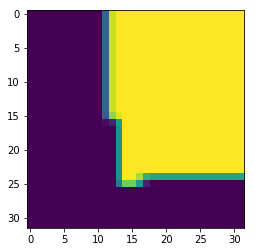

768


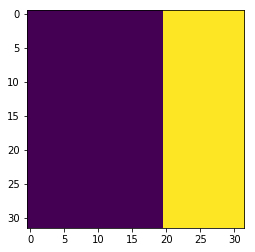

769


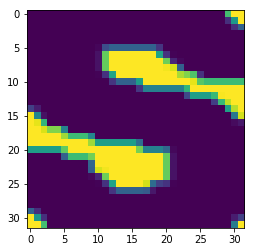

770


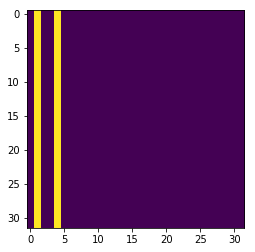

771


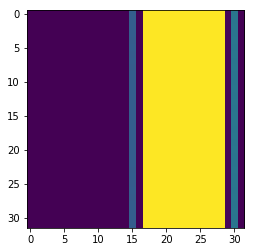

772


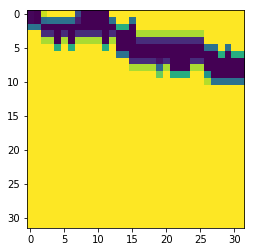

773


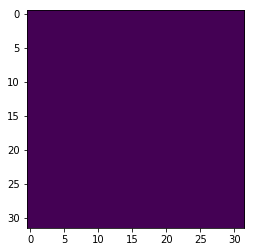

774


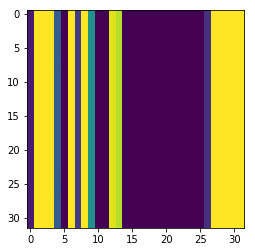

775


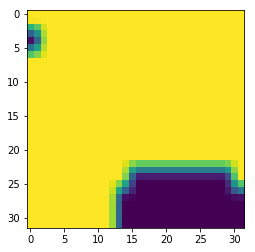

776


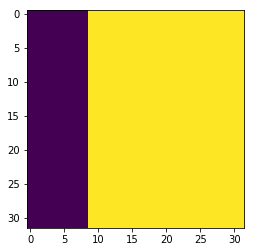

777


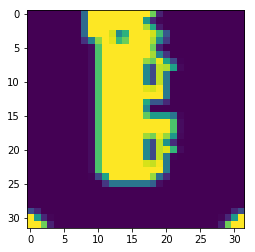

778


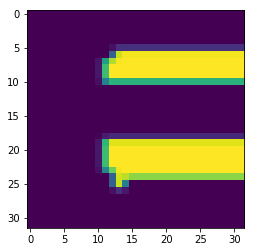

779


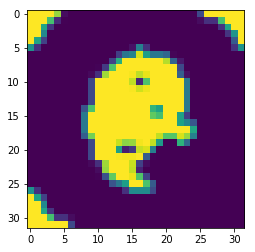

780


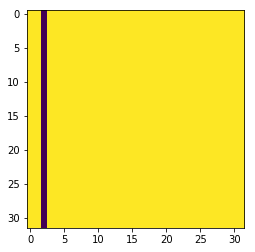

781


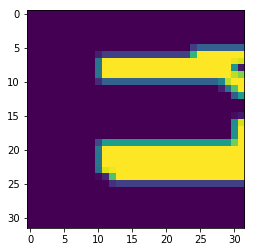

782


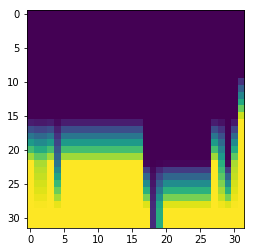

783


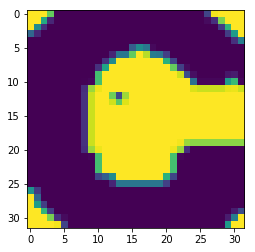

784


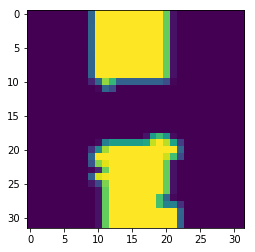

785


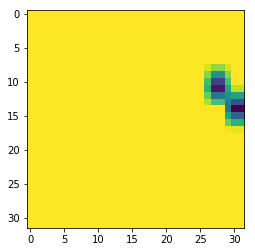

786


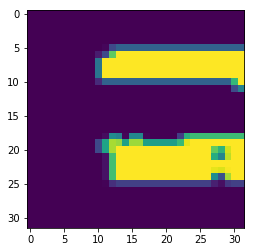

787


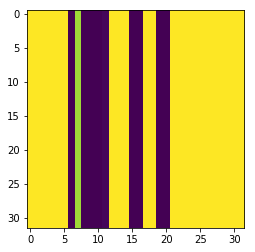

788


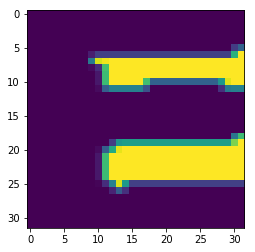

789


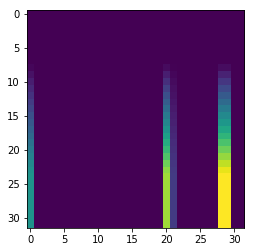

790


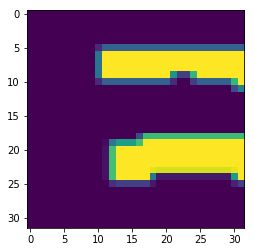

791


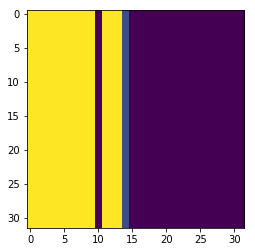

792


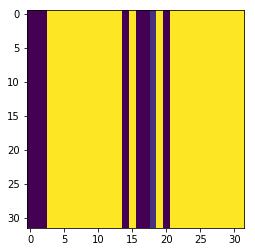

793


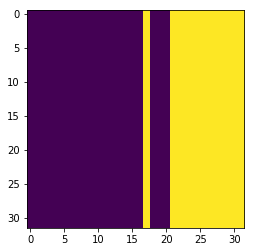

794


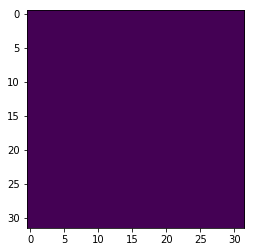

795


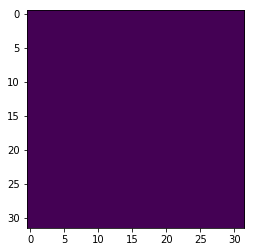

796


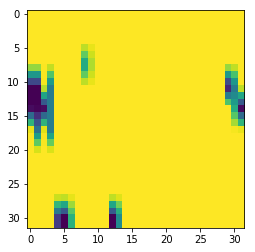

797


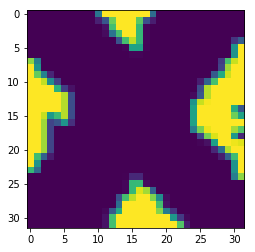

798


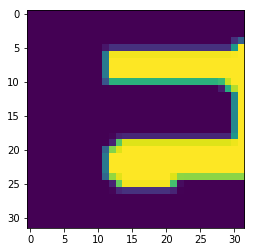

799


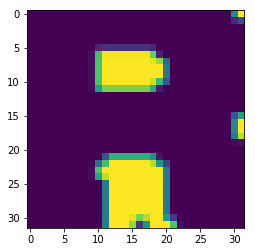

800


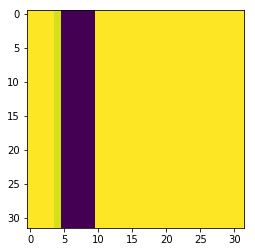

801


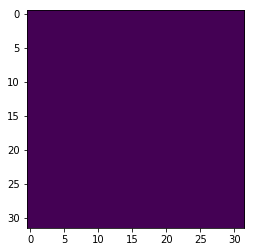

802


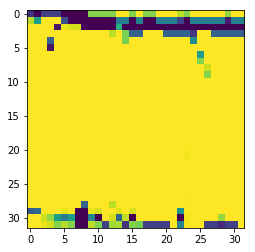

803


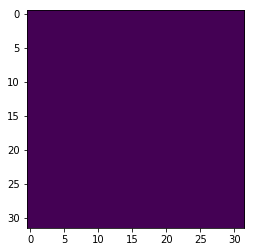

804


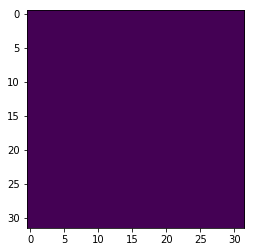

805


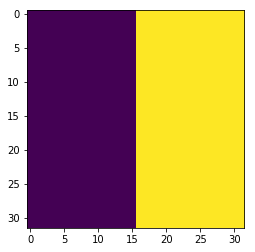

806


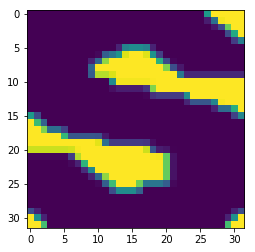

807


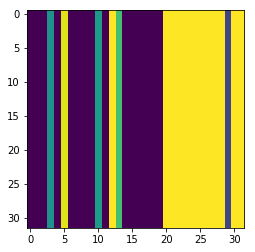

808


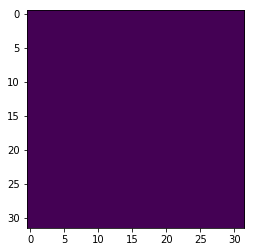

809


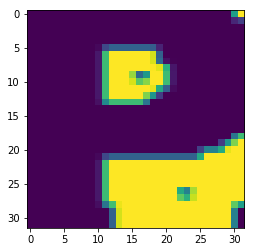

810


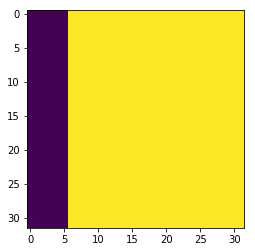

811


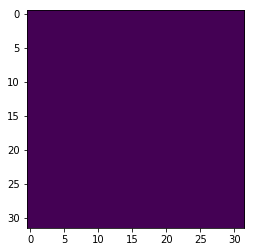

812


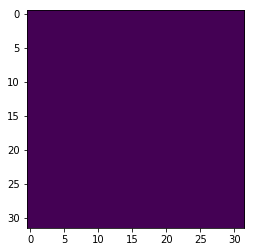

813


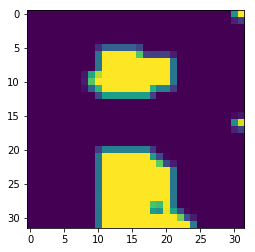

814


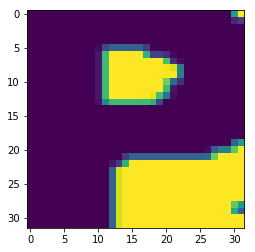

815


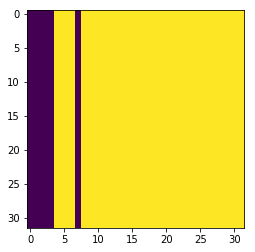

816


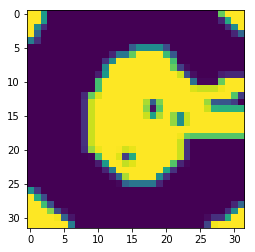

817


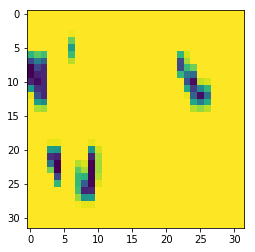

818


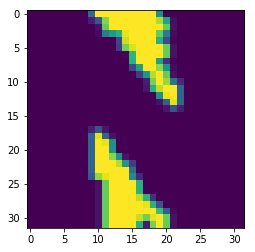

819


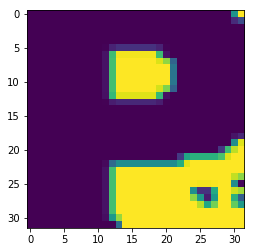

820


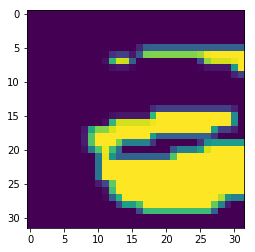

821


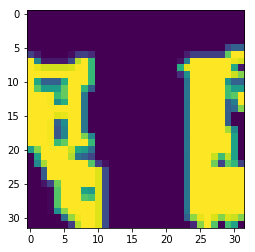

822


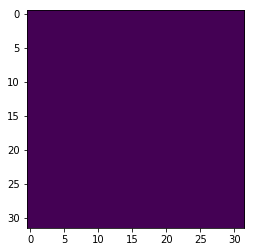

823


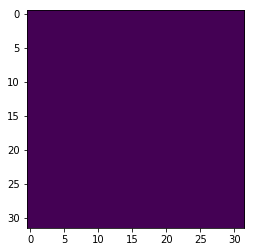

824


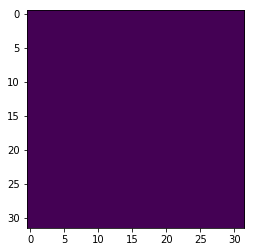

825


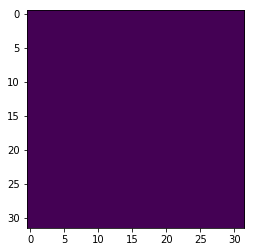

826


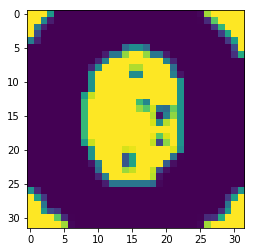

827


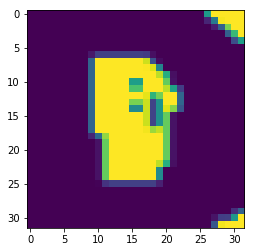

828


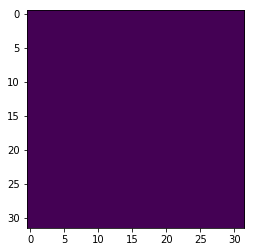

829


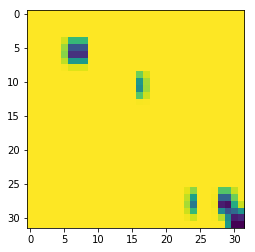

830


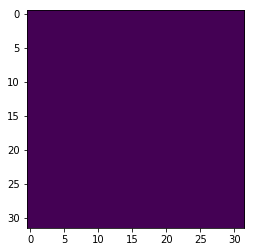

831


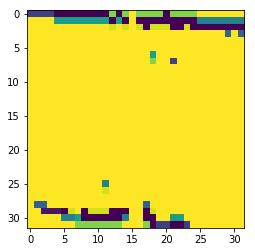

832


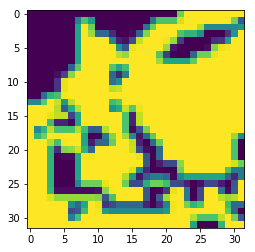

833


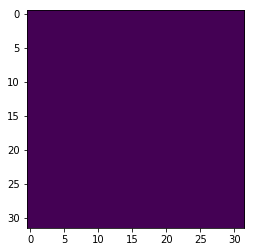

834


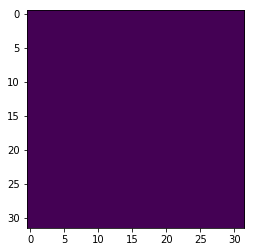

835


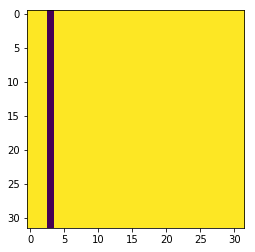

836


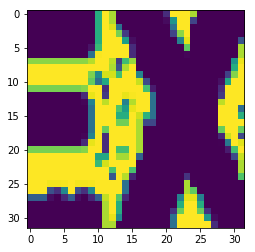

837


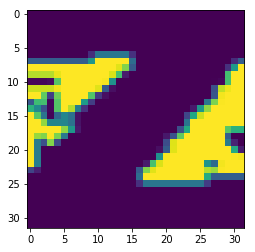

838


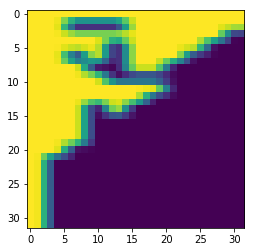

839


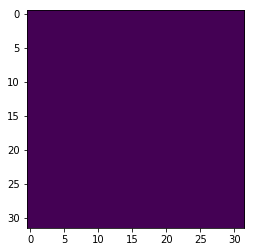

840


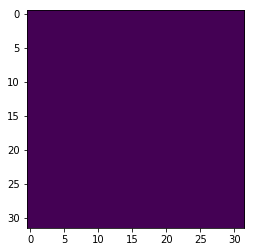

841


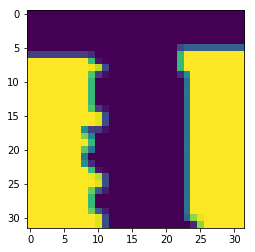

842


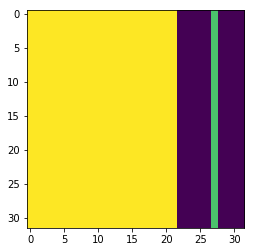

843


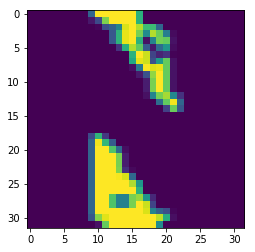

844


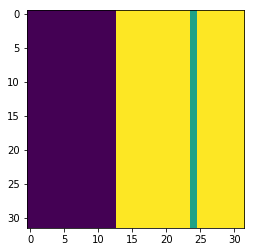

845


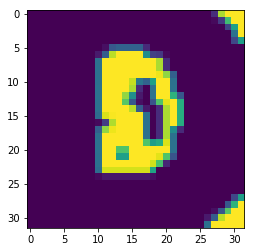

846


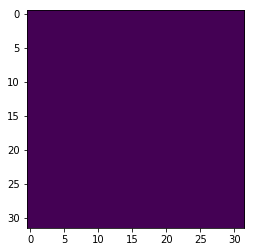

847


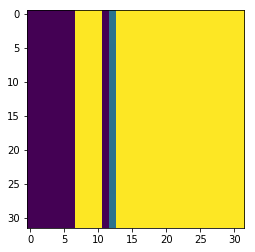

848


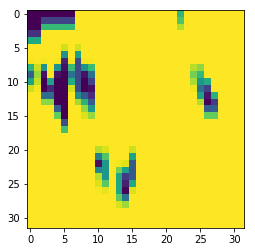

849


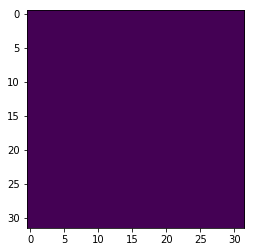

850


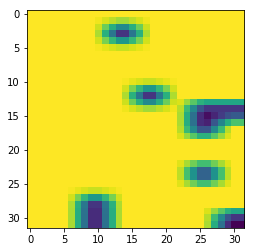

851


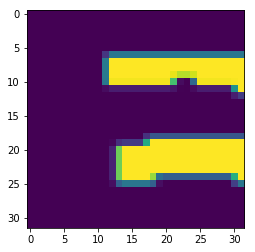

852


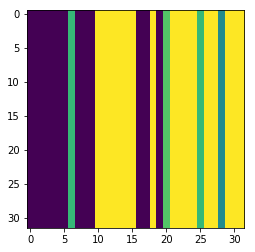

853


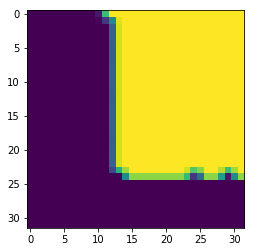

854


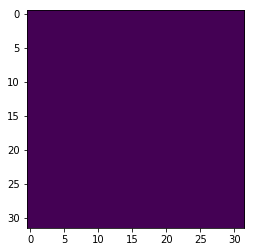

855


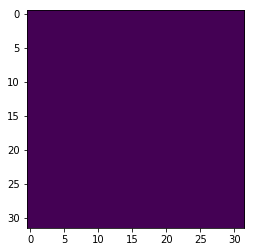

856


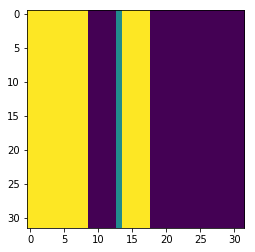

857


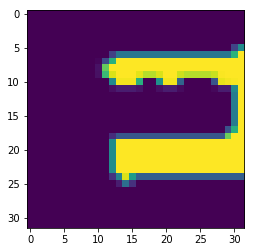

858


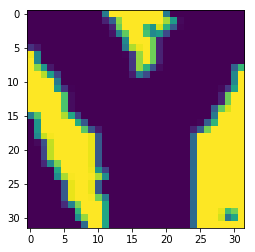

859


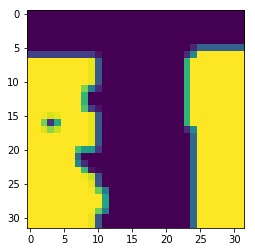

860


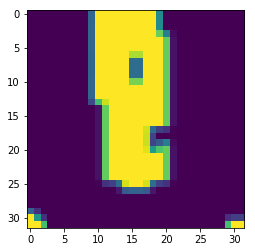

861


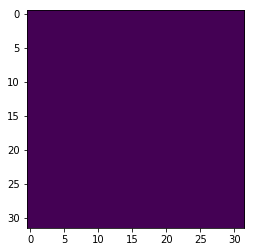

862


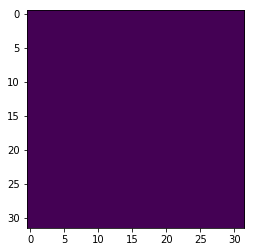

863


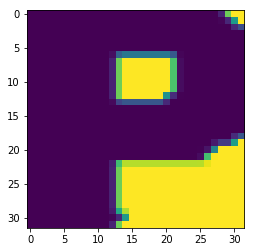

864


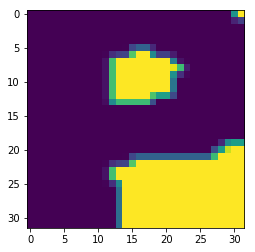

865


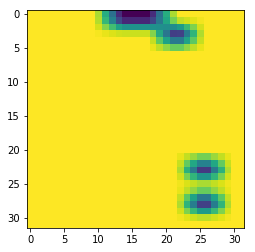

866


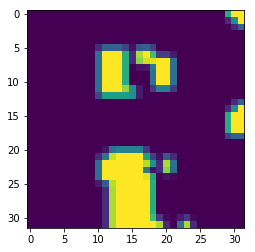

867


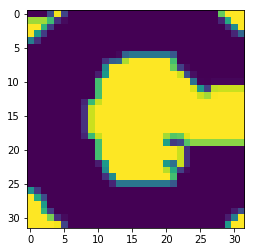

868


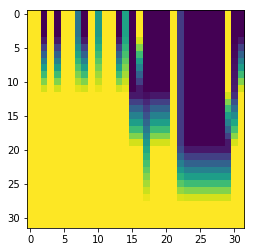

869


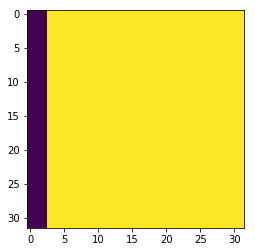

870


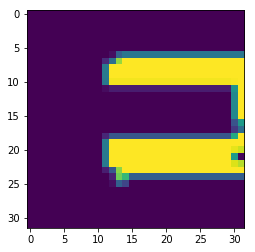

871


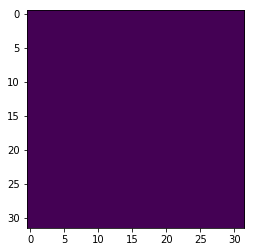

872


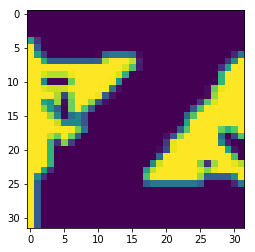

873


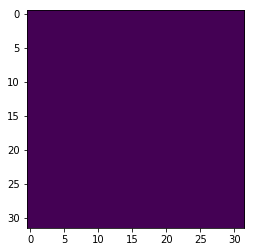

874


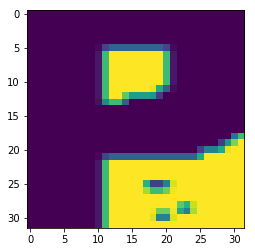

875


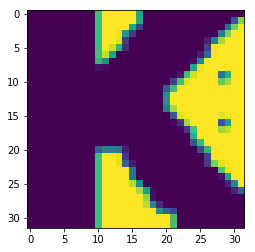

876


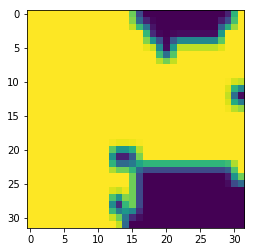

877


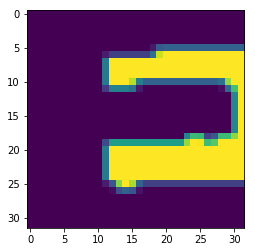

878


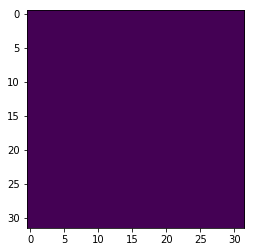

879


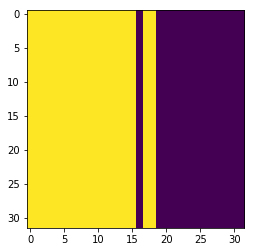

880


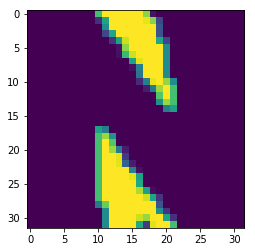

881


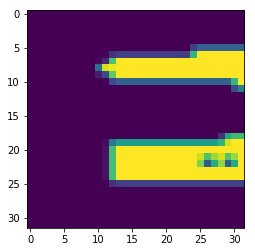

882


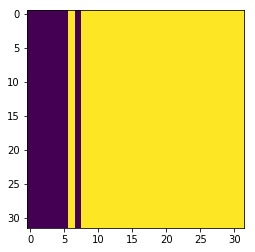

883


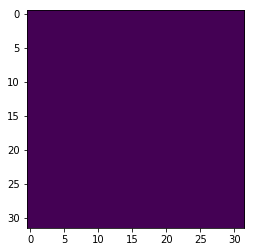

884


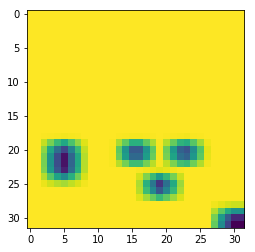

885


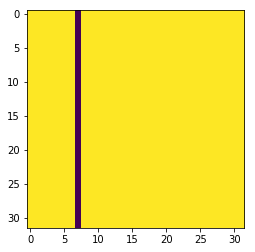

886


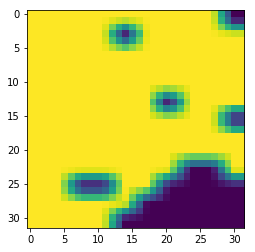

887


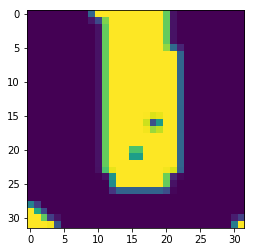

888


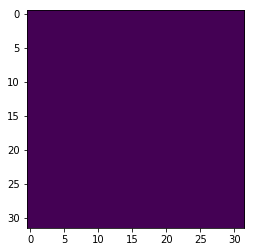

889


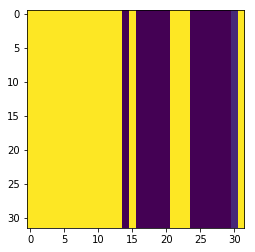

890


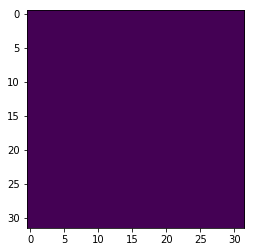

891


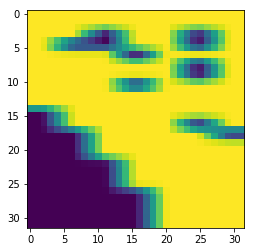

892


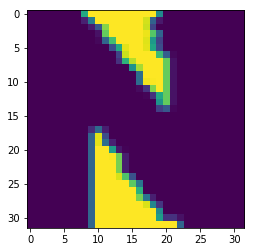

893


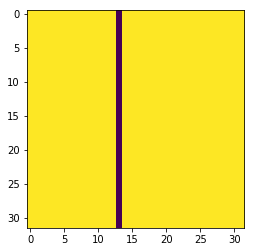

894


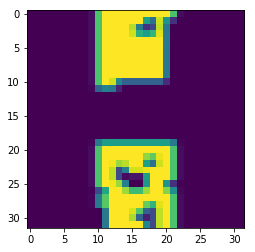

895


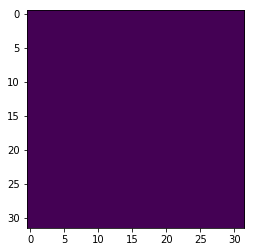

896


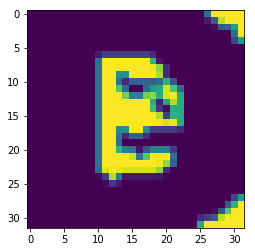

897


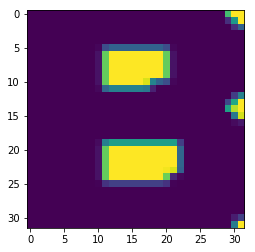

898


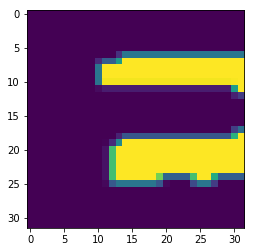

899


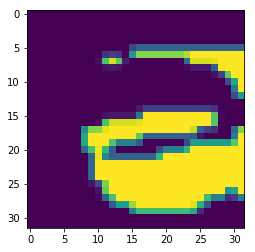

900


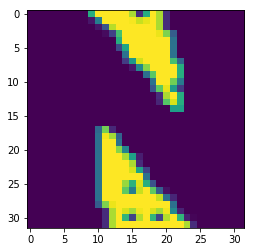

901


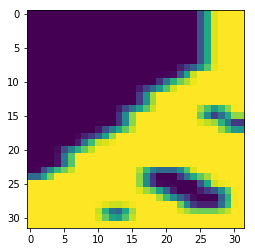

902


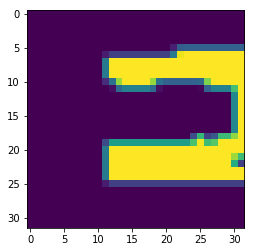

903


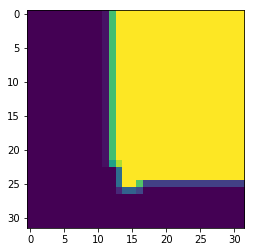

904


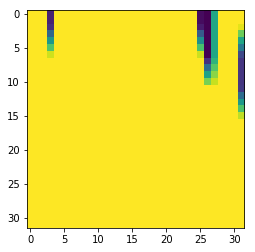

905


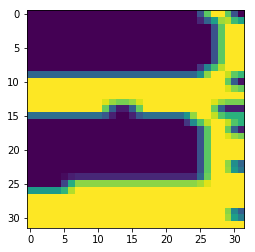

906


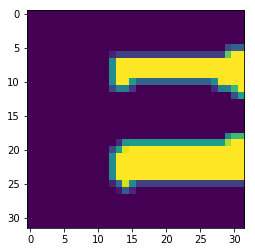

907


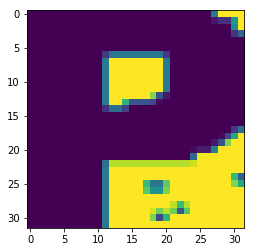

908


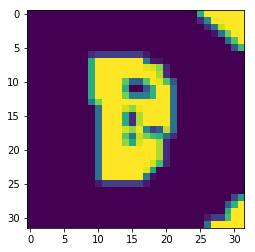

909


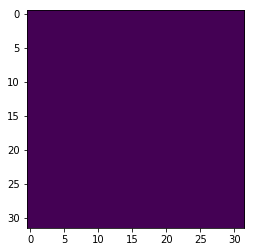

910


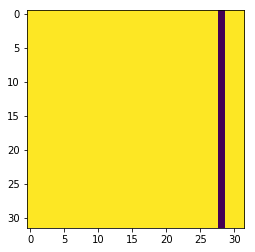

911


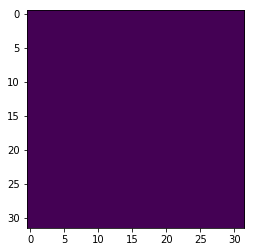

912


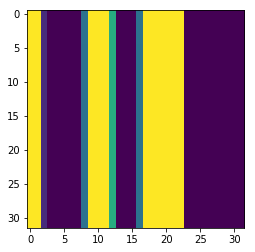

913


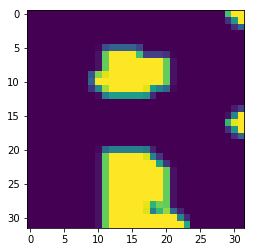

914


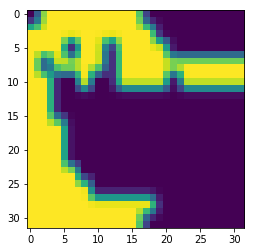

915


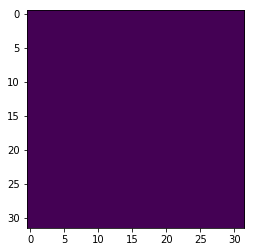

916


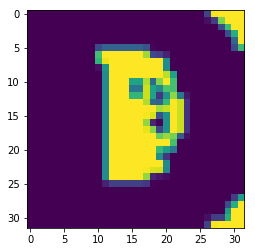

917


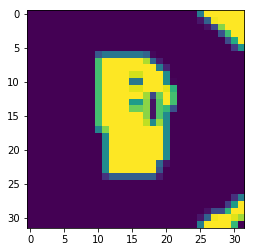

918


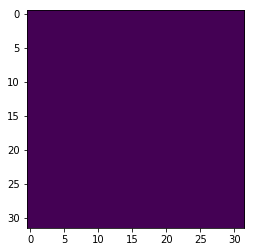

919


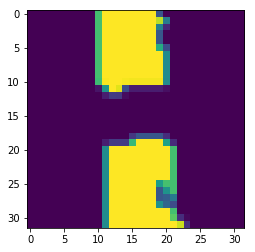

920


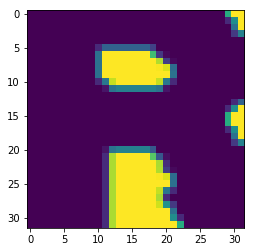

921


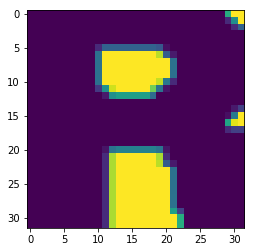

922


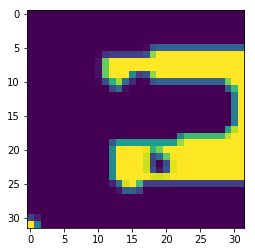

923


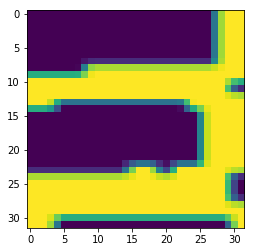

924


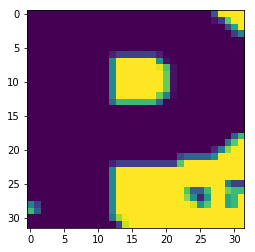

925


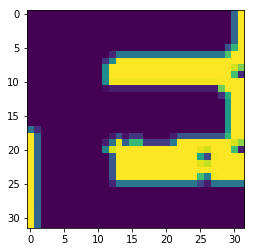

926


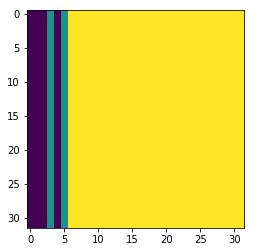

927


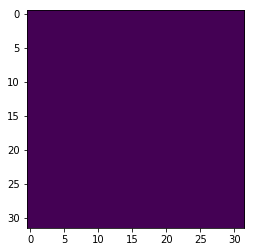

928


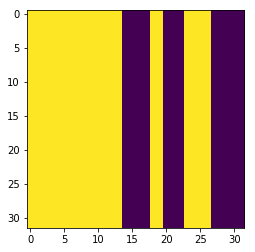

929


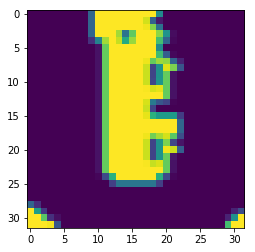

930


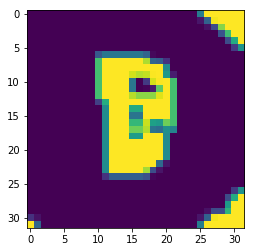

In [45]:
for i,candidate in enumerate(candidates):
    print i
    plt.figure()
    plt.imshow(candidate)
    plt.show()

In [33]:
#1-4
for i in range(1,5):
    j = Image.fromarray(candidates[i])
    ime = i
    j.save("./"+str(ime)+".PNG")

In [40]:
#1-4
for i,candidate in enumerate(candidates):
    if(sum(sum(candidate)))<0.05*1024*255 or (sum(sum(candidate)))>0.95*1024*255:
        j = Image.fromarray(candidate)
        ime = i
        j.save("./NoTextAdd/"+str(ime)+".PNG")

In [39]:
sum(sum(candidates[1]))

261120